In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
buydata = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/purchase6.csv')
buydata_df = buydata.iloc[:, 1:]

In [ ]:
buydata_df['구매일자_년도'] = buydata_df['구매일자'].astype('string').str[:4]

buydata_df['분기'] = np.where(buydata_df['구매일자'] < 20140401, '2014_1분기',
                                  np.where(buydata_df['구매일자'] < 20140701, '2014_2분기',
                                           np.where(buydata_df['구매일자'] < 20141001, '2014_3분기',
                                                    np.where(buydata_df['구매일자'] < 20150101, '2014_4분기',
                                                             np.where(buydata_df['구매일자'] < 20150401, '2015_1분기',
                                                                      np.where(buydata_df['구매일자'] < 20150701, '2015_2분기',
                                                                               np.where(buydata_df['구매일자'] < 20151001, '2015_3분기','2015_4분기')))))))

buydata_df[:3]

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자_년도,분기
0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014,2014_1분기
1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014,2014_3분기
2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014,2014_1분기


# 주제 선정에 근거가 될 만한 데이터

In [ ]:
buy_14 = buydata_df[buydata_df['구매일자_년도'] == '2014'].groupby(['고객번호', '제휴사'])[['구매금액']].sum()
buy_15 = buydata_df[buydata_df['구매일자_년도'] == '2015'].groupby(['고객번호', '제휴사'])[['구매금액']].sum()
buy_year = pd.merge(buy_14, buy_15, on=['고객번호', '제휴사'], how='outer')
buy_year[:3]

구매금액_x      구매금액_y
고객번호 제휴사                        
1    A    53043510.0  30183640.0
     B      397940.0    393036.0
     C      600217.0    424207.0

In [ ]:
buy_year.rename(columns={'구매금액_x' : '구매_2014', '구매금액_y' : '구매_2015'}, inplace=True)

## 제휴사별 년도별 구매금액 증감

In [ ]:
df = buy_year.reset_index()

# 제휴사별 년도별 구매금액 증감
a = df.groupby('제휴사')[['구매_2014']].sum()
b = df.groupby('제휴사')[['구매_2015']].sum()

c = pd.merge(a,b, on = '제휴사')
c['증감'] = c['구매_2015'] - c['구매_2014']
c['%'] = round((((c['구매_2015'] / c['구매_2014']) - 1) * 100),2)
c['구매_2014'] = c['구매_2014'].apply(lambda x : '{:,.0f}'.format(x))
c['구매_2015'] = c['구매_2015'].apply(lambda x : '{:,.0f}'.format(x))
c['증감'] = c['증감'].apply(lambda x : '{:,.0f}'.format(x))
c

,구매_2014,구매_2015,증감,%
제휴사,,,,
A,"249,107,710,200","265,733,433,830","16,625,723,630",6.67
B,"56,370,935,091","54,850,751,387","-1,520,183,704",-2.70
C,"23,810,993,186","26,249,977,703","2,438,984,517",10.24
D,"312,202,104","583,153,440","270,951,336",86.79


제휴사 A : 롯데백화점\
제휴사 B : 롯데마트\
제휴사 C : 롯데슈퍼\
제휴사 D : 롭스

## 고객별 년도별 구매금액 증감

In [ ]:
# 고객별 년도별 구매금액 증감
a = df.groupby('고객번호')[['구매_2014']].sum()
b = df.groupby('고객번호')[['구매_2015']].sum()

c = pd.merge(a,b, on = '고객번호')
c['증감'] = c['구매_2015'] - c['구매_2014']
c['%'] = round((((c['구매_2015'] / c['구매_2014']) - 1) * 100),2)
c['구매_2014'] = c['구매_2014'].apply(lambda x : '{:,.0f}'.format(x))
c['구매_2015'] = c['구매_2015'].apply(lambda x : '{:,.0f}'.format(x))
c['증감'] = c['증감'].apply(lambda x : '{:,.0f}'.format(x))
c

,구매_2014,구매_2015,증감,%
고객번호,,,,
1,"54,041,667","31,000,883","-23,040,784",-42.64
2,"46,245,330","53,635,430","7,390,100",15.98
3,"1,893,769","1,271,398","-622,371",-32.86
4,"9,299,616","7,394,194","-1,905,422",-20.49
5,"7,685,880","5,551,190","-2,134,690",-27.77
...,...,...,...,...
19379,"1,190,620","4,588,660","3,398,040",285.40
19380,"522,700","3,390,277","2,867,577",548.61
19381,0,"6,040,669","6,040,669",inf


## 고객별, 제휴사별, 년도별 구매금액 증감

In [ ]:
## 고객 1명당 년도별 구매금액 증감
buy_year = buy_year.rename(columns = {'구매금액_x' : '구매_2014',	'구매금액_y' : '구매_2015'})
buy_year['구매_2014'] = buy_year['구매_2014'].fillna(0)
buy_year['구매_2015'] = buy_year['구매_2015'].fillna(0)
buy_year['증감'] = buy_year['구매_2015'] - buy_year['구매_2014']
buy_year['증감 %'] = ((buy_year['구매_2015'] / buy_year['구매_2014']) - 1).round(2)
buy_year

구매_2014     구매_2015          증감  증감 %
고객번호  제휴사                                          
1     A    53043510.0  30183640.0 -22859870.0 -0.43
      B      397940.0    393036.0     -4904.0 -0.01
      C      600217.0    424207.0   -176010.0 -0.29
2     A    46168380.0  53286470.0   7118090.0  0.15
      B       76950.0    132500.0     55550.0  0.72
...               ...         ...         ...   ...
19382 C           0.0      7990.0      7990.0   inf
19383 A           0.0   1104800.0   1104800.0   inf
      B           0.0     48600.0     48600.0   inf
      C           0.0      8590.0      8590.0   inf
      D           0.0   1222410.0   1222410.0   inf

[58631 rows x 4 columns]

## 각 제휴사의 점포수 변화

In [ ]:
buydata_df[:3]

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자_년도,분기
0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014,2014_1분기
1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014,2014_3분기
2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014,2014_1분기


In [ ]:
print('A 제휴사의 년도별 점포 개수')
print('2014:', len(buydata_df.query("제휴사 == 'A' & 구매일자_년도 == '2014'")['점포코드'].unique()))
print('2015:', len(buydata_df.query("제휴사 == 'A' & 구매일자_년도 == '2015'")['점포코드'].unique()), '\n')
print('B 제휴사의 년도별 점포 개수')
print('2014:', len(buydata_df.query("제휴사 == 'B' & 구매일자_년도 == '2014'")['점포코드'].unique()))
print('2015:', len(buydata_df.query("제휴사 == 'B' & 구매일자_년도 == '2015'")['점포코드'].unique()), '\n')
print('C 제휴사의 년도별 점포 개수')
print('2014:', len(buydata_df.query("제휴사 == 'C' & 구매일자_년도 == '2014'")['점포코드'].unique()))
print('2015:', len(buydata_df.query("제휴사 == 'C' & 구매일자_년도 == '2015'")['점포코드'].unique()), '\n')
print('D 제휴사의 년도별 점포 개수')
print('2014:', len(buydata_df.query("제휴사 == 'D' & 구매일자_년도 == '2014'")['점포코드'].unique()))
print('2015:', len(buydata_df.query("제휴사 == 'D' & 구매일자_년도 == '2015'")['점포코드'].unique()))

A 제휴사의 년도별 점포 개수
2014: 47
2015: 51 

B 제휴사의 년도별 점포 개수
2014: 130
2015: 134 

C 제휴사의 년도별 점포 개수
2014: 546
2015: 575 

D 제휴사의 년도별 점포 개수
2014: 30
2015: 53


In [ ]:
pd.pivot_table(data=buydata_df, values='점포코드', index='제휴사', columns='구매일자_년도', aggfunc='count')

구매일자_년도,2014,2015
제휴사,,
A,2863856,2906462
B,6359426,6978648
C,4612951,4766285
D,35281,70121


## B 제휴사 이용고객

In [ ]:
B_data = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/B제휴사이용고객의기본정보&분기별구매금액&대분류명구매금액0109.csv').iloc[:, 1:]
B_data[:3]

,고객번호,성별,연령대,거주지역,1분기 구매금액,2분기 구매금액,3분기 구매금액,4분기 구매금액,5분기 구매금액,6분기 구매금액,...,7분기 전문스포츠/레저 구매,8분기 전문스포츠/레저 구매,1분기 패션잡화 구매,2분기 패션잡화 구매,3분기 패션잡화 구매,4분기 패션잡화 구매,5분기 패션잡화 구매,6분기 패션잡화 구매,7분기 패션잡화 구매,8분기 패션잡화 구매
0,1,M,60세이상,서울특별시 강남구,21800,0,4700,371440,189636,18500,...,0,0,0,0,0,0,0,0,0,0
1,2,M,60세이상,경기도 김포시,30500,0,0,46450,94800,37700,...,0,0,0,0,0,0,8800,0,0,0
2,3,M,60세이상,서울특별시 은평구,0,0,6960,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.DataFrame(B_data['고객번호'])

,고객번호
0,1
1,2
2,3
3,4
4,5
...,...
18570,19379
18571,19380
18572,19381
18573,19382


In [ ]:
# B 제휴사 이용고객의 고객번호 리스트
b_cust_lst = B_data['고객번호'].unique().tolist()

# B 제휴사 이용고객의 전체구매정보
buydata_bb = buydata_df[buydata_df['고객번호'].isin(b_cust_lst)]
buydata_bb[:3]

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자_년도,분기
0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014,2014_1분기
1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014,2014_3분기
2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014,2014_1분기


### B 제휴사 이용고객의 각 제휴사별 구매행동분석

In [ ]:
pd.pivot_table(data=buydata_bb, values='구매금액', index='고객번호', columns=['구매일자_년도', '제휴사'], aggfunc='sum')

구매일자_년도        2014                                       2015             \
제휴사               A         B          C         D           A          B   
고객번호                                                                        
1        53043510.0  397940.0   600217.0       NaN  30183640.0   393036.0   
2        46168380.0   76950.0        NaN       NaN  53286470.0   132500.0   
3           80000.0    6960.0  1806809.0       NaN         NaN        NaN   
4         8339780.0  500800.0   459036.0       NaN   5934830.0  1093266.0   
5         7669880.0   16000.0        NaN       NaN   5504340.0        NaN   
...             ...       ...        ...       ...         ...        ...   
19379      469900.0       NaN        NaN  720720.0   1540120.0   300980.0   
19380           NaN       NaN        NaN  522700.0     52300.0    60280.0   
19381           NaN       NaN        NaN       NaN    402600.0  5614579.0   
19382           NaN       NaN        NaN       NaN    175100.0  4218683.0   
19383           NaN       NaN        NaN       NaN   1104800.0    48600.0   

구매일자_년도                        
제휴사              C          D  
고객번호                           
1         424207.0        NaN  
2              NaN   216460.0  
3        1271398.0        NaN  
4         366098.0        NaN  
5              NaN    46850.0  
...            ...        ...  
19379      54570.0  2692990.0  
19380     146837.0  3130860.0  
19381      23490.0        NaN  
19382       7990.0        NaN  
19383       8590.0  1222410.0  

[18575 rows x 8 columns]

In [ ]:
aa = pd.pivot_table(data=buydata_bb[buydata_bb['제휴사'] == 'A'], values='구매금액', index='고객번호', columns='구매일자_년도', aggfunc='sum').rename(columns={'2014' : 'A_2014', '2015' : 'A_2015'})
bb = pd.pivot_table(data=buydata_bb[buydata_bb['제휴사'] == 'B'], values='구매금액', index='고객번호', columns='구매일자_년도', aggfunc='sum').rename(columns={'2014' : 'B_2014', '2015' : 'B_2015'})
cc = pd.pivot_table(data=buydata_bb[buydata_bb['제휴사'] == 'C'], values='구매금액', index='고객번호', columns='구매일자_년도', aggfunc='sum').rename(columns={'2014' : 'C_2014', '2015' : 'C_2015'})
dd = pd.pivot_table(data=buydata_bb[buydata_bb['제휴사'] == 'D'], values='구매금액', index='고객번호', columns='구매일자_년도', aggfunc='sum').rename(columns={'2014' : 'D_2014', '2015' : 'D_2015'})

In [ ]:
df = pd.merge(pd.DataFrame(B_data['고객번호']), aa, on='고객번호', how='left')
df = pd.merge(df, bb, on='고객번호', how='outer')
df = pd.merge(df, cc, on='고객번호', how='outer')
df = pd.merge(df, dd, on='고객번호', how='outer')

print(df.shape)
df[:3]

(18575, 9)


,고객번호,A_2014,A_2015,B_2014,B_2015,C_2014,C_2015,D_2014,D_2015
0,1,53043510.0,30183640.0,397940.0,393036.0,600217.0,424207.0,NaN,NaN
1,2,46168380.0,53286470.0,76950.0,132500.0,NaN,NaN,NaN,216460.0
2,3,80000.0,NaN,6960.0,NaN,1806809.0,1271398.0,NaN,NaN


### 연령대별 분기별 구매금액

In [ ]:
print(buydata_bb.shape)
buydata_bb[:3]

(27827447, 14)


,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자_년도,분기
0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014,2014_1분기
1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014,2014_3분기
2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014,2014_1분기


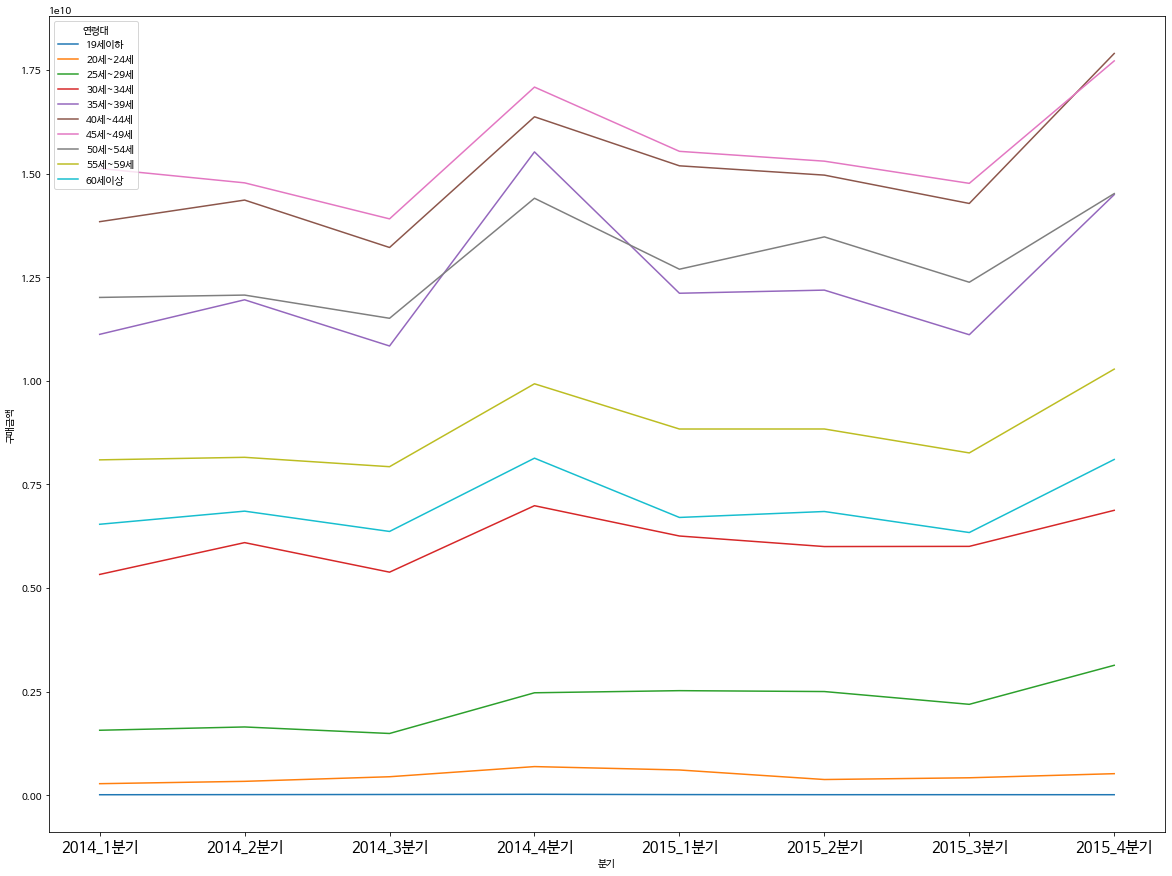

In [ ]:
a = buydata_bb.groupby(['연령대', '분기'], as_index=False)[['구매금액']].sum()

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,15))
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
sns.lineplot(data=a, x='분기', y='구매금액', hue='연령대')

plt.savefig('연령대별 분기별 구매금액.png')

In [ ]:
B_data[:3]

,고객번호,성별,연령대,거주지역,1분기 구매금액,2분기 구매금액,3분기 구매금액,4분기 구매금액,5분기 구매금액,6분기 구매금액,...,7분기 전문스포츠/레저 구매,8분기 전문스포츠/레저 구매,1분기 패션잡화 구매,2분기 패션잡화 구매,3분기 패션잡화 구매,4분기 패션잡화 구매,5분기 패션잡화 구매,6분기 패션잡화 구매,7분기 패션잡화 구매,8분기 패션잡화 구매
0,1,M,60세이상,서울특별시 강남구,21800,0,4700,371440,189636,18500,...,0,0,0,0,0,0,0,0,0,0
1,2,M,60세이상,경기도 김포시,30500,0,0,46450,94800,37700,...,0,0,0,0,0,0,8800,0,0,0
2,3,M,60세이상,서울특별시 은평구,0,0,6960,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame({'연령대' : ['19세이하', '20세~24세', '25세~29세', '30세~34세', '35세~39세', '40세~44세', '45세~49세', '50세~54세', '55세~59세', '60세이상']})
for i in range(1,9):
  a = B_data.groupby('연령대')[[f'{i}분기 구매금액']].sum()
  df = pd.merge(df, a, on='연령대', how='left')

df

,연령대,1분기 구매금액,2분기 구매금액,3분기 구매금액,4분기 구매금액,5분기 구매금액,6분기 구매금액,7분기 구매금액,8분기 구매금액
0,19세이하,7996441,9117124,8130353,8233020,8100955,6549133,5347646,5582058
1,20세~24세,88349379,78648903,85059303,96617437,99652696,95952800,97618877,84628934
2,25세~29세,367855218,358031434,367291160,400007453,438737539,398853941,437683369,380201628
3,30세~34세,901818717,961199692,1030888623,1092607688,1123912721,1139973104,1119861458,1025140308
4,35세~39세,2475957782,3100685451,2796841629,2362051509,2188773154,2088065514,2276382330,2007896427
5,40세~44세,3116663146,3185378017,3118063899,2750327550,2919282694,2762708355,2904433803,2536817676
6,45세~49세,2933836758,2784696850,3031609388,3076547679,3055483556,2986839693,3223914370,2858111832
7,50세~54세,2145945723,2000188066,2151031328,2178135011,2231669908,2178794152,2411537159,2076249187
8,55세~59세,1035592283,1012270821,1173488470,1148045593,1154482426,1160540451,1261956067,1067915092
9,60세이상,712984027,733835641,729736620,755169905,766708857,734256507,808063083,722071927


In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(20,15))
plt.xticks(fontsize=15)
plt.legend(fontsize=15)
sns.lineplot(data=df, x='분기', y='구매금액', hue='연령대')

plt.savefig('연령대별 분기별 구매금액.png')

### B 제휴사 이용고객의 온라인 이용현황

In [ ]:
m = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조(현우정희현동지현예지)/변수/mobile_4.csv').iloc[:, 1:]
m[:3]

,고객번호,A_MOBILE_APP,B_MOBILE_APP,B_ONLINEMALL,C_MOBILE_APP,C_ONLINEMALL,D_MOBILE_APP,온라인_이용횟수
0,7,4.0,0.0,0.0,0.0,0.0,0.0,4.0
1,14,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,94,0.0,14.0,0.0,0.0,0.0,0.0,14.0


In [ ]:
len(m['고객번호'].unique())

2616

In [ ]:
b_cust_lst = B_data['고객번호'].unique().tolist()
print(len(b_cust_lst))
m[m['고객번호'].isin(b_cust_lst)]

18575


,고객번호,A_MOBILE_APP,B_MOBILE_APP,B_ONLINEMALL,C_MOBILE_APP,C_ONLINEMALL,D_MOBILE_APP,온라인_이용횟수
0,7,4.0,0.0,0.0,0.0,0.0,0.0,4.0
1,14,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,94,0.0,14.0,0.0,0.0,0.0,0.0,14.0
3,205,0.0,4.0,0.0,0.0,0.0,0.0,4.0
4,260,0.0,23.0,0.0,0.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...
2611,19301,0.0,4.0,0.0,0.0,0.0,0.0,4.0
2612,19316,0.0,16.0,0.0,0.0,0.0,0.0,16.0
2613,19333,0.0,0.0,0.0,0.0,0.0,5.0,5.0
2614,19356,0.0,0.0,0.0,0.0,16.0,0.0,16.0


# 모든고객_합본(원본값).csv

## 분기별 A,B,C,D 구매금액비율
- A/(a+b+c+d)

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/features/모든고객_합본(원본값).csv').iloc[:, 1:]

print(df.shape)
df[:1]

(19383, 165)


,고객번호,성별,연령대,고객정보,거주지역,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,2분기_가구/인테리어_금액,3분기_가구/인테리어_금액,4분기_가구/인테리어_금액,5분기_가구/인테리어_금액,6분기_가구/인테리어_금액,7분기_가구/인테리어_금액,8분기_가구/인테리어_금액,1분기_신선식품_금액,2분기_신선식품_금액,3분기_신선식품_금액,4분기_신선식품_금액,5분기_신선식품_금액,6분기_신선식품_금액,7분기_신선식품_금액,8분기_신선식품_금액,1분기_의류_금액,2분기_의류_금액,3분기_의류_금액,4분기_의류_금액,5분기_의류_금액,6분기_의류_금액,7분기_의류_금액,8분기_의류_금액,1분기_일상용품_금액,2분기_일상용품_금액,3분기_일상용품_금액,4분기_일상용품_금액,5분기_일상용품_금액,6분기_일상용품_금액,7분기_일상용품_금액,8분기_일상용품_금액,1분기_전문스포츠/레저_금액,2분기_전문스포츠/레저_금액,3분기_전문스포츠/레저_금액,4분기_전문스포츠/레저_금액,5분기_전문스포츠/레저_금액,6분기_전문스포츠/레저_금액,7분기_전문스포츠/레저_금액,8분기_전문스포츠/레저_금액,1분기_패션잡화_금액,2분기_패션잡화_금액,3분기_패션잡화_금액,4분기_패션잡화_금액,5분기_패션잡화_금액,6분기_패션잡화_금액,7분기_패션잡화_금액,8분기_패션잡화_금액,1분기_디지털/가전_금액,2분기_디지털/가전_금액,3분기_디지털/가전_금액,4분기_디지털/가전_금액,5분기_디지털/가전_금액,6분기_디지털/가전_금액,7분기_디지털/가전_금액,8분기_디지털/가전_금액,1분기_교육/문화용품_금액,2분기_교육/문화용품_금액,3분기_교육/문화용품_금액,4분기_교육/문화용품_금액,5분기_교육/문화용품_금액,6분기_교육/문화용품_금액,7분기_교육/문화용품_금액,8분기_교육/문화용품_금액,1분기_기타상품_금액,2분기_기타상품_금액,3분기_기타상품_금액,4분기_기타상품_금액,5분기_기타상품_금액,6분기_기타상품_금액,7분기_기타상품_금액,8분기_기타상품_금액,1분기_의약품/의료기기_금액,2분기_의약품/의료기기_금액,3분기_의약품/의료기기_금액,4분기_의약품/의료기기_금액,5분기_의약품/의료기기_금액,6분기_의약품/의료기기_금액,7분기_의약품/의료기기_금액,8분기_의약품/의료기기_금액,1분기_전체금액,2분기_전체금액,3분기_전체금액,4분기_전체금액,5분기_전체금액,6분기_전체금액,7분기_전체금액,8분기_전체금액,1분기_A_금액,2분기_A_금액,3분기_A_금액,4분기_A_금액,5분기_A_금액,6분기_A_금액,7분기_A_금액,8분기_A_금액,1분기_B_금액,2분기_B_금액,3분기_B_금액,4분기_B_금액,5분기_B_금액,6분기_B_금액,7분기_B_금액,8분기_B_금액,1분기_C_금액,2분기_C_금액,3분기_C_금액,4분기_C_금액,5분기_C_금액,6분기_C_금액,7분기_C_금액,8분기_C_금액,1분기_D_금액,2분기_D_금액,3분기_D_금액,4분기_D_금액,5분기_D_금액,6분기_D_금액,7분기_D_금액,8분기_D_금액,A1기_visit,A2기_visit,A3기_visit,A4기_visit,A5기_visit,A6기_visit,A7기_visit,A8기_visit,B1기_visit,B2기_visit,B3기_visit,B4기_visit,B5기_visit,B6기_visit,B7기_visit,B8기_visit,C1기_visit,C2기_visit,C3기_visit,C4기_visit,C5기_visit,C6기_visit,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,M,60세이상,60세이상 남성,서울특별시 강남구,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,0.0,63840.0,4706400.0,85500.0,491750.0,0.0,137750.0,422590.0,721735.0,274550.0,1027142.0,671145.0,544710.0,129000.0,237838.0,4464210.0,4445160.0,5754150.0,5051050.0,4541040.0,6353090.0,4256810.0,3493160.0,1644620.0,564650.0,3390310.0,1325290.0,875710.0,248150.0,0.0,782560.0,706800.0,1436400.0,0.0,0.0,509730.0,90250.0,234650.0,150000.0,361490.0,1355370.0,380550.0,1254030.0,1252160.0,258200.0,886050.0,158000.0,0.0,0.0,9900.0,9052200.0,291000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,9119790.0,10583420.0,10722160.0,22618140.0,9007070.0,8375680.0,7692890.0,5108000.0,21800.0,0.0,4700.0,371440.0,189636.0,18500.0,111500.0,73400.0,0.0,200345.0,54690.0,345182.0,106279.0,201200.0,2190.0,114538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,78.0,95.0,111.0,105.0,68.0,61.0,43.0,1.0,0.0,1.0,3.0,3.0,1.0,6.0,4.0,0.0,4.0,4.0,5.0,3.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
a = pd.DataFrame(df['고객번호'])
a

,고객번호
0,1
1,2
2,3
3,4
4,5
...,...
19378,19379
19379,19380
19380,19381
19381,19382


In [ ]:
#a['1분기_A_구매비율'] = 
df.loc[:, '1분기_A_금액'] / df.loc[:, '1분기_전체금액']

0        0.997615
1        0.997840
2        0.000000
3        0.951733
4        0.994913
           ...   
19378         NaN
19379         NaN
19380         NaN
19381         NaN
19382         NaN
Length: 19383, dtype: float64

In [ ]:
for x in ['A', 'B', 'C', 'D']:
  for i in range(1, 9):
    a[f'{x}{i}기_구매비율'] = df.loc[:, f'{i}분기_{x}_금액'] / df.loc[:, f'{i}분기_전체금액']

a[:1]

,고객번호,A1기_구매비율,A2기_구매비율,A3기_구매비율,A4기_구매비율,A5기_구매비율,A6기_구매비율,A7기_구매비율,A8기_구매비율,B1기_구매비율,B2기_구매비율,B3기_구매비율,B4기_구매비율,B5기_구매비율,B6기_구매비율,B7기_구매비율,B8기_구매비율,C1기_구매비율,C2기_구매비율,C3기_구매비율,C4기_구매비율,C5기_구매비율,C6기_구매비율,C7기_구매비율,C8기_구매비율,D1기_구매비율,D2기_구매비율,D3기_구매비율,D4기_구매비율,D5기_구매비율,D6기_구매비율,D7기_구매비율,D8기_구매비율
0,1,0.997615,0.981422,0.994492,0.96929,0.968191,0.97444,0.985437,0.964513,0.002385,0.0,0.000436,0.015918,0.020384,0.002152,0.014283,0.01386,0.0,0.018578,0.005073,0.014793,0.011424,0.023408,0.000281,0.021628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 분기별 각 제휴사 방문횟수비율

In [ ]:
print(df.shape)

(19383, 165)


In [ ]:
df[:1]

,고객번호,성별,연령대,고객정보,거주지역,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,2분기_가구/인테리어_금액,3분기_가구/인테리어_금액,4분기_가구/인테리어_금액,5분기_가구/인테리어_금액,6분기_가구/인테리어_금액,7분기_가구/인테리어_금액,8분기_가구/인테리어_금액,1분기_신선식품_금액,2분기_신선식품_금액,3분기_신선식품_금액,4분기_신선식품_금액,5분기_신선식품_금액,6분기_신선식품_금액,7분기_신선식품_금액,8분기_신선식품_금액,1분기_의류_금액,2분기_의류_금액,3분기_의류_금액,4분기_의류_금액,5분기_의류_금액,6분기_의류_금액,7분기_의류_금액,8분기_의류_금액,1분기_일상용품_금액,2분기_일상용품_금액,3분기_일상용품_금액,4분기_일상용품_금액,5분기_일상용품_금액,6분기_일상용품_금액,7분기_일상용품_금액,8분기_일상용품_금액,1분기_전문스포츠/레저_금액,2분기_전문스포츠/레저_금액,3분기_전문스포츠/레저_금액,4분기_전문스포츠/레저_금액,5분기_전문스포츠/레저_금액,6분기_전문스포츠/레저_금액,7분기_전문스포츠/레저_금액,8분기_전문스포츠/레저_금액,1분기_패션잡화_금액,2분기_패션잡화_금액,3분기_패션잡화_금액,4분기_패션잡화_금액,5분기_패션잡화_금액,6분기_패션잡화_금액,7분기_패션잡화_금액,8분기_패션잡화_금액,1분기_디지털/가전_금액,2분기_디지털/가전_금액,3분기_디지털/가전_금액,4분기_디지털/가전_금액,5분기_디지털/가전_금액,6분기_디지털/가전_금액,7분기_디지털/가전_금액,8분기_디지털/가전_금액,1분기_교육/문화용품_금액,2분기_교육/문화용품_금액,3분기_교육/문화용품_금액,4분기_교육/문화용품_금액,5분기_교육/문화용품_금액,6분기_교육/문화용품_금액,7분기_교육/문화용품_금액,8분기_교육/문화용품_금액,1분기_기타상품_금액,2분기_기타상품_금액,3분기_기타상품_금액,4분기_기타상품_금액,5분기_기타상품_금액,6분기_기타상품_금액,7분기_기타상품_금액,8분기_기타상품_금액,1분기_의약품/의료기기_금액,2분기_의약품/의료기기_금액,3분기_의약품/의료기기_금액,4분기_의약품/의료기기_금액,5분기_의약품/의료기기_금액,6분기_의약품/의료기기_금액,7분기_의약품/의료기기_금액,8분기_의약품/의료기기_금액,1분기_전체금액,2분기_전체금액,3분기_전체금액,4분기_전체금액,5분기_전체금액,6분기_전체금액,7분기_전체금액,8분기_전체금액,1분기_A_금액,2분기_A_금액,3분기_A_금액,4분기_A_금액,5분기_A_금액,6분기_A_금액,7분기_A_금액,8분기_A_금액,1분기_B_금액,2분기_B_금액,3분기_B_금액,4분기_B_금액,5분기_B_금액,6분기_B_금액,7분기_B_금액,8분기_B_금액,1분기_C_금액,2분기_C_금액,3분기_C_금액,4분기_C_금액,5분기_C_금액,6분기_C_금액,7분기_C_금액,8분기_C_금액,1분기_D_금액,2분기_D_금액,3분기_D_금액,4분기_D_금액,5분기_D_금액,6분기_D_금액,7분기_D_금액,8분기_D_금액,A1기_visit,A2기_visit,A3기_visit,A4기_visit,A5기_visit,A6기_visit,A7기_visit,A8기_visit,B1기_visit,B2기_visit,B3기_visit,B4기_visit,B5기_visit,B6기_visit,B7기_visit,B8기_visit,C1기_visit,C2기_visit,C3기_visit,C4기_visit,C5기_visit,C6기_visit,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,M,60세이상,60세이상 남성,서울특별시 강남구,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,0.0,63840.0,4706400.0,85500.0,491750.0,0.0,137750.0,422590.0,721735.0,274550.0,1027142.0,671145.0,544710.0,129000.0,237838.0,4464210.0,4445160.0,5754150.0,5051050.0,4541040.0,6353090.0,4256810.0,3493160.0,1644620.0,564650.0,3390310.0,1325290.0,875710.0,248150.0,0.0,782560.0,706800.0,1436400.0,0.0,0.0,509730.0,90250.0,234650.0,150000.0,361490.0,1355370.0,380550.0,1254030.0,1252160.0,258200.0,886050.0,158000.0,0.0,0.0,9900.0,9052200.0,291000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,9119790.0,10583420.0,10722160.0,22618140.0,9007070.0,8375680.0,7692890.0,5108000.0,21800.0,0.0,4700.0,371440.0,189636.0,18500.0,111500.0,73400.0,0.0,200345.0,54690.0,345182.0,106279.0,201200.0,2190.0,114538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,78.0,95.0,111.0,105.0,68.0,61.0,43.0,1.0,0.0,1.0,3.0,3.0,1.0,6.0,4.0,0.0,4.0,4.0,5.0,3.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.loc[:, 'A1기_visit'] / (df.loc[:, 'A1기_visit'] + df.loc[:, 'B1기_visit'] + df.loc[:, 'C1기_visit'] + df.loc[:, 'D1기_visit'])

0        0.987013
1        0.990291
2        0.000000
3        0.911111
4        0.991228
           ...   
19378         NaN
19379         NaN
19380         NaN
19381         NaN
19382         NaN
Length: 19383, dtype: float64

In [ ]:
for x in ['A', 'B', 'C', 'D']:
  for i in range(1, 9):
    a[f'{x}{i}기_방문비율'] = df.loc[:, f'{x}{i}기_visit'] / (df.loc[:, f'A{i}기_visit'] + df.loc[:, f'B{i}기_visit'] + df.loc[:, f'C{i}기_visit'] + df.loc[:, f'D{i}기_visit'])

a[:1]

,고객번호,A1기_구매비율,A2기_구매비율,A3기_구매비율,A4기_구매비율,A5기_구매비율,A6기_구매비율,A7기_구매비율,A8기_구매비율,B1기_구매비율,B2기_구매비율,B3기_구매비율,B4기_구매비율,B5기_구매비율,B6기_구매비율,B7기_구매비율,B8기_구매비율,C1기_구매비율,C2기_구매비율,C3기_구매비율,C4기_구매비율,C5기_구매비율,C6기_구매비율,C7기_구매비율,C8기_구매비율,D1기_구매비율,D2기_구매비율,D3기_구매비율,D4기_구매비율,D5기_구매비율,D6기_구매비율,D7기_구매비율,D8기_구매비율,A1기_방문비율,A2기_방문비율,A3기_방문비율,A4기_방문비율,A5기_방문비율,A6기_방문비율,A7기_방문비율,A8기_방문비율,B1기_방문비율,B2기_방문비율,B3기_방문비율,B4기_방문비율,B5기_방문비율,B6기_방문비율,B7기_방문비율,B8기_방문비율,C1기_방문비율,C2기_방문비율,C3기_방문비율,C4기_방문비율,C5기_방문비율,C6기_방문비율,C7기_방문비율,C8기_방문비율,D1기_방문비율,D2기_방문비율,D3기_방문비율,D4기_방문비율,D5기_방문비율,D6기_방문비율,D7기_방문비율,D8기_방문비율
0,1,0.997615,0.981422,0.994492,0.96929,0.968191,0.97444,0.985437,0.964513,0.002385,0.0,0.000436,0.015918,0.020384,0.002152,0.014283,0.01386,0.0,0.018578,0.005073,0.014793,0.011424,0.023408,0.000281,0.021628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.987013,0.95122,0.95,0.932773,0.945946,0.918919,0.897059,0.86,0.012987,0.0,0.01,0.02521,0.027027,0.013514,0.088235,0.08,0.0,0.04878,0.04,0.042017,0.027027,0.067568,0.014706,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
a.isna().sum()

고객번호          0
A1기_구매비율    329
A2기_구매비율    244
A3기_구매비율    171
A4기_구매비율    115
           ... 
D4기_방문비율    115
D5기_방문비율     91
D6기_방문비율     77
D7기_방문비율     78
D8기_방문비율     64
Length: 65, dtype: int64

In [ ]:
a.fillna(0, inplace=True)

In [ ]:
a.to_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/features/feature 재생성/모든고객_분기별_구매금액비율+방문횟수비율0111.csv')

# 군집화 결과 시각화
- 5군집_원본값.csv
- 5군집_CAGR값.csv

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None)
a = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/features/feature 재생성/5군집_원본값.csv')
b = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/features/feature 재생성/5군집_CAGR값.csv')

In [ ]:
a

,cluster,성별,연령대,고객정보,거주지역,하루방문단가평균_변동17,하루방문단가평균_평균17,전체금액_변동17,전체금액_평균17,A_금액_변동17,A_금액_평균17,B_금액_변동17,B_금액_평균17,C_금액_변동17,C_금액_평균17,D_금액_변동17,D_금액_평균17,A구매비율_변동17,A구매비율_평균17,B구매비율_변동17,B구매비율_평균17,C구매비율_변동17,C구매비율_평균17,D구매비율_변동17,D구매비율_평균17,가공식품_금액_변동17,가공식품_금액_평균17,가구/인테리어_금액_변동17,가구/인테리어_금액_평균17,신선식품_금액_변동17,신선식품_금액_평균17,의류_금액_변동17,의류_금액_평균17,일상용품_금액_변동17,일상용품_금액_평균17,전문스포츠/레저_금액_변동17,전문스포츠/레저_금액_평균17,패션잡화_금액_변동17,패션잡화_금액_평균17,디지털/가전_금액_변동17,디지털/가전_금액_평균17,교육/문화용품_금액_변동17,교육/문화용품_금액_평균17,기타상품_금액_변동17,기타상품_금액_평균17,의약품/의료기기_금액_변동17,의약품/의료기기_금액_평균17,A방문횟수_변동17,A방문횟수_평균17,B방문횟수_변동17,B방문횟수_평균17,C방문횟수_변동17,C방문횟수_평균17,D방문횟수_변동17,D방문횟수_평균17,A방문비율_변동17,A방문비율_평균17,B방문비율_변동17,B방문비율_평균17,C방문비율_변동17,C방문비율_평균17,D방문비율_변동17,D방문비율_평균17,1~8_label
0,0,0.133745,5.808642,7.185185,10.721193,-122667.115110,238904.728358,-2.630292e+06,6.526394e+06,-2.720371e+06,6.003861e+06,2.288352e+05,1.290229e+05,-1.415199e+05,389436.173280,2763.662551,4074.573780,-0.078101,0.754270,0.088358,0.040424,-0.011135,0.200422,0.000877,0.003856,-3.830665e+03,6.656529e+05,-140219.855967,180300.138154,-62584.163580,470649.212816,-1.243890e+06,2.460758e+06,-2.426543e+05,708629.175926,-53245.802469,581995.562904,-723023.077160,1.129757e+06,-177251.244856,307651.932687,12611.820988,17651.119929,3665.792181,3147.210464,128.909465,202.261905,-4.077160,50.893445,6.267490,3.373163,-1.737654,21.515285,0.129630,0.262199,-0.075645,0.708085,0.088489,0.046403,-0.016065,0.238669,0.003221,0.005813,0.741770
1,1,0.205587,5.482682,6.785475,14.065922,-17020.113073,39794.392553,-8.706254e+05,1.712131e+06,-5.673879e+05,2.932525e+05,-2.216732e+05,9.317408e+05,-8.189103e+04,483125.746688,326.715084,4011.610535,-0.205310,0.107027,0.113271,0.559014,0.085507,0.325152,0.006531,0.008328,-9.806138e+04,5.715024e+05,-29765.083799,19657.392179,-76643.518436,447134.144294,-2.738883e+05,2.319858e+05,-1.003735e+05,224602.127215,-115544.067039,67271.606704,-121229.889385,7.534917e+04,-40551.955307,23262.839585,5070.366480,14857.822666,-20205.083799,36014.382761,567.039106,492.936951,-6.191061,3.677095,-2.899441,34.641181,0.205587,32.856983,0.140782,0.255227,-0.086581,0.051134,0.045520,0.568678,0.034909,0.370519,0.006152,0.009191,0.939665
2,2,0.181818,5.632193,6.969975,12.153461,-109094.048643,213562.217535,-2.609146e+06,5.832180e+06,-2.504609e+06,5.078384e+06,-1.816757e+05,7.135414e+05,7.790367e+04,36822.452758,-764.812344,3431.975456,-0.050240,0.677549,0.016727,0.307177,0.033500,0.012494,0.000013,0.002780,-1.087533e+05,6.370094e+05,-130350.025021,174389.604551,-30875.098415,425665.016323,-1.319876e+06,2.122177e+06,-1.985585e+05,635475.954128,-185829.099249,450520.284046,-414856.547123,1.054224e+06,-226781.192661,292430.592160,10622.078399,24041.455856,-3682.301084,16017.208507,-205.504587,229.262481,-6.552127,46.709043,-2.210175,21.866198,4.291076,2.049565,-0.022519,0.155844,-0.059937,0.633057,-0.008004,0.334827,0.067807,0.028469,0.000135,0.003647,0.748957
3,3,0.178617,5.720607,7.070616,12.698754,-64652.989121,170158.356279,-2.350696e+06,5.119679e+06,-1.958399e+06,4.071993e+06,-2.989566e+05,7.460548e+05,-9.482483e+04,299215.481179,1484.590934,2415.803917,-0.028233,0.546488,0.015862,0.300924,0.011350,0.150026,0.001021,0.002046,-2.056372e+05,7.096086e+05,-55276.286798,142317.639387,-124400.631028,506959.111690,-1.006959e+06,1.692183e+06,-1.836707e+05,579192.682138,-174085.961712,391243.468717,-421827.194148,8.417472e+05,-177386.983023,221341.121675,6659.430558,21044.432932,-8287.841611,13891.460435,175.645656,150.258005,-4.018963,36.655254,-2.116128,21.384736,-1.148817,16.706700,0.080188,0.137903,-0.002822,0.487661,0.000313,0.322044,0.000530,0.186671,0.001979,0.003108,0.789778
4,4,0.288066,5.123457,6.300412,13.432099,-217507.108926,209890.379041,-7.903488e+06,4.800065e+06,-2.946784e+06,2.327408e+06,-3.772203e+06,2.110167e+06,-1.175037e+06,349987.720752,-9464.732510,12502.580835,-0.092057,0.473062,-0.147859,0.285278,0.013306,0.105920,0.024963,0.026393,-3.140203e+06,1.886904e+06,-82714.979424,64345.496767,-8

In [ ]:
b

,cluster,1~8_CAGR(가공식품),1~8_CAGR(신선식품),1~8_CAGR(의류),1~8_CAGR(일상용품),1~8_CAGR(전문스포츠/레저),1~8_CAGR(패션잡화),1~8_CAGR(디지털/가전),1~8_CAGR(전체소비금액),1~8_CAGR(A소비금액),1~8_CAGR(B소비금액),1~8_CAGR(C소비금액),1~8_CAGR(A방문횟수),1~8_CAGR(B방문횟수),1~8_CAGR(C방문횟수),1~8_label,predict_label
0,0,0.343396,0.263447,0.231032,0.169166,0.246707,0.007207,0.160175,0.115861,0.183336,1.927149,-0.255847,0.232703,1.889582,-0.250034,0.741770,1.0
1,1,-0.006790,0.059536,-0.556907,0.002877,-0.303940,-0.314153,-0.061361,0.033582,-2.123132,-0.178441,-0.045107,-2.237717,-0.173271,-0.036811,0.939665,1.0
2,2,0.132456,0.212821,0.068346,0.065809,0.065126,0.035624,-0.032220,0.071540,0.221816,0.060405,1.827332,0.253399,0.061864,1.817342,0.748957,1.0
3,3,0.054268,0.012841,0.074760,0.059894,0.016178,0.067688,0.004289,0.124143,0.286286,-0.282187,-0.331359,0.291231,-0.276777,-0.330875,0.789778,1.0
4,4,-3.238678,-2.615749,-0.913676,-2.376722,-0.557361,-0.589883,-0.353455,-3.768849,-0.531371,-0.919509,-0.276470,-0.575325,-0.918757,-0.292015,0.868313,1.0


In [ ]:
b[b['cluster'] != 4]

,cluster,1~8_CAGR(가공식품),1~8_CAGR(신선식품),1~8_CAGR(의류),1~8_CAGR(일상용품),1~8_CAGR(전문스포츠/레저),1~8_CAGR(패션잡화),1~8_CAGR(디지털/가전),1~8_CAGR(전체소비금액),1~8_CAGR(A소비금액),1~8_CAGR(B소비금액),1~8_CAGR(C소비금액),1~8_CAGR(A방문횟수),1~8_CAGR(B방문횟수),1~8_CAGR(C방문횟수),1~8_label,predict_label
0,0,0.343396,0.263447,0.231032,0.169166,0.246707,0.007207,0.160175,0.115861,0.183336,1.927149,-0.255847,0.232703,1.889582,-0.250034,0.741770,1.0
1,1,-0.006790,0.059536,-0.556907,0.002877,-0.303940,-0.314153,-0.061361,0.033582,-2.123132,-0.178441,-0.045107,-2.237717,-0.173271,-0.036811,0.939665,1.0
2,2,0.132456,0.212821,0.068346,0.065809,0.065126,0.035624,-0.032220,0.071540,0.221816,0.060405,1.827332,0.253399,0.061864,1.817342,0.748957,1.0
3,3,0.054268,0.012841,0.074760,0.059894,0.016178,0.067688,0.004289,0.124143,0.286286,-0.282187,-0.331359,0.291231,-0.276777,-0.330875,0.789778,1.0


In [ ]:
b_col_list = b.columns.tolist()
print(len(b_col_list))
b_col_list

17


['cluster',
 '1~8_CAGR(가공식품)',
 '1~8_CAGR(신선식품)',
 '1~8_CAGR(의류)',
 '1~8_CAGR(일상용품)',
 '1~8_CAGR(전문스포츠/레저)',
 '1~8_CAGR(패션잡화)',
 '1~8_CAGR(디지털/가전)',
 '1~8_CAGR(전체소비금액)',
 '1~8_CAGR(A소비금액)',
 '1~8_CAGR(B소비금액)',
 '1~8_CAGR(C소비금액)',
 '1~8_CAGR(A방문횟수)',
 '1~8_CAGR(B방문횟수)',
 '1~8_CAGR(C방문횟수)',
 '1~8_label',
 'predict_label']

In [ ]:
b_col_list[1:15]

['1~8_CAGR(가공식품)',
 '1~8_CAGR(신선식품)',
 '1~8_CAGR(의류)',
 '1~8_CAGR(일상용품)',
 '1~8_CAGR(전문스포츠/레저)',
 '1~8_CAGR(패션잡화)',
 '1~8_CAGR(디지털/가전)',
 '1~8_CAGR(전체소비금액)',
 '1~8_CAGR(A소비금액)',
 '1~8_CAGR(B소비금액)',
 '1~8_CAGR(C소비금액)',
 '1~8_CAGR(A방문횟수)',
 '1~8_CAGR(B방문횟수)',
 '1~8_CAGR(C방문횟수)']

In [ ]:
b.loc[:, ['cluster', '1~8_CAGR(신선식품)']]

,cluster,1~8_CAGR(신선식품)
0,0,0.263447
1,1,0.059536
2,2,0.212821
3,3,0.012841
4,4,-2.615749


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s

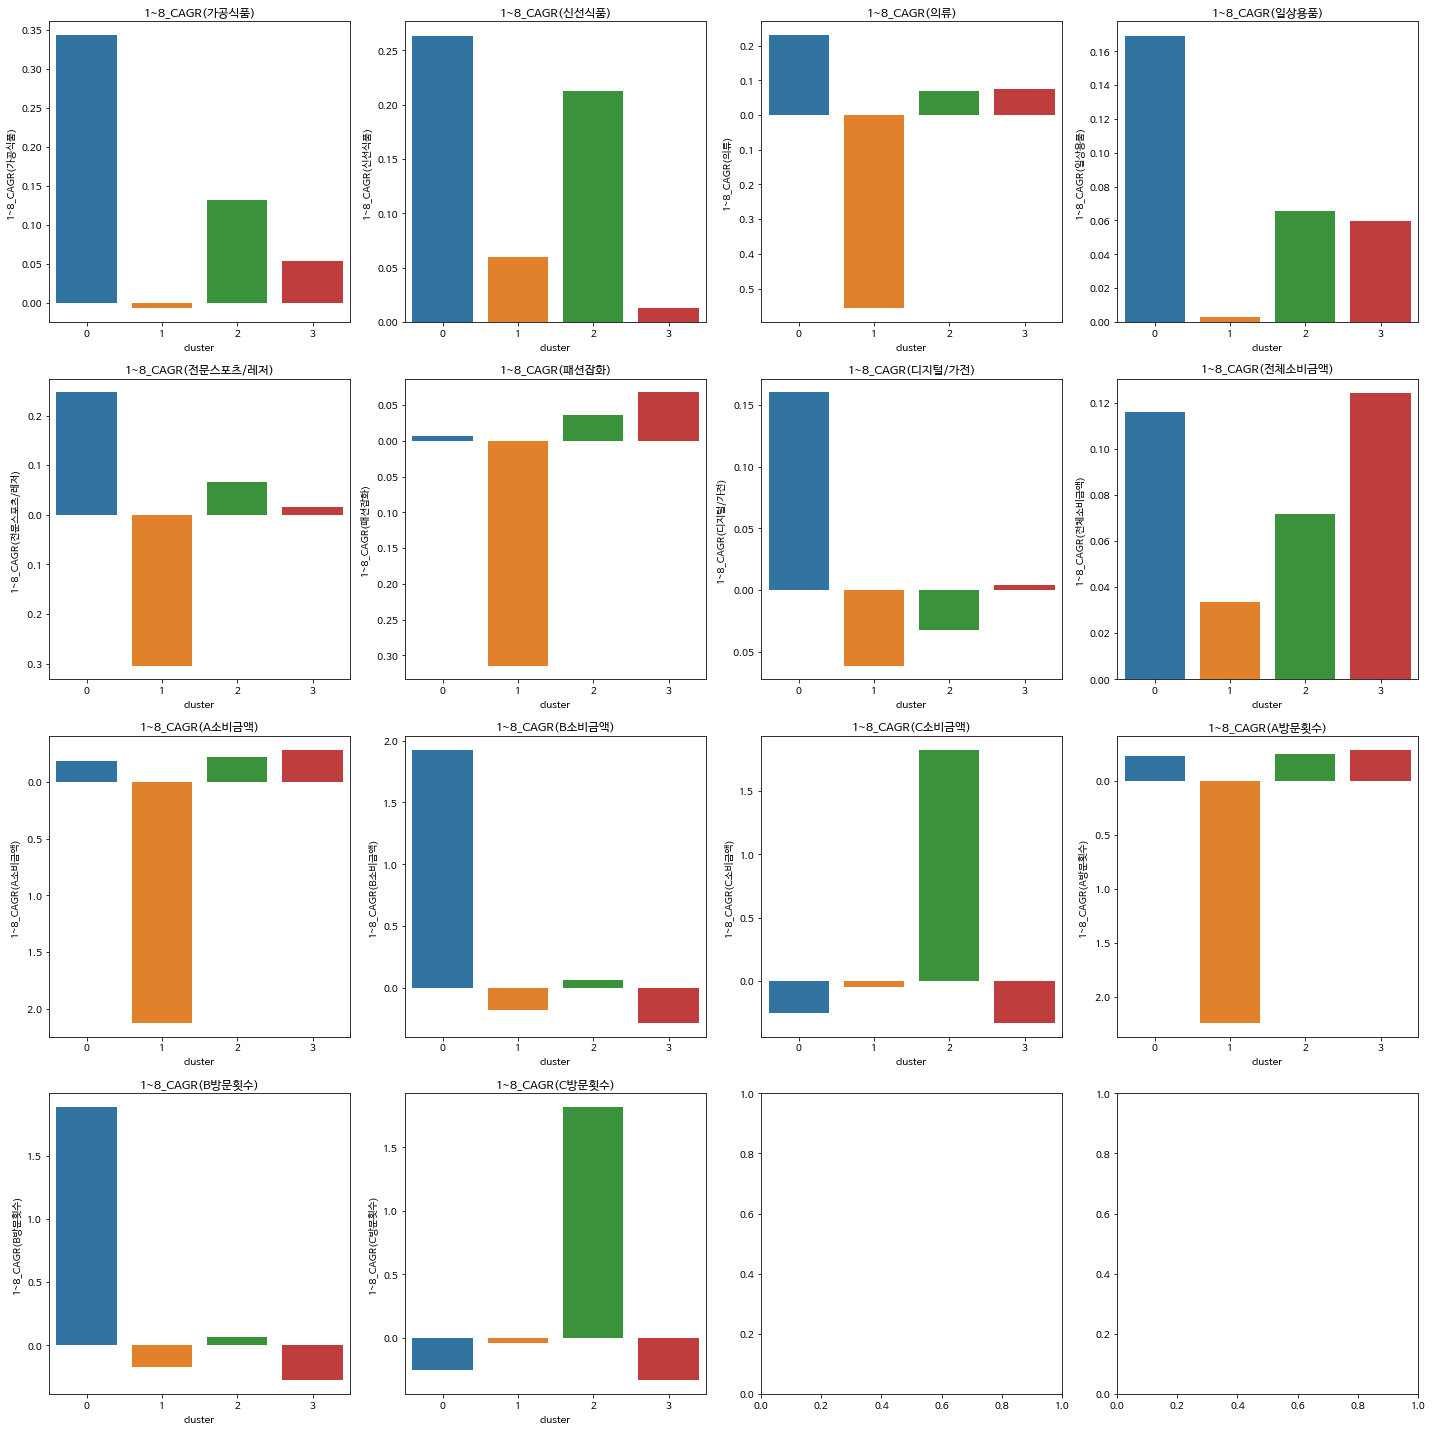

In [ ]:
plt.rc('font', family='NanumBarunGothic')

b_col_list = b.columns.tolist()
fig, axs = plt.subplots(figsize=(20,20), ncols = 4, nrows=4)

for i, feature in enumerate(b_col_list[1:15]):
    row = int(i/4)
    col = i%4
    # ax(축) 자리 지정
    sns.barplot(data = b[b['cluster'] != 4].loc[:, ['cluster', f'{feature}']], x='cluster', y=f'{feature}', ax = axs[row][col]) 
    plt.tight_layout()
    axs[row,col].set_title(f'{feature}')

plt.savefig('5군집_CAGR값_시각화(상품별 subplot).png')

In [ ]:
b[b['cluster'] != 4]

,cluster,1~8_CAGR(가공식품),1~8_CAGR(신선식품),1~8_CAGR(의류),1~8_CAGR(일상용품),1~8_CAGR(전문스포츠/레저),1~8_CAGR(패션잡화),1~8_CAGR(디지털/가전),1~8_CAGR(전체소비금액),1~8_CAGR(A소비금액),1~8_CAGR(B소비금액),1~8_CAGR(C소비금액),1~8_CAGR(A방문횟수),1~8_CAGR(B방문횟수),1~8_CAGR(C방문횟수),1~8_label,predict_label
0,0,0.343396,0.263447,0.231032,0.169166,0.246707,0.007207,0.160175,0.115861,0.183336,1.927149,-0.255847,0.232703,1.889582,-0.250034,0.741770,1.0
1,1,-0.006790,0.059536,-0.556907,0.002877,-0.303940,-0.314153,-0.061361,0.033582,-2.123132,-0.178441,-0.045107,-2.237717,-0.173271,-0.036811,0.939665,1.0
2,2,0.132456,0.212821,0.068346,0.065809,0.065126,0.035624,-0.032220,0.071540,0.221816,0.060405,1.827332,0.253399,0.061864,1.817342,0.748957,1.0
3,3,0.054268,0.012841,0.074760,0.059894,0.016178,0.067688,0.004289,0.124143,0.286286,-0.282187,-0.331359,0.291231,-0.276777,-0.330875,0.789778,1.0


In [ ]:
b[b['cluster'] != 4].iloc[1:2, 1:-2].T.reset_index().rename(columns={'index' : '상품', 0 : 'value'})

,상품,1
0,1~8_CAGR(가공식품),-0.006790
1,1~8_CAGR(신선식품),0.059536
2,1~8_CAGR(의류),-0.556907
3,1~8_CAGR(일상용품),0.002877
4,1~8_CAGR(전문스포츠/레저),-0.303940
5,1~8_CAGR(패션잡화),-0.314153
6,1~8_CAGR(디지털/가전),-0.061361
7,1~8_CAGR(전체소비금액),0.033582
8,1~8_CAGR(A소비금액),-2.123132
9,1~8_CAGR(B소비금액),-0.178441


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


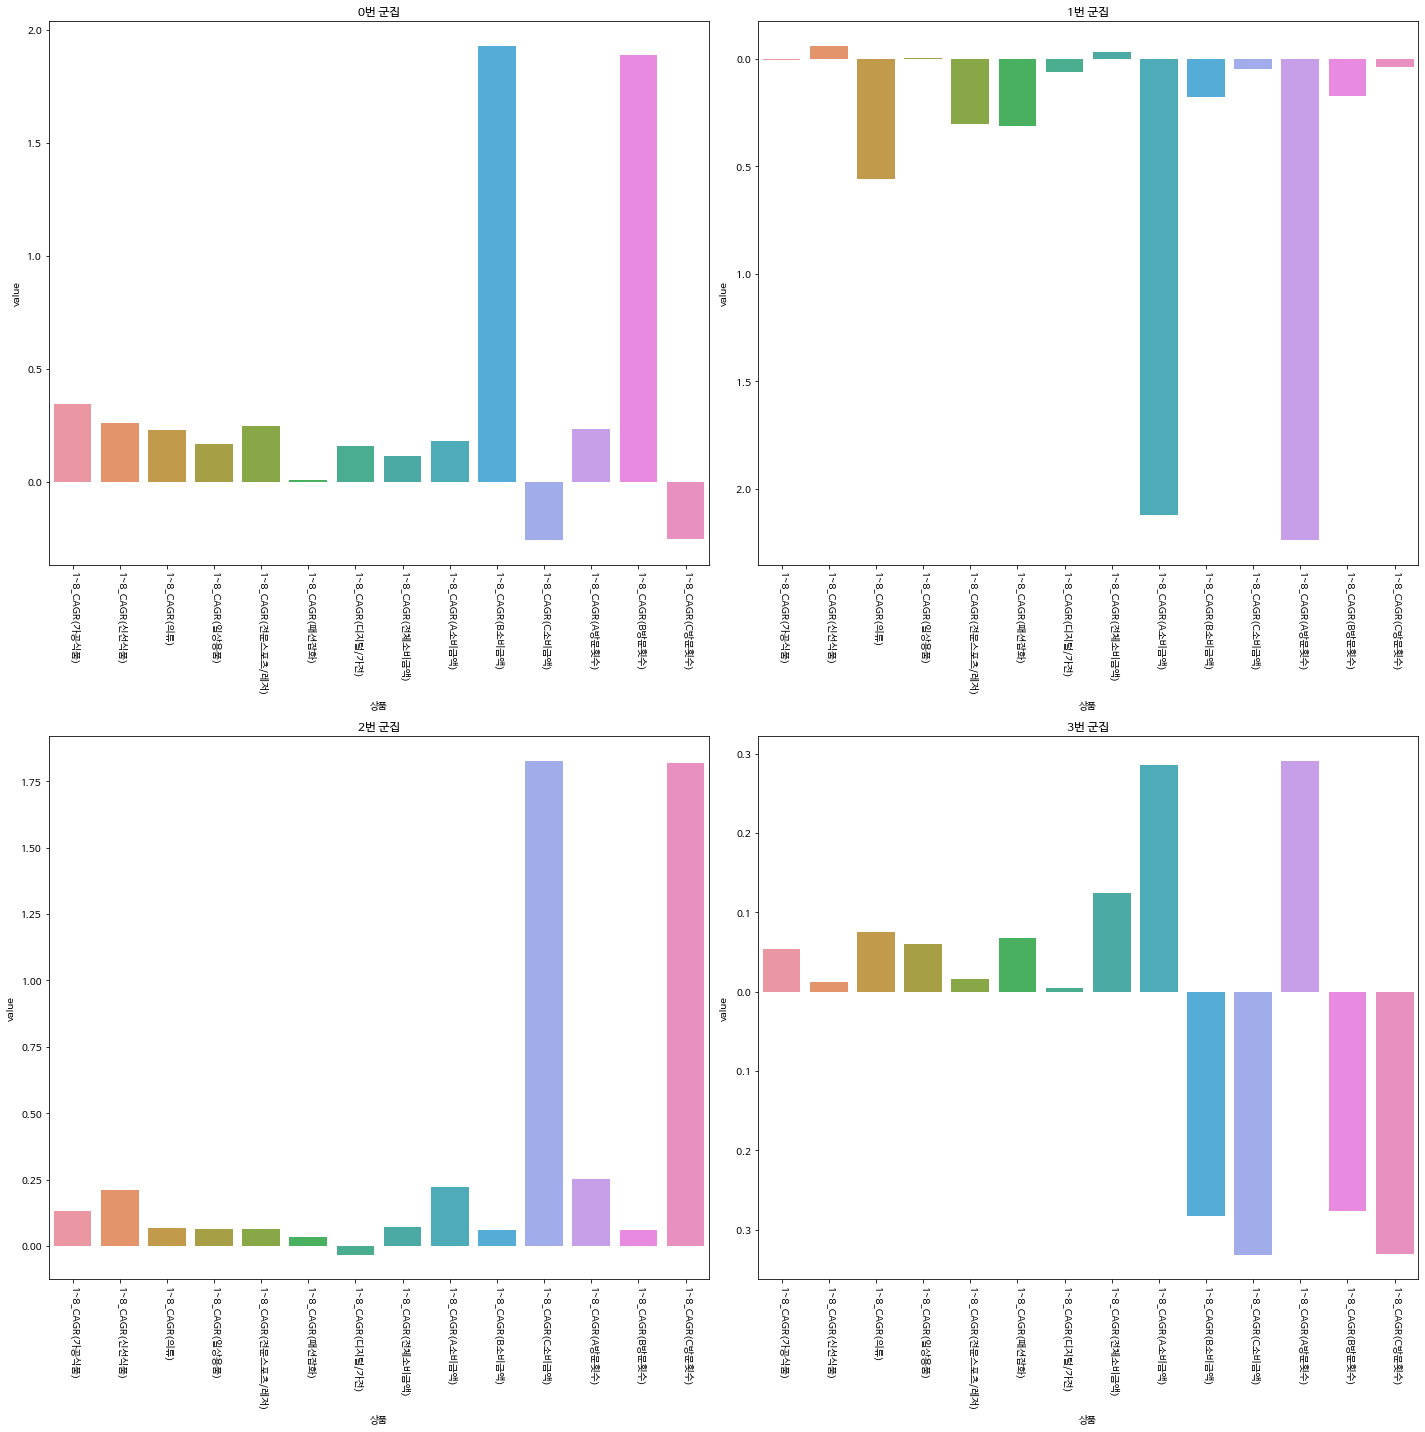

In [ ]:
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20, 20))

for i in range(0, 4):
  plt.subplot(2, 2, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'{i}번 군집')
  
  sns.barplot(data = b[b['cluster'] != 4].iloc[i:i+1, 1:-2].T.reset_index().rename(columns={'index' : '상품', i : 'value'}), x='상품', y='value') 
  #plt.ylabel('count')
  
plt.savefig('5군집_CAGR값_시각화(군집별 subplot).png')

# 예측결과label.csv

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/features/예측결과label.csv').iloc[:, 1:]

print(df.shape)
df[:3]

(18575, 23)


,고객번호,1~8_CAGR(가공식품),1~8_CAGR(가구/인테리어),1~8_CAGR(신선식품),1~8_CAGR(의류),1~8_CAGR(일상용품),1~8_CAGR(전문스포츠/레저),1~8_CAGR(패션잡화),1~8_CAGR(디지털/가전),1~8_CAGR(교육/문화용품),...,1~8_CAGR(A소비금액),1~8_CAGR(B소비금액),1~8_CAGR(C소비금액),1~8_CAGR(D소비금액),1~8_CAGR(A방문횟수),1~8_CAGR(B방문횟수),1~8_CAGR(C방문횟수),1~8_CAGR(D방문횟수),1~8_label,predict_label
0,1,-0.154026,-1.000000,-0.179437,-0.007897,-1.000000,-0.167877,0.161164,1.000000,0.0,...,-0.027960,0.312612,1.000000,0.0,-0.035980,0.348006,1.000000,0.0,1,1
1,2,-0.109732,-0.078435,-0.124907,0.146408,-0.102523,-0.099324,0.127348,0.501589,0.0,...,-0.003512,-1.000000,0.000000,1.0,-0.039682,-1.000000,0.000000,1.0,1,1
2,3,-0.015617,0.000000,0.107851,0.000000,1.120576,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.056481,0.0,0.000000,0.000000,-0.009135,0.0,1,0


In [ ]:
df[df['predict_label'] == 1].shape

(8846, 23)

In [ ]:
pd.set_option('display.max_columns', None)
df_8846 = df[df['predict_label'] == 1]
df_8846[:3]

,고객번호,1~8_CAGR(가공식품),1~8_CAGR(가구/인테리어),1~8_CAGR(신선식품),1~8_CAGR(의류),1~8_CAGR(일상용품),1~8_CAGR(전문스포츠/레저),1~8_CAGR(패션잡화),1~8_CAGR(디지털/가전),1~8_CAGR(교육/문화용품),1~8_CAGR(기타상품),1~8_CAGR(의약품/의료기기),1~8_CAGR(전체소비금액),1~8_CAGR(A소비금액),1~8_CAGR(B소비금액),1~8_CAGR(C소비금액),1~8_CAGR(D소비금액),1~8_CAGR(A방문횟수),1~8_CAGR(B방문횟수),1~8_CAGR(C방문횟수),1~8_CAGR(D방문횟수),1~8_label,predict_label
0,1,-0.154026,-1.000000,-0.179437,-0.007897,-1.000000,-0.167877,0.161164,1.000000,0.0,0.0,0.0,-0.025968,-0.027960,0.312612,1.0,0.0,-0.035980,0.348006,1.0,0.0,1,1
1,2,-0.109732,-0.078435,-0.124907,0.146408,-0.102523,-0.099324,0.127348,0.501589,0.0,0.0,0.0,-0.003342,-0.003512,-1.000000,0.0,1.0,-0.039682,-1.000000,0.0,1.0,1,1
4,5,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.0,0.0,1,1


In [ ]:
cust_lst = df_8846['고객번호'].unique().tolist()
cust_lst

In [ ]:
buydata = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/L members data/purchase6.csv')
buydata_df = buydata.iloc[:, 1:]

In [ ]:
buydata_df['구매일자_년도'] = buydata_df['구매일자'].astype('string').str[:4]

buydata_df['분기'] = np.where(buydata_df['구매일자'] < 20140401, '2014_1분기',
                                  np.where(buydata_df['구매일자'] < 20140701, '2014_2분기',
                                           np.where(buydata_df['구매일자'] < 20141001, '2014_3분기',
                                                    np.where(buydata_df['구매일자'] < 20150101, '2014_4분기',
                                                             np.where(buydata_df['구매일자'] < 20150401, '2015_1분기',
                                                                      np.where(buydata_df['구매일자'] < 20150701, '2015_2분기',
                                                                               np.where(buydata_df['구매일자'] < 20151001, '2015_3분기','2015_4분기')))))))

buydata_df[:3]

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자_년도,분기
0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014,2014_1분기
1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014,2014_3분기
2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014,2014_1분기


## 유의고객 8846명

In [ ]:
df_8846_data = buydata_df[buydata_df['고객번호'].isin(cust_lst)]
df_8846_data[:3]

,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,구매일자_년도,분기
0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014,2014_1분기
1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014,2014_3분기
2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014,2014_1분기


In [ ]:
len(buydata_df[buydata_df['고객번호'].isin(cust_lst)]['고객번호'].unique())

8846

In [ ]:
df_8846_quater = pd.pivot_table(data=df_8846_data, values='구매금액', index='고객번호', columns='분기', aggfunc='sum')
df_8846_quater

분기,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기
고객번호,,,,,,,,
1,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0
2,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0
5,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,NaN,2616260.0
7,10635873.0,2842322.0,4711569.0,16221723.0,9134885.0,11888419.0,3319835.0,14971650.0
10,2545073.0,2585853.0,2252934.0,1971990.0,2874593.0,2393834.0,2173925.0,1752725.0
...,...,...,...,...,...,...,...,...
19312,2436390.0,4901048.0,4777330.0,6057150.0,26634930.0,15372320.0,3330492.0,3607698.0
19325,2264370.0,881850.0,971050.0,18500.0,3558770.0,3749720.0,1280148.0,444701.0
19327,624418.0,1553821.0,1497690.0,1270150.0,1381952.0,645128.0,342311.0,86420.0


In [ ]:
df_8846_quater.isna().sum()

분기
2014_1분기     0
2014_2분기    31
2014_3분기    31
2014_4분기    34
2015_1분기    32
2015_2분기    39
2015_3분기    49
2015_4분기    37
dtype: int64

In [ ]:
df_8846_quater.fillna(0, inplace=True)

In [ ]:
df_8846_quater.to_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/유의고객(8846명)데이터.csv')

## 성장률 칼럼 추가
- ((7분기금액 - 1분기금액)/1분기금액)*100

In [ ]:
df_8846_quater = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/유의고객(8846명)데이터.csv')
df_8846_quater[:1]

,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기
0,1,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0


In [ ]:
df_8846_quater.isna().sum()

고객번호        0
2014_1분기    0
2014_2분기    0
2014_3분기    0
2014_4분기    0
2015_1분기    0
2015_2분기    0
2015_3분기    0
2015_4분기    0
dtype: int64

In [ ]:
(df_8846_quater['2015_3분기'] - df_8846_quater['2014_1분기']) / df_8846_quater['2014_1분기'] * 100

0       -14.603696
1        -1.988676
2      -100.000000
3       -68.786436
4       -14.583000
           ...    
8841     36.697819
8842    -43.465600
8843    -45.179191
8844    -58.897787
8845    -41.859531
Length: 8846, dtype: float64

In [ ]:
df_8846_quater['1~7분기 성장률'] = (df_8846_quater['2015_3분기'] - df_8846_quater['2014_1분기']) / df_8846_quater['2014_1분기'] * 100
df_8846_quater.isna().sum()

고객번호         0
2014_1분기     0
2014_2분기     0
2014_3분기     0
2014_4분기     0
2015_1분기     0
2015_2분기     0
2015_3분기     0
2015_4분기     0
1~7분기 성장률    0
dtype: int64

In [ ]:
df_8846_quater[:3]

,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기,1~7분기 성장률
0,1,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,-14.603696
1,2,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,-1.988676
2,5,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,0.0,2616260.0,-100.000000


In [ ]:
df_8846_quater['1~7분기 성장률'].mean()

-31.19836071908363

### 군집화 (성장률에 따라 고객 나눠보기)

In [ ]:
# 군집화 함수

def visualize_silhouette(cluster_lists, X_features): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 계수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
# 시각화 함수
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    #fig, axs = plt.subplots(figsize=(100, 80), nrows=1, ncols=n_cols)

    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        # filled_markers : ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [ ]:
df_8846_quater

,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기,1~7분기 성장률
0,1,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,-14.603696
1,2,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,-1.988676
2,5,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,0.0,2616260.0,-100.000000
3,7,10635873.0,2842322.0,4711569.0,16221723.0,9134885.0,11888419.0,3319835.0,14971650.0,-68.786436
4,10,2545073.0,2585853.0,2252934.0,1971990.0,2874593.0,2393834.0,2173925.0,1752725.0,-14.583000
...,...,...,...,...,...,...,...,...,...,...
8841,19312,2436390.0,4901048.0,4777330.0,6057150.0,26634930.0,15372320.0,3330492.0,3607698.0,36.697819
8842,19325,2264370.0,881850.0,971050.0,18500.0,3558770.0,3749720.0,1280148.0,444701.0,-43.465600
8843,19327,624418.0,1553821.0,1497690.0,1270150.0,1381952.0,645128.0,342311.0,86420.0,-45.179191
8844,19333,613130.0,913988.0,578210.0,455450.0,850690.0,553590.0,252010.0,520430.0,-58.897787


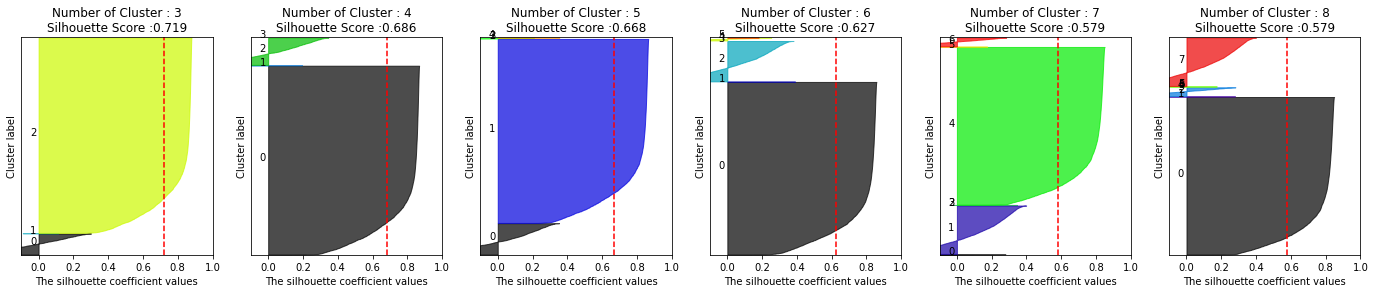

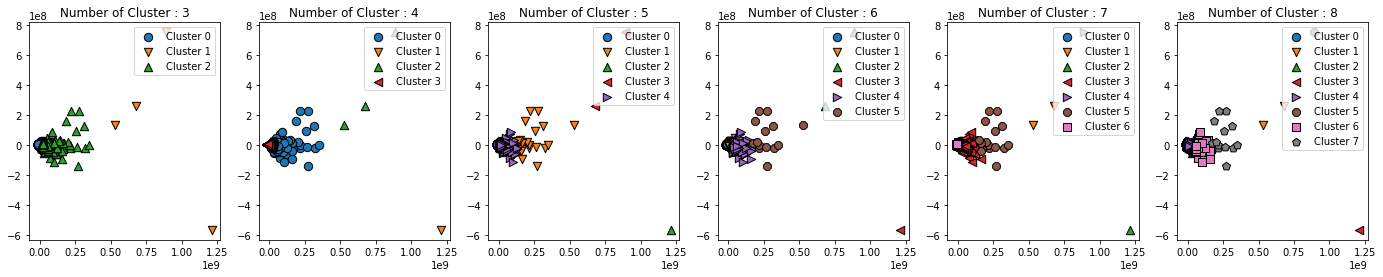

In [ ]:
visualize_silhouette([3,4,5,6,7,8], df_8846_quater.iloc[:, 1:])
visualize_kmeans_plot_multi([3,4,5,6,7,8], df_8846_quater.iloc[:, 1:])

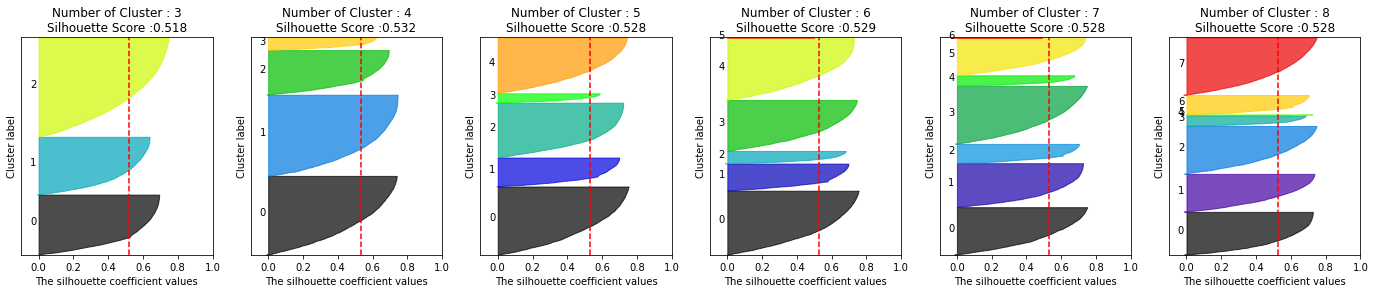

In [ ]:
# 성장률 칼럼만 가지고 군집화
visualize_silhouette([3,4,5,6,7,8], df_8846_quater.iloc[:, -1:])
#visualize_kmeans_plot_multi([3,4,5,6,7,8], df_8846_quater.iloc[:, -1:])

### 엘보우 계수

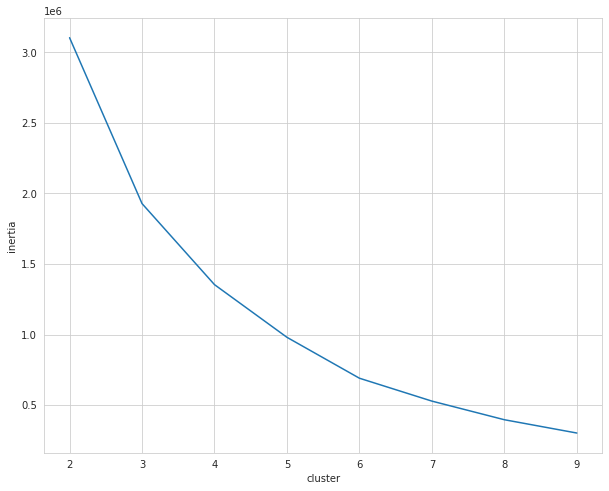

In [ ]:
inertias = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=100)
    kmeans.fit(df_8846_quater.iloc[:, -1:])
    inertias.append(kmeans.inertia_)

data = np.array([range(2, 10), inertias])
newdf = pd.DataFrame(data.T, columns=['cluster', 'inertia'])

plt.figure(figsize=(10,8))
plt.rc('font', family='NanumBarunGothic')

sns.set_style('whitegrid')
sns.lineplot(data = newdf, x='cluster', y='inertia')
#plt.title('성장률 칼럼 기준 엘보우 계수')

## 성장률 칼럼을 기준으로 고객 나눠보기 (클러스터링 X)

In [ ]:
df_8846_quater.describe()

,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기,1~7분기 성장률
count,8846.000000,8.846000e+03,8.846000e+03,8.846000e+03,8.846000e+03,8.846000e+03,8.846000e+03,8.846000e+03,8.846000e+03,8846.000000
mean,9017.942234,5.978101e+06,5.374862e+06,4.672117e+06,5.870348e+06,4.937655e+06,4.729026e+06,3.558864e+06,5.403350e+06,-31.198361
std,5477.071338,1.367278e+07,1.439171e+07,1.103647e+07,1.259104e+07,9.009970e+06,9.838111e+06,6.417677e+06,1.276265e+07,29.559128
min,1.000000,1.150000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-100.000000
25%,4251.750000,1.721289e+06,1.474498e+06,1.420778e+06,1.483990e+06,1.371507e+06,1.318377e+06,1.151074e+06,1.197322e+06,-50.547333
50%,8646.500000,2.981018e+06,2.603323e+06,2.416822e+06,2.711150e+06,2.404211e+06,2.329120e+06,1.928116e+06,2.270992e+06,-29.200459
75%,13726.750000,6.571875e+06,5.976072e+06,5.109190e+06,6.627008e+06,5.382333e+06,5.367664e+06,4.000591e+06,5.879513e+06,-12.056759
max,19334.000000,6.248265e+08,8.364896e+08,6.115875e+08,7.302484e+08,4.011433e+08,6.441495e+08,3.673781e+08,8.805502e+08,495.059363


In [ ]:
# 성장률이 증가한 고객
df_8846_quater[df_8846_quater['1~7분기 성장률'] > 0]

,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기,1~7분기 성장률
10,19,6008260.0,4799320.0,2419340.0,6875320.0,3136780.0,7922630.0,6350470.0,5436250.0,5.695659
13,27,14142790.0,6453126.0,4495610.0,3411150.0,7889490.0,5760890.0,14668500.0,3239460.0,3.717159
20,48,6656870.0,9060110.0,15644210.0,7586700.0,14094990.0,11080190.0,8349400.0,10701170.0,25.425312
43,98,2231922.0,2149150.0,3209642.0,3615427.0,3795300.0,2353240.0,2347034.0,2488372.0,5.157528
46,103,701465.0,458208.0,870994.0,361758.0,632396.0,507212.0,743116.0,465669.0,5.937716
...,...,...,...,...,...,...,...,...,...,...
8791,19142,1467096.0,2003980.0,2321480.0,2573180.0,1462214.0,1584990.0,1497730.0,2709580.0,2.088071
8795,19152,2011182.0,2799500.0,2565220.0,2088270.0,3607730.0,2970940.0,2484212.0,4411338.0,23.520000
8823,19260,1836466.0,1541470.0,2644390.0,2518930.0,1127750.0,1825260.0,2389350.0,6357700.0,30.105866
8827,19267,9349200.0,5998510.0,3113944.0,14952980.0,7382692.0,6976500.0,11277990.0,20605200.0,20.630535


In [ ]:
# 성장률이 -100 인 고객 (7분기에 구매금액이 없는 고객)
len(df_8846_quater[df_8846_quater['1~7분기 성장률'] == -100])

49

In [ ]:
# 성장률이 감소한 고객
df_8846_quater[df_8846_quater['1~7분기 성장률'] < 0].sort_values(by='1~7분기 성장률', ascending=False)

,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기,1~7분기 성장률
1181,2298,2228818.0,1579335.0,2001936.0,1408807.0,2249408.0,2202461.0,2228633.0,1158789.0,-0.008300
5381,10790,2644629.0,2419130.0,2513239.0,3729283.0,2744275.0,2479394.0,2643471.0,3238743.0,-0.043787
7056,14688,1217818.0,1032367.0,1094259.0,1169157.0,1055922.0,1166527.0,1217001.0,1272790.0,-0.067087
1984,3806,1609771.0,1755481.0,1995832.0,332294.0,9569601.0,3006573.0,1608480.0,1808405.0,-0.080198
8298,17687,2489920.0,2339771.0,2555803.0,3093929.0,2687246.0,2517811.0,2487893.0,2491172.0,-0.081408
...,...,...,...,...,...,...,...,...,...,...
5233,10400,2915840.0,5590260.0,2684390.0,6851150.0,3501490.0,1862280.0,0.0,5940.0,-100.000000
8812,19225,292574.0,312120.0,81500.0,771460.0,112750.0,0.0,0.0,0.0,-100.000000
8813,19229,252536.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.000000
8814,19230,92140.0,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,-100.000000


In [ ]:
# 성장률이 감소한 고객 중 7분기에 구매금액이 없는 고객 제외
df_8846_decrese = df_8846_quater[(df_8846_quater['1~7분기 성장률'] < 0) & (df_8846_quater['1~7분기 성장률'] != -100)]
df_8846_decrese

,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기,1~7분기 성장률
0,1,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,-14.603696
1,2,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,-1.988676
3,7,10635873.0,2842322.0,4711569.0,16221723.0,9134885.0,11888419.0,3319835.0,14971650.0,-68.786436
4,10,2545073.0,2585853.0,2252934.0,1971990.0,2874593.0,2393834.0,2173925.0,1752725.0,-14.583000
5,11,12578805.0,14845270.0,31901274.0,12749810.0,2922370.0,30433830.0,3634060.0,19953790.0,-71.109656
...,...,...,...,...,...,...,...,...,...,...
8840,19310,3494470.0,15313400.0,4137750.0,4179150.0,391630.0,541680.0,2408160.0,3115900.0,-31.086545
8842,19325,2264370.0,881850.0,971050.0,18500.0,3558770.0,3749720.0,1280148.0,444701.0,-43.465600
8843,19327,624418.0,1553821.0,1497690.0,1270150.0,1381952.0,645128.0,342311.0,86420.0,-45.179191
8844,19333,613130.0,913988.0,578210.0,455450.0,850690.0,553590.0,252010.0,520430.0,-58.897787


In [ ]:
'''
quater_lst = ['2014_1분기',	'2014_2분기',	'2014_3분기',	'2014_4분기',	'2015_1분기',	'2015_2분기',	'2015_3분기',	'2015_4분기']

for q in quater_lst:
  quarter_buy = df[df['분기'] == q].groupby('고객번호')[['구매금액']].sum().rename(columns={'구매금액' : q})
  tier = []
  for i in np.linspace(0, 1, 10):
    a = quarter_buy[q].quantile(i)
    tier.append(a)
  
  globals()['tier'+str(q)] = pd.cut(quarter_buy[q], tier, right=False, labels=[9,8,7,6,5,4,3,2,1])
'''

In [ ]:
tier = []

for i in np.linspace(0, 1, 4):
  a = df_8846_decrese['1~7분기 성장률'].quantile(i)
  tier.append(a)

tier

[-99.91800797214793,
 -45.86798909131151,
 -22.81055000577418,
 -0.008300363690530136]

In [ ]:
df_8846_decrese['1~7분기 성장률_군집번호'] = pd.cut(df_8846_decrese['1~7분기 성장률'], tier, right=True, labels=[3,2,1], include_lowest=True)
df_8846_decrese

<ipython-input-70-a35ebd7c368b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8846_decrese['1~7분기 성장률_군집번호'] = pd.cut(df_8846_decrese['1~7분기 성장률'], tier, right=True, labels=[3,2,1], include_lowest=True)


,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기,1~7분기 성장률,1~7분기 성장률_군집번호
0,1,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,-14.603696,1
1,2,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,-1.988676,1
3,7,10635873.0,2842322.0,4711569.0,16221723.0,9134885.0,11888419.0,3319835.0,14971650.0,-68.786436,3
4,10,2545073.0,2585853.0,2252934.0,1971990.0,2874593.0,2393834.0,2173925.0,1752725.0,-14.583000,1
5,11,12578805.0,14845270.0,31901274.0,12749810.0,2922370.0,30433830.0,3634060.0,19953790.0,-71.109656,3
...,...,...,...,...,...,...,...,...,...,...,...
8840,19310,3494470.0,15313400.0,4137750.0,4179150.0,391630.0,541680.0,2408160.0,3115900.0,-31.086545,2
8842,19325,2264370.0,881850.0,971050.0,18500.0,3558770.0,3749720.0,1280148.0,444701.0,-43.465600,2
8843,19327,624418.0,1553821.0,1497690.0,1270150.0,1381952.0,645128.0,342311.0,86420.0,-45.179191,2
8844,19333,613130.0,913988.0,578210.0,455450.0,850690.0,553590.0,252010.0,520430.0,-58.897787,3


In [ ]:
df_8846_decrese.isna().sum()

고객번호              0
2014_1분기          0
2014_2분기          0
2014_3분기          0
2014_4분기          0
2015_1분기          0
2015_2분기          0
2015_3분기          0
2015_4분기          0
1~7분기 성장률         0
1~7분기 성장률_군집번호    0
dtype: int64

In [ ]:
df_8846_decrese['1~7분기 성장률_군집번호'].value_counts()

3    2607
2    2606
1    2606
Name: 1~7분기 성장률_군집번호, dtype: int64

In [ ]:
# 성장률이 증가한 고객
df_8846_increse = df_8846_quater[df_8846_quater['1~7분기 성장률'] > 0].reset_index().iloc[:, 1:]
df_8846_increse['1~7분기 성장률_군집번호'] = 0
df_8846_increse

,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기,1~7분기 성장률,1~7분기 성장률_군집번호
0,19,6008260.0,4799320.0,2419340.0,6875320.0,3136780.0,7922630.0,6350470.0,5436250.0,5.695659,0
1,27,14142790.0,6453126.0,4495610.0,3411150.0,7889490.0,5760890.0,14668500.0,3239460.0,3.717159,0
2,48,6656870.0,9060110.0,15644210.0,7586700.0,14094990.0,11080190.0,8349400.0,10701170.0,25.425312,0
3,98,2231922.0,2149150.0,3209642.0,3615427.0,3795300.0,2353240.0,2347034.0,2488372.0,5.157528,0
4,103,701465.0,458208.0,870994.0,361758.0,632396.0,507212.0,743116.0,465669.0,5.937716,0
...,...,...,...,...,...,...,...,...,...,...,...
973,19142,1467096.0,2003980.0,2321480.0,2573180.0,1462214.0,1584990.0,1497730.0,2709580.0,2.088071,0
974,19152,2011182.0,2799500.0,2565220.0,2088270.0,3607730.0,2970940.0,2484212.0,4411338.0,23.520000,0
975,19260,1836466.0,1541470.0,2644390.0,2518930.0,1127750.0,1825260.0,2389350.0,6357700.0,30.105866,0
976,19267,9349200.0,5998510.0,3113944.0,14952980.0,7382692.0,6976500.0,11277990.0,20605200.0,20.630535,0


In [ ]:
# 성장률이 -100 인 고객
df_8846_zero = df_8846_quater[df_8846_quater['1~7분기 성장률'] == -100].reset_index().iloc[:, 1:]
df_8846_zero['1~7분기 성장률_군집번호'] = 4
df_8846_zero

,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기,1~7분기 성장률,1~7분기 성장률_군집번호
0,5,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,0.0,2616260.0,-100.0,4
1,174,386500.0,0.0,0.0,0.0,0.0,38700.0,0.0,0.0,-100.0,4
2,460,2619155.0,7517110.0,3356540.0,9215640.0,4531070.0,2069850.0,0.0,0.0,-100.0,4
3,985,1109600.0,9509140.0,3352740.0,17555490.0,3137570.0,246880.0,0.0,27420.0,-100.0,4
4,1881,51516.0,24300.0,0.0,0.0,297000.0,0.0,0.0,0.0,-100.0,4
5,3257,28670.0,0.0,20680.0,1162880.0,0.0,60000.0,0.0,25200.0,-100.0,4
6,3449,420124.0,59500.0,91500.0,46700.0,69000.0,45000.0,0.0,2731110.0,-100.0,4
7,4419,545522.0,0.0,0.0,0.0,288000.0,0.0,0.0,0.0,-100.0,4
8,4926,364173.0,0.0,0.0,0.0,175000.0,133200.0,0.0,156500.0,-100.0,4
9,5704,2417190.0,2392040.0,2683390.0,6451772.0,0.0,0.0,0.0,0.0,-100.0,4


In [ ]:
df_8846_group = pd.concat([df_8846_increse, df_8846_decrese, df_8846_zero]).sort_values(by='고객번호').reset_index().iloc[:, 1:]
df_8846_group
df_8846_group.to_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/유의고객8846명군집번호.csv')

In [ ]:
df_8846_group.to_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/유의고객8846명군집번호.csv')

In [ ]:
df_8846_group['1~7분기 성장률_군집번호'].value_counts()

3    2607
1    2606
2    2606
0     978
4      49
Name: 1~7분기 성장률_군집번호, dtype: int64

In [ ]:
df_8797_data = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/유의고객8797명군집번호(성장률-100인고객제외).csv').iloc[:, 1:]
df_8797_data

# 모든고객_합본(원본값)+8846명성장률군집번호.csv

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df_8846_group = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/유의고객8846명군집번호.csv').iloc[:, 1:]
df_8846_group

,고객번호,2014_1분기,2014_2분기,2014_3분기,2014_4분기,2015_1분기,2015_2분기,2015_3분기,2015_4분기,1~7분기 성장률,1~7분기 성장률_군집번호
0,1,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,-14.603696,1
1,2,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,-1.988676,1
2,5,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,0.0,2616260.0,-100.000000,4
3,7,10635873.0,2842322.0,4711569.0,16221723.0,9134885.0,11888419.0,3319835.0,14971650.0,-68.786436,3
4,10,2545073.0,2585853.0,2252934.0,1971990.0,2874593.0,2393834.0,2173925.0,1752725.0,-14.583000,1
...,...,...,...,...,...,...,...,...,...,...,...
8841,19312,2436390.0,4901048.0,4777330.0,6057150.0,26634930.0,15372320.0,3330492.0,3607698.0,36.697819,0
8842,19325,2264370.0,881850.0,971050.0,18500.0,3558770.0,3749720.0,1280148.0,444701.0,-43.465600,2
8843,19327,624418.0,1553821.0,1497690.0,1270150.0,1381952.0,645128.0,342311.0,86420.0,-45.179191,2
8844,19333,613130.0,913988.0,578210.0,455450.0,850690.0,553590.0,252010.0,520430.0,-58.897787,3


In [ ]:
pd.set_option('display.max_columns', None)
total = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/features/모든고객_합본(원본값).csv').iloc[:, 1:]

print(total.shape)
total[:3]

(19383, 165)


,고객번호,성별,연령대,고객정보,거주지역,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,2분기_가구/인테리어_금액,3분기_가구/인테리어_금액,4분기_가구/인테리어_금액,5분기_가구/인테리어_금액,6분기_가구/인테리어_금액,7분기_가구/인테리어_금액,8분기_가구/인테리어_금액,1분기_신선식품_금액,2분기_신선식품_금액,3분기_신선식품_금액,4분기_신선식품_금액,5분기_신선식품_금액,6분기_신선식품_금액,7분기_신선식품_금액,8분기_신선식품_금액,1분기_의류_금액,2분기_의류_금액,3분기_의류_금액,4분기_의류_금액,5분기_의류_금액,6분기_의류_금액,7분기_의류_금액,8분기_의류_금액,1분기_일상용품_금액,2분기_일상용품_금액,3분기_일상용품_금액,4분기_일상용품_금액,5분기_일상용품_금액,6분기_일상용품_금액,7분기_일상용품_금액,8분기_일상용품_금액,1분기_전문스포츠/레저_금액,2분기_전문스포츠/레저_금액,3분기_전문스포츠/레저_금액,4분기_전문스포츠/레저_금액,5분기_전문스포츠/레저_금액,6분기_전문스포츠/레저_금액,7분기_전문스포츠/레저_금액,8분기_전문스포츠/레저_금액,1분기_패션잡화_금액,2분기_패션잡화_금액,3분기_패션잡화_금액,4분기_패션잡화_금액,5분기_패션잡화_금액,6분기_패션잡화_금액,7분기_패션잡화_금액,8분기_패션잡화_금액,1분기_디지털/가전_금액,2분기_디지털/가전_금액,3분기_디지털/가전_금액,4분기_디지털/가전_금액,5분기_디지털/가전_금액,6분기_디지털/가전_금액,7분기_디지털/가전_금액,8분기_디지털/가전_금액,1분기_교육/문화용품_금액,2분기_교육/문화용품_금액,3분기_교육/문화용품_금액,4분기_교육/문화용품_금액,5분기_교육/문화용품_금액,6분기_교육/문화용품_금액,7분기_교육/문화용품_금액,8분기_교육/문화용품_금액,1분기_기타상품_금액,2분기_기타상품_금액,3분기_기타상품_금액,4분기_기타상품_금액,5분기_기타상품_금액,6분기_기타상품_금액,7분기_기타상품_금액,8분기_기타상품_금액,1분기_의약품/의료기기_금액,2분기_의약품/의료기기_금액,3분기_의약품/의료기기_금액,4분기_의약품/의료기기_금액,5분기_의약품/의료기기_금액,6분기_의약품/의료기기_금액,7분기_의약품/의료기기_금액,8분기_의약품/의료기기_금액,1분기_전체금액,2분기_전체금액,3분기_전체금액,4분기_전체금액,5분기_전체금액,6분기_전체금액,7분기_전체금액,8분기_전체금액,1분기_A_금액,2분기_A_금액,3분기_A_금액,4분기_A_금액,5분기_A_금액,6분기_A_금액,7분기_A_금액,8분기_A_금액,1분기_B_금액,2분기_B_금액,3분기_B_금액,4분기_B_금액,5분기_B_금액,6분기_B_금액,7분기_B_금액,8분기_B_금액,1분기_C_금액,2분기_C_금액,3분기_C_금액,4분기_C_금액,5분기_C_금액,6분기_C_금액,7분기_C_금액,8분기_C_금액,1분기_D_금액,2분기_D_금액,3분기_D_금액,4분기_D_금액,5분기_D_금액,6분기_D_금액,7분기_D_금액,8분기_D_금액,A1기_visit,A2기_visit,A3기_visit,A4기_visit,A5기_visit,A6기_visit,A7기_visit,A8기_visit,B1기_visit,B2기_visit,B3기_visit,B4기_visit,B5기_visit,B6기_visit,B7기_visit,B8기_visit,C1기_visit,C2기_visit,C3기_visit,C4기_visit,C5기_visit,C6기_visit,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,M,60세이상,60세이상 남성,서울특별시 강남구,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,0.0,63840.0,4706400.0,85500.0,491750.0,0.0,137750.0,422590.0,721735.0,274550.0,1027142.0,671145.0,544710.0,129000.0,237838.0,4464210.0,4445160.0,5754150.0,5051050.0,4541040.0,6353090.0,4256810.0,3493160.0,1644620.0,564650.0,3390310.0,1325290.0,875710.0,248150.0,0.0,782560.0,706800.0,1436400.0,0.0,0.0,509730.0,90250.0,234650.0,150000.0,361490.0,1355370.0,380550.0,1254030.0,1252160.0,258200.0,886050.0,158000.0,0.0,0.0,9900.0,9052200.0,291000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,9119790.0,10583420.0,10722160.0,22618140.0,9007070.0,8375680.0,7692890.0,5108000.0,21800.0,0.0,4700.0,371440.0,189636.0,18500.0,111500.0,73400.0,0.0,200345.0,54690.0,345182.0,106279.0,201200.0,2190.0,114538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,78.0,95.0,111.0,105.0,68.0,61.0,43.0,1.0,0.0,1.0,3.0,3.0,1.0,6.0,4.0,0.0,4.0,4.0,5.0,3.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,M,60세이상,60세이상 남성,경기도 김포시,995980.0,772050.0,742510.0,612340.0,493040.0,183820.0,495880.0,670120.0,474900.0,55800.0,0.0,39000.0,78120.0,0.0,290910.0,0.0,1911260.0,1674740.0,1101590.0,1223330.0,1410190.0,756680.0,858310.0,1062020.0,1615870.0,1855430.0,3920090.0,2196660.0,6926120.0,1590400.0,3668100.0,5380760.0,6303810.0,2388610.0,5763670.0,1873000.0,3922140.0,5818800.0,3294140.0,4050030.0,2194330.0,1755430.0,2265960.0,441610.0,1780190.0,642630.0,1171420.0,534840.0,332320.0,571000.0,359360.0,692280.0,1990680.0,317800.0,682190.0,303450.0,295000.0,1126700.0,688000.0,2700.0,1881000.0,0.0,3381650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,14092970.0,10199760.0,14841180.0,7034470.0,18386680.0,9099970.0,13798600.0,12001220.0,30500.0,0.0,0.0,46450.0,94800.0,37700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172460.0,44000.0,0

In [ ]:
len(total['고객번호'].unique())

19383

In [ ]:
cust_lst = df_8846_group['고객번호'].unique().tolist()
total_8846 = total[total['고객번호'].isin(cust_lst)]

print(total_8846.shape)
print(len(total_8846['고객번호'].unique()))

(8846, 165)
8846


In [ ]:
total_8846_df = pd.merge(df_8846_group.loc[: ,['고객번호', '1~7분기 성장률', '1~7분기 성장률_군집번호']], total_8846, on='고객번호', how='left')
total_8846_df

,고객번호,1~7분기 성장률,1~7분기 성장률_군집번호,성별,연령대,고객정보,거주지역,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,2분기_가구/인테리어_금액,3분기_가구/인테리어_금액,4분기_가구/인테리어_금액,5분기_가구/인테리어_금액,6분기_가구/인테리어_금액,7분기_가구/인테리어_금액,8분기_가구/인테리어_금액,1분기_신선식품_금액,2분기_신선식품_금액,3분기_신선식품_금액,4분기_신선식품_금액,5분기_신선식품_금액,6분기_신선식품_금액,7분기_신선식품_금액,8분기_신선식품_금액,1분기_의류_금액,2분기_의류_금액,3분기_의류_금액,4분기_의류_금액,5분기_의류_금액,6분기_의류_금액,7분기_의류_금액,8분기_의류_금액,1분기_일상용품_금액,2분기_일상용품_금액,3분기_일상용품_금액,4분기_일상용품_금액,5분기_일상용품_금액,6분기_일상용품_금액,7분기_일상용품_금액,8분기_일상용품_금액,1분기_전문스포츠/레저_금액,2분기_전문스포츠/레저_금액,3분기_전문스포츠/레저_금액,4분기_전문스포츠/레저_금액,5분기_전문스포츠/레저_금액,6분기_전문스포츠/레저_금액,7분기_전문스포츠/레저_금액,8분기_전문스포츠/레저_금액,1분기_패션잡화_금액,2분기_패션잡화_금액,3분기_패션잡화_금액,4분기_패션잡화_금액,5분기_패션잡화_금액,6분기_패션잡화_금액,7분기_패션잡화_금액,8분기_패션잡화_금액,1분기_디지털/가전_금액,2분기_디지털/가전_금액,3분기_디지털/가전_금액,4분기_디지털/가전_금액,5분기_디지털/가전_금액,6분기_디지털/가전_금액,7분기_디지털/가전_금액,8분기_디지털/가전_금액,1분기_교육/문화용품_금액,2분기_교육/문화용품_금액,3분기_교육/문화용품_금액,4분기_교육/문화용품_금액,5분기_교육/문화용품_금액,6분기_교육/문화용품_금액,7분기_교육/문화용품_금액,8분기_교육/문화용품_금액,1분기_기타상품_금액,2분기_기타상품_금액,3분기_기타상품_금액,4분기_기타상품_금액,5분기_기타상품_금액,6분기_기타상품_금액,7분기_기타상품_금액,8분기_기타상품_금액,1분기_의약품/의료기기_금액,2분기_의약품/의료기기_금액,3분기_의약품/의료기기_금액,4분기_의약품/의료기기_금액,5분기_의약품/의료기기_금액,6분기_의약품/의료기기_금액,7분기_의약품/의료기기_금액,8분기_의약품/의료기기_금액,1분기_전체금액,2분기_전체금액,3분기_전체금액,4분기_전체금액,5분기_전체금액,6분기_전체금액,7분기_전체금액,8분기_전체금액,1분기_A_금액,2분기_A_금액,3분기_A_금액,4분기_A_금액,5분기_A_금액,6분기_A_금액,7분기_A_금액,8분기_A_금액,1분기_B_금액,2분기_B_금액,3분기_B_금액,4분기_B_금액,5분기_B_금액,6분기_B_금액,7분기_B_금액,8분기_B_금액,1분기_C_금액,2분기_C_금액,3분기_C_금액,4분기_C_금액,5분기_C_금액,6분기_C_금액,7분기_C_금액,8분기_C_금액,1분기_D_금액,2분기_D_금액,3분기_D_금액,4분기_D_금액,5분기_D_금액,6분기_D_금액,7분기_D_금액,8분기_D_금액,A1기_visit,A2기_visit,A3기_visit,A4기_visit,A5기_visit,A6기_visit,A7기_visit,A8기_visit,B1기_visit,B2기_visit,B3기_visit,B4기_visit,B5기_visit,B6기_visit,B7기_visit,B8기_visit,C1기_visit,C2기_visit,C3기_visit,C4기_visit,C5기_visit,C6기_visit,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,-14.603696,1,M,60세이상,60세이상 남성,서울특별시 강남구,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,0.0,63840.0,4706400.0,85500.0,491750.0,0.0,137750.0,422590.0,721735.0,274550.0,1027142.0,671145.0,544710.0,129000.0,237838.0,4464210.0,4445160.0,5754150.0,5051050.0,4541040.0,6353090.0,4256810.0,3493160.0,1644620.0,564650.0,3390310.0,1325290.0,875710.0,248150.0,0.0,782560.0,706800.0,1436400.0,0.0,0.0,509730.0,90250.0,234650.0,150000.0,361490.0,1355370.0,380550.0,1254030.0,1252160.0,258200.0,886050.0,158000.0,0.0,0.0,9900.0,9052200.0,291000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,9119790.0,10583420.0,10722160.0,22618140.0,9007070.0,8375680.0,7692890.0,5108000.0,21800.0,0.0,4700.0,371440.0,189636.0,18500.0,111500.0,73400.0,0.0,200345.0,54690.0,345182.0,106279.0,201200.0,2190.0,114538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,78.0,95.0,111.0,105.0,68.0,61.0,43.0,1.0,0.0,1.0,3.0,3.0,1.0,6.0,4.0,0.0,4.0,4.0,5.0,3.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-1.988676,1,M,60세이상,60세이상 남성,경기도 김포시,995980.0,772050.0,742510.0,612340.0,493040.0,183820.0,495880.0,670120.0,474900.0,55800.0,0.0,39000.0,78120.0,0.0,290910.0,0.0,1911260.0,1674740.0,1101590.0,1223330.0,1410190.0,756680.0,858310.0,1062020.0,1615870.0,1855430.0,3920090.0,2196660.0,6926120.0,1590400.0,3668100.0,5380760.0,6303810.0,2388610.0,5763670.0,1873000.0,3922140.0,5818800.0,3294140.0,4050030.0,2194330.0,1755430.0,2265960.0,441610.0,1780190.0,642630.0,1171420.0,534840.0,332320.0,571000.0,359360.0,692280.0,1990680.0,317800.0,682190.0,303450.0,295000.0,1126700.0,688000.0,2700.0,1881000.0,0.0,3381650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,14092970.0,10199760.0,14841180.0,7034470.0,18386680.0,9099970.0,13798600.0,12001220.0,30500.0,0.0,0.0,46450.0,94800.0,37700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
total_8846_df.to_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/모든고객_합본(원본값)+8846명성장률군집번호.csv')

In [ ]:
total_8846_df.to_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/모든고객_합본(원본값)+8846명성장률군집번호.csv')

## 군집번호별로 그룹화하여 특성 분석

In [2]:
total_8846_df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/모든고객_합본(원본값)+8846명성장률군집번호.csv').iloc[:, 1:]
total_8846_df[:3]

,고객번호,1~7분기 성장률,1~7분기 성장률_군집번호,성별,연령대,고객정보,거주지역,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,...,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,-14.603696,1,M,60세이상,60세이상 남성,서울특별시 강남구,1364230.0,2260450.0,908250.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-1.988676,1,M,60세이상,60세이상 남성,경기도 김포시,995980.0,772050.0,742510.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0
2,5,-100.000000,4,M,60세이상,60세이상 남성,경기도 김포시,1294020.0,1049220.0,762800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0


In [ ]:
# '고객번호', '1~7분기 성장률', '1~7분기 성장률_군집번호', '성별', '연령대', '고객정보', '거주지역',
# '1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
# '1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
# '1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
# '1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수'
total_8846_df.columns.tolist()

In [3]:
a = total_8846_df.drop(columns=['고객번호', '1~7분기 성장률', '성별', '연령대', '고객정보', '거주지역'])
a[:1]

,1~7분기 성장률_군집번호,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,...,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
가공식품 = pd.melt(frame=a.iloc[:, :9], id_vars='1~7분기 성장률_군집번호', var_name='1~8분기별 가공식품 금액')
가공식품
#, value_vars: Any | None = None, var_name: Any | None = None, value_name: str = "value", col_level: Any | None = None, ignore_index: bool = True)

,1~7분기 성장률_군집번호,1~8분기별 가공식품 금액,value
0,1,1분기_가공식품_금액,1364230.0
1,1,1분기_가공식품_금액,995980.0
2,4,1분기_가공식품_금액,1294020.0
3,3,1분기_가공식품_금액,673470.0
4,1,1분기_가공식품_금액,604510.0
...,...,...,...
70763,0,8분기_가공식품_금액,579360.0
70764,2,8분기_가공식품_금액,113900.0
70765,2,8분기_가공식품_금액,76350.0
70766,3,8분기_가공식품_금액,319730.0


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_

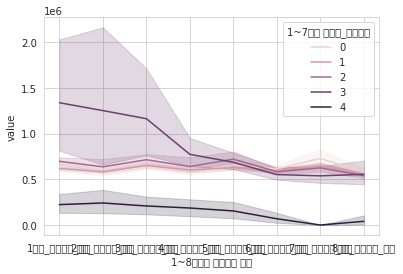

In [ ]:
sns.lineplot(data=가공식품, x='1~8분기별 가공식품 금액', y='value', hue='1~7분기 성장률_군집번호')

### 0군집

In [ ]:
# 20개 칼럼
# '1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
# '1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
# '1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
# '1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수'

In [ ]:
a0 = a[a['1~7분기 성장률_군집번호'] == 0].reset_index().iloc[:, 1:]
a0[:1]

,1~7분기 성장률_군집번호,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,...,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,0,751660.0,554870.0,358210.0,282140.0,207830.0,118160.0,409500.0,295470.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#pd.melt(frame=a0.iloc[:, 1:9], var_name='1~8분기별 가공식품 금액')
pd.melt(frame=a0.iloc[:, 9:17], var_name='1~8분기별 가공식품 금액')

,1~8분기별 가공식품 금액,value
0,1분기_가구/인테리어_금액,0.0
1,1분기_가구/인테리어_금액,0.0
2,1분기_가구/인테리어_금액,0.0
3,1분기_가구/인테리어_금액,0.0
4,1분기_가구/인테리어_금액,0.0
...,...,...
7819,8분기_가구/인테리어_금액,0.0
7820,8분기_가구/인테리어_금액,39900.0
7821,8분기_가구/인테리어_금액,0.0
7822,8분기_가구/인테리어_금액,0.0


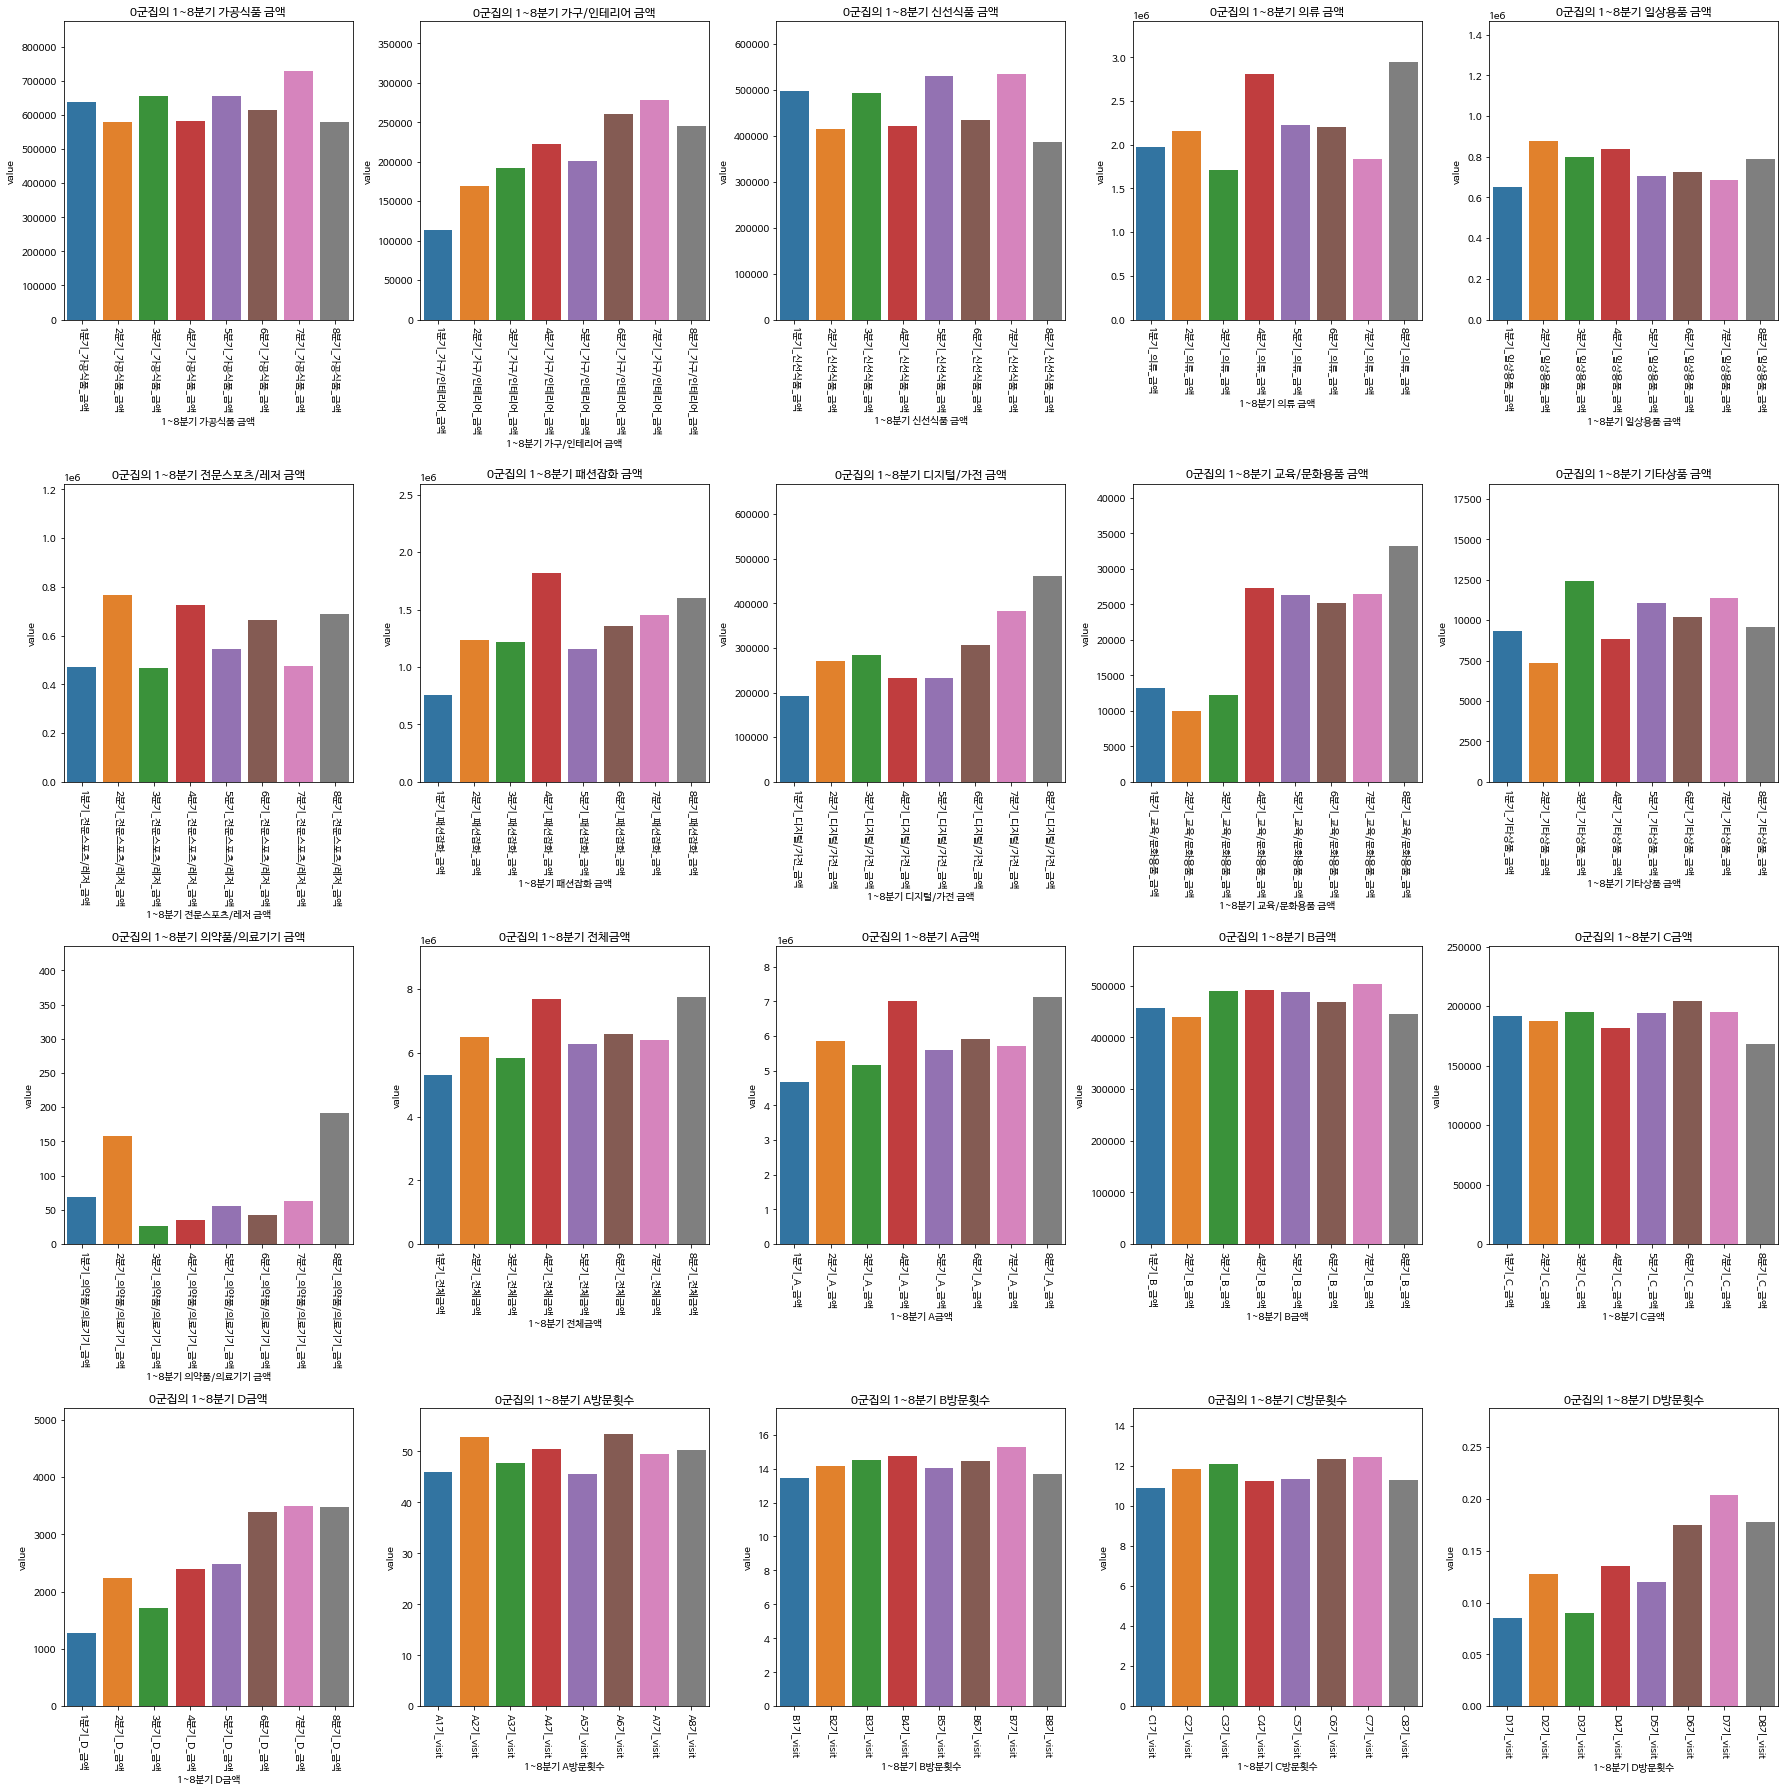

In [ ]:
col_lst = ['1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
'1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
'1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
'1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수']

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(25,25))

for i, col in enumerate(col_lst):
  plt.subplot(4, 5, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'0군집의 {col}')
  
  sns.barplot(data = pd.melt(frame=a0.iloc[:, (i*8)+1:(i*8)+9], var_name=f'{col}'), x=f'{col}', y='value', errwidth=0) 
  #plt.ylabel('count')

#plt.title('0군집_칼럼별 특성 시각화')
plt.savefig('0군집_칼럼별 특성 시각화.png')

### 1군집

In [ ]:
# 20개 칼럼
# '1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
# '1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
# '1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
# '1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수'

In [ ]:
a1 = a[a['1~7분기 성장률_군집번호'] == 1].reset_index().iloc[:, 1:]
a1[:1]

,1~7분기 성장률_군집번호,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,...,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.melt(frame=a1.iloc[:, 1:9], var_name='1~8분기별 가공식품 금액')
#pd.melt(frame=a1.iloc[:, 9:17], var_name='1~8분기별 가공식품 금액')

,1~8분기별 가공식품 금액,value
0,1분기_가공식품_금액,1364230.0
1,1분기_가공식품_금액,995980.0
2,1분기_가공식품_금액,604510.0
3,1분기_가공식품_금액,928130.0
4,1분기_가공식품_금액,112280.0
...,...,...
20843,8분기_가공식품_금액,181330.0
20844,8분기_가공식품_금액,203700.0
20845,8분기_가공식품_금액,334390.0
20846,8분기_가공식품_금액,282540.0


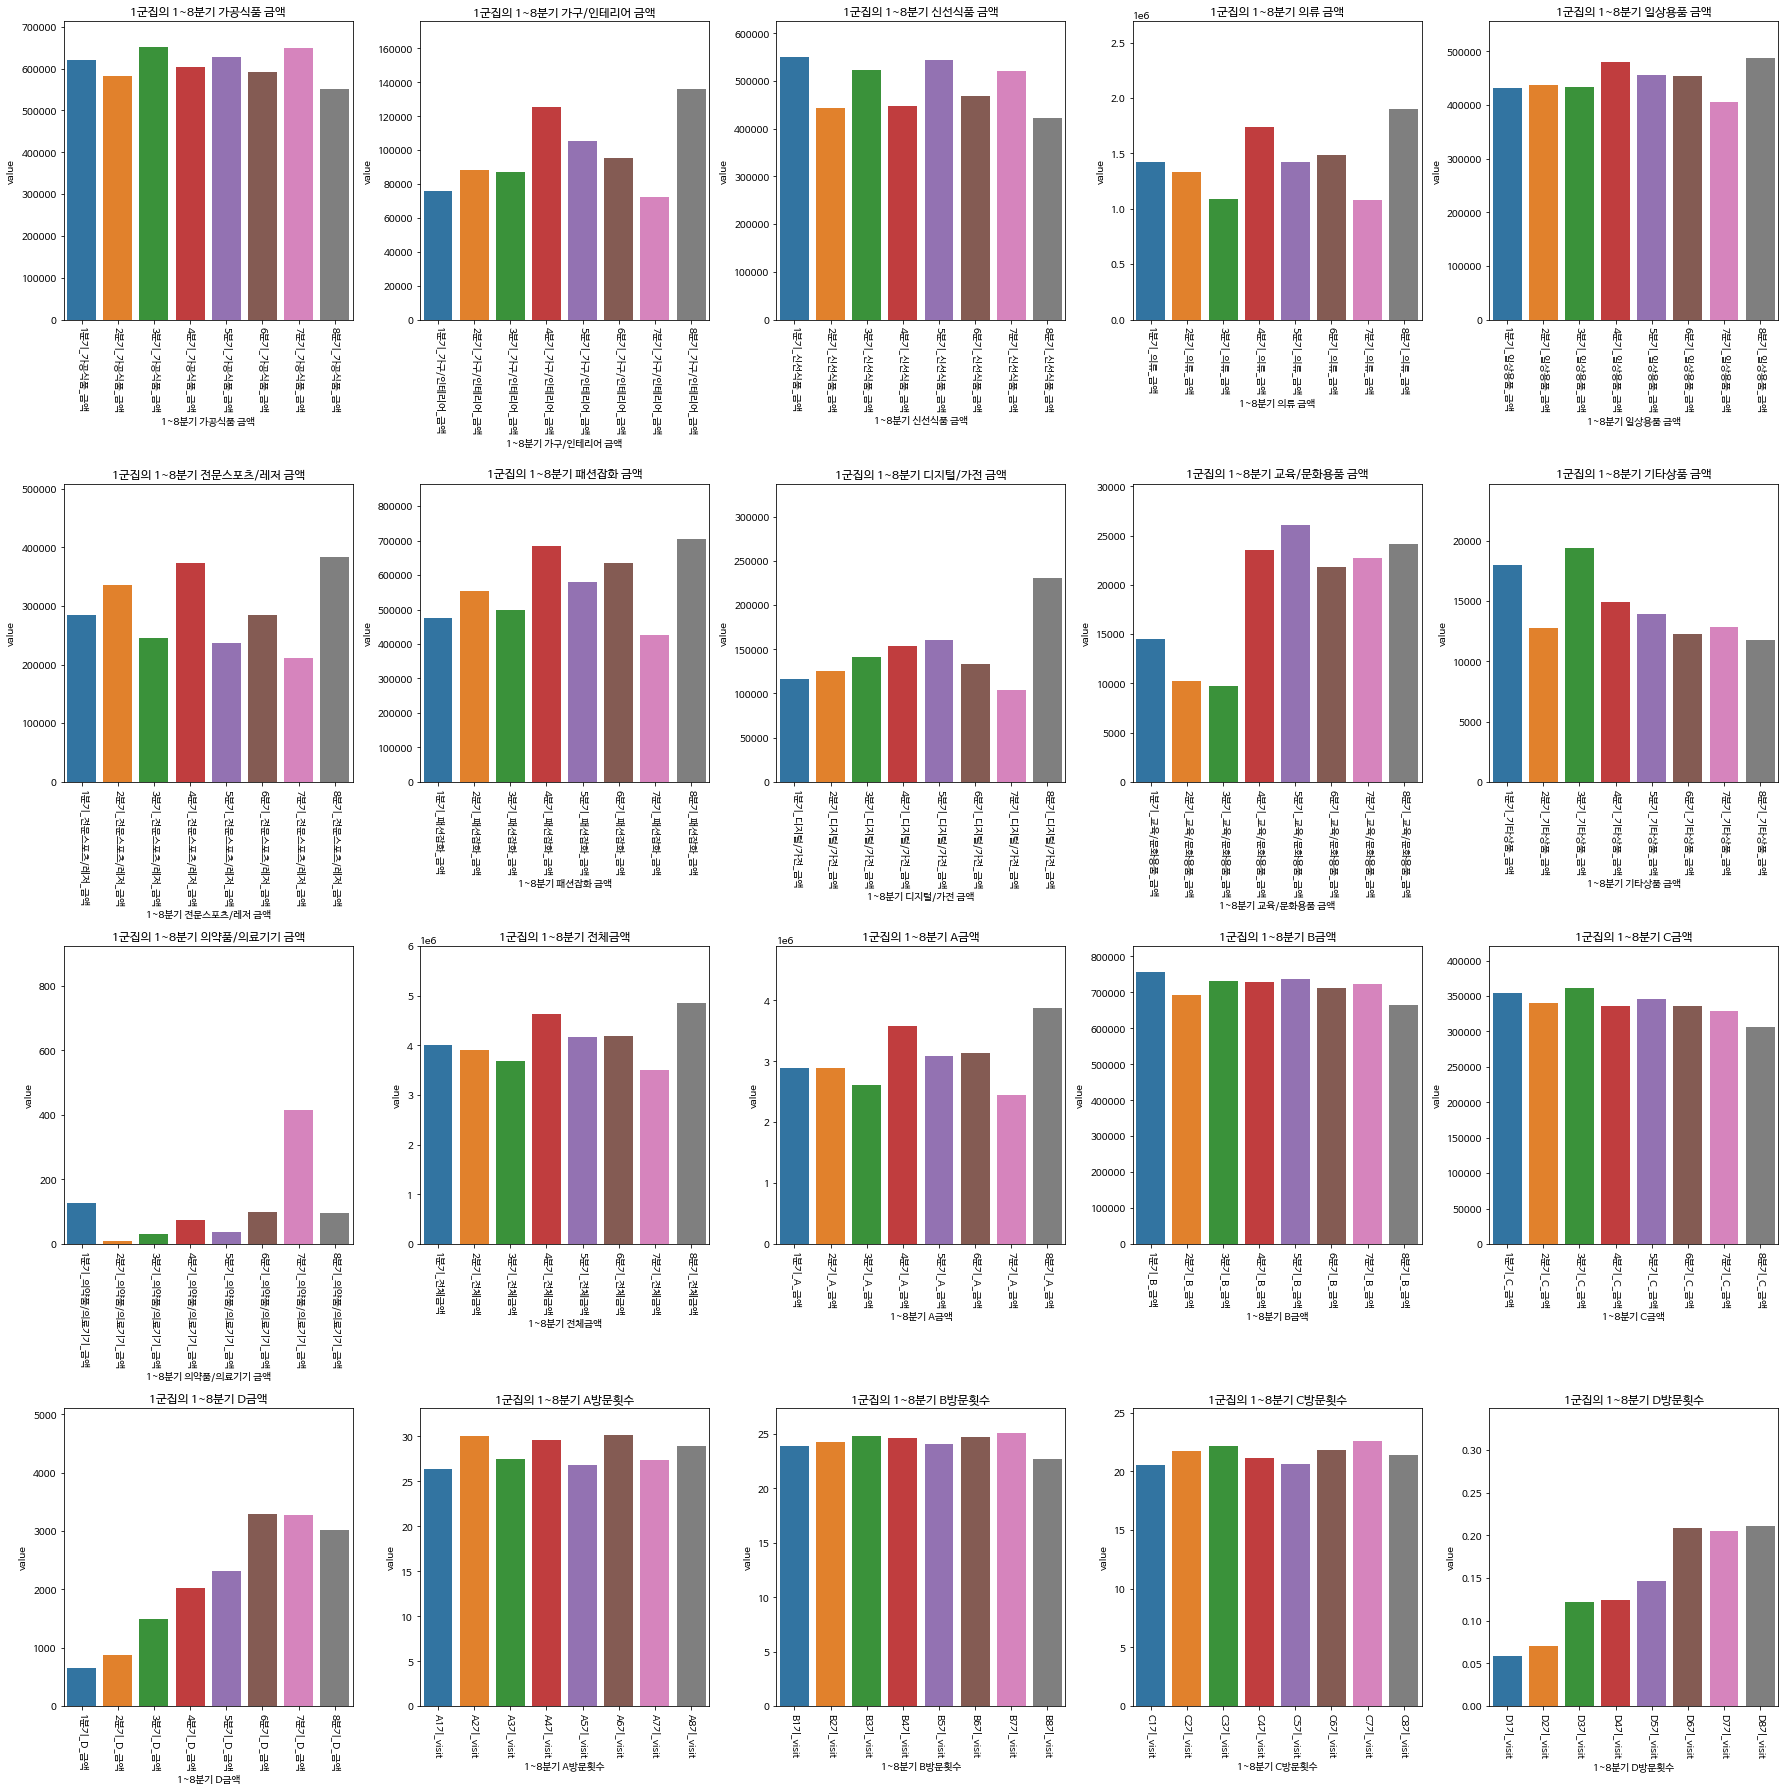

In [ ]:
col_lst = ['1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
'1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
'1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
'1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수']

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(25,25))

for i, col in enumerate(col_lst):
  plt.subplot(4, 5, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'1군집의 {col}')
  
  sns.barplot(data = pd.melt(frame=a1.iloc[:, (i*8)+1:(i*8)+9], var_name=f'{col}'), x=f'{col}', y='value', errwidth=0) 
  #plt.ylabel('count')
  
plt.savefig('1군집_칼럼별 특성 시각화.png')

### 2군집

In [ ]:
# 20개 칼럼
# '1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
# '1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
# '1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
# '1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수'

In [ ]:
a2 = a[a['1~7분기 성장률_군집번호'] == 2].reset_index().iloc[:, 1:]
a2[:1]

,1~7분기 성장률_군집번호,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,...,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,2,305020.0,1026270.0,772430.0,850216.0,701750.0,891316.0,1213856.0,593618.0,217100.0,...,18.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.melt(frame=a2.iloc[:, 1:9], var_name='1~8분기별 가공식품 금액')
#pd.melt(frame=a1.iloc[:, 9:17], var_name='1~8분기별 가공식품 금액')

,1~8분기별 가공식품 금액,value
0,1분기_가공식품_금액,305020.0
1,1분기_가공식품_금액,1305470.0
2,1분기_가공식품_금액,448770.0
3,1분기_가공식품_금액,335690.0
4,1분기_가공식품_금액,463390.0
...,...,...
20843,8분기_가공식품_금액,118490.0
20844,8분기_가공식품_금액,469960.0
20845,8분기_가공식품_금액,113900.0
20846,8분기_가공식품_금액,76350.0


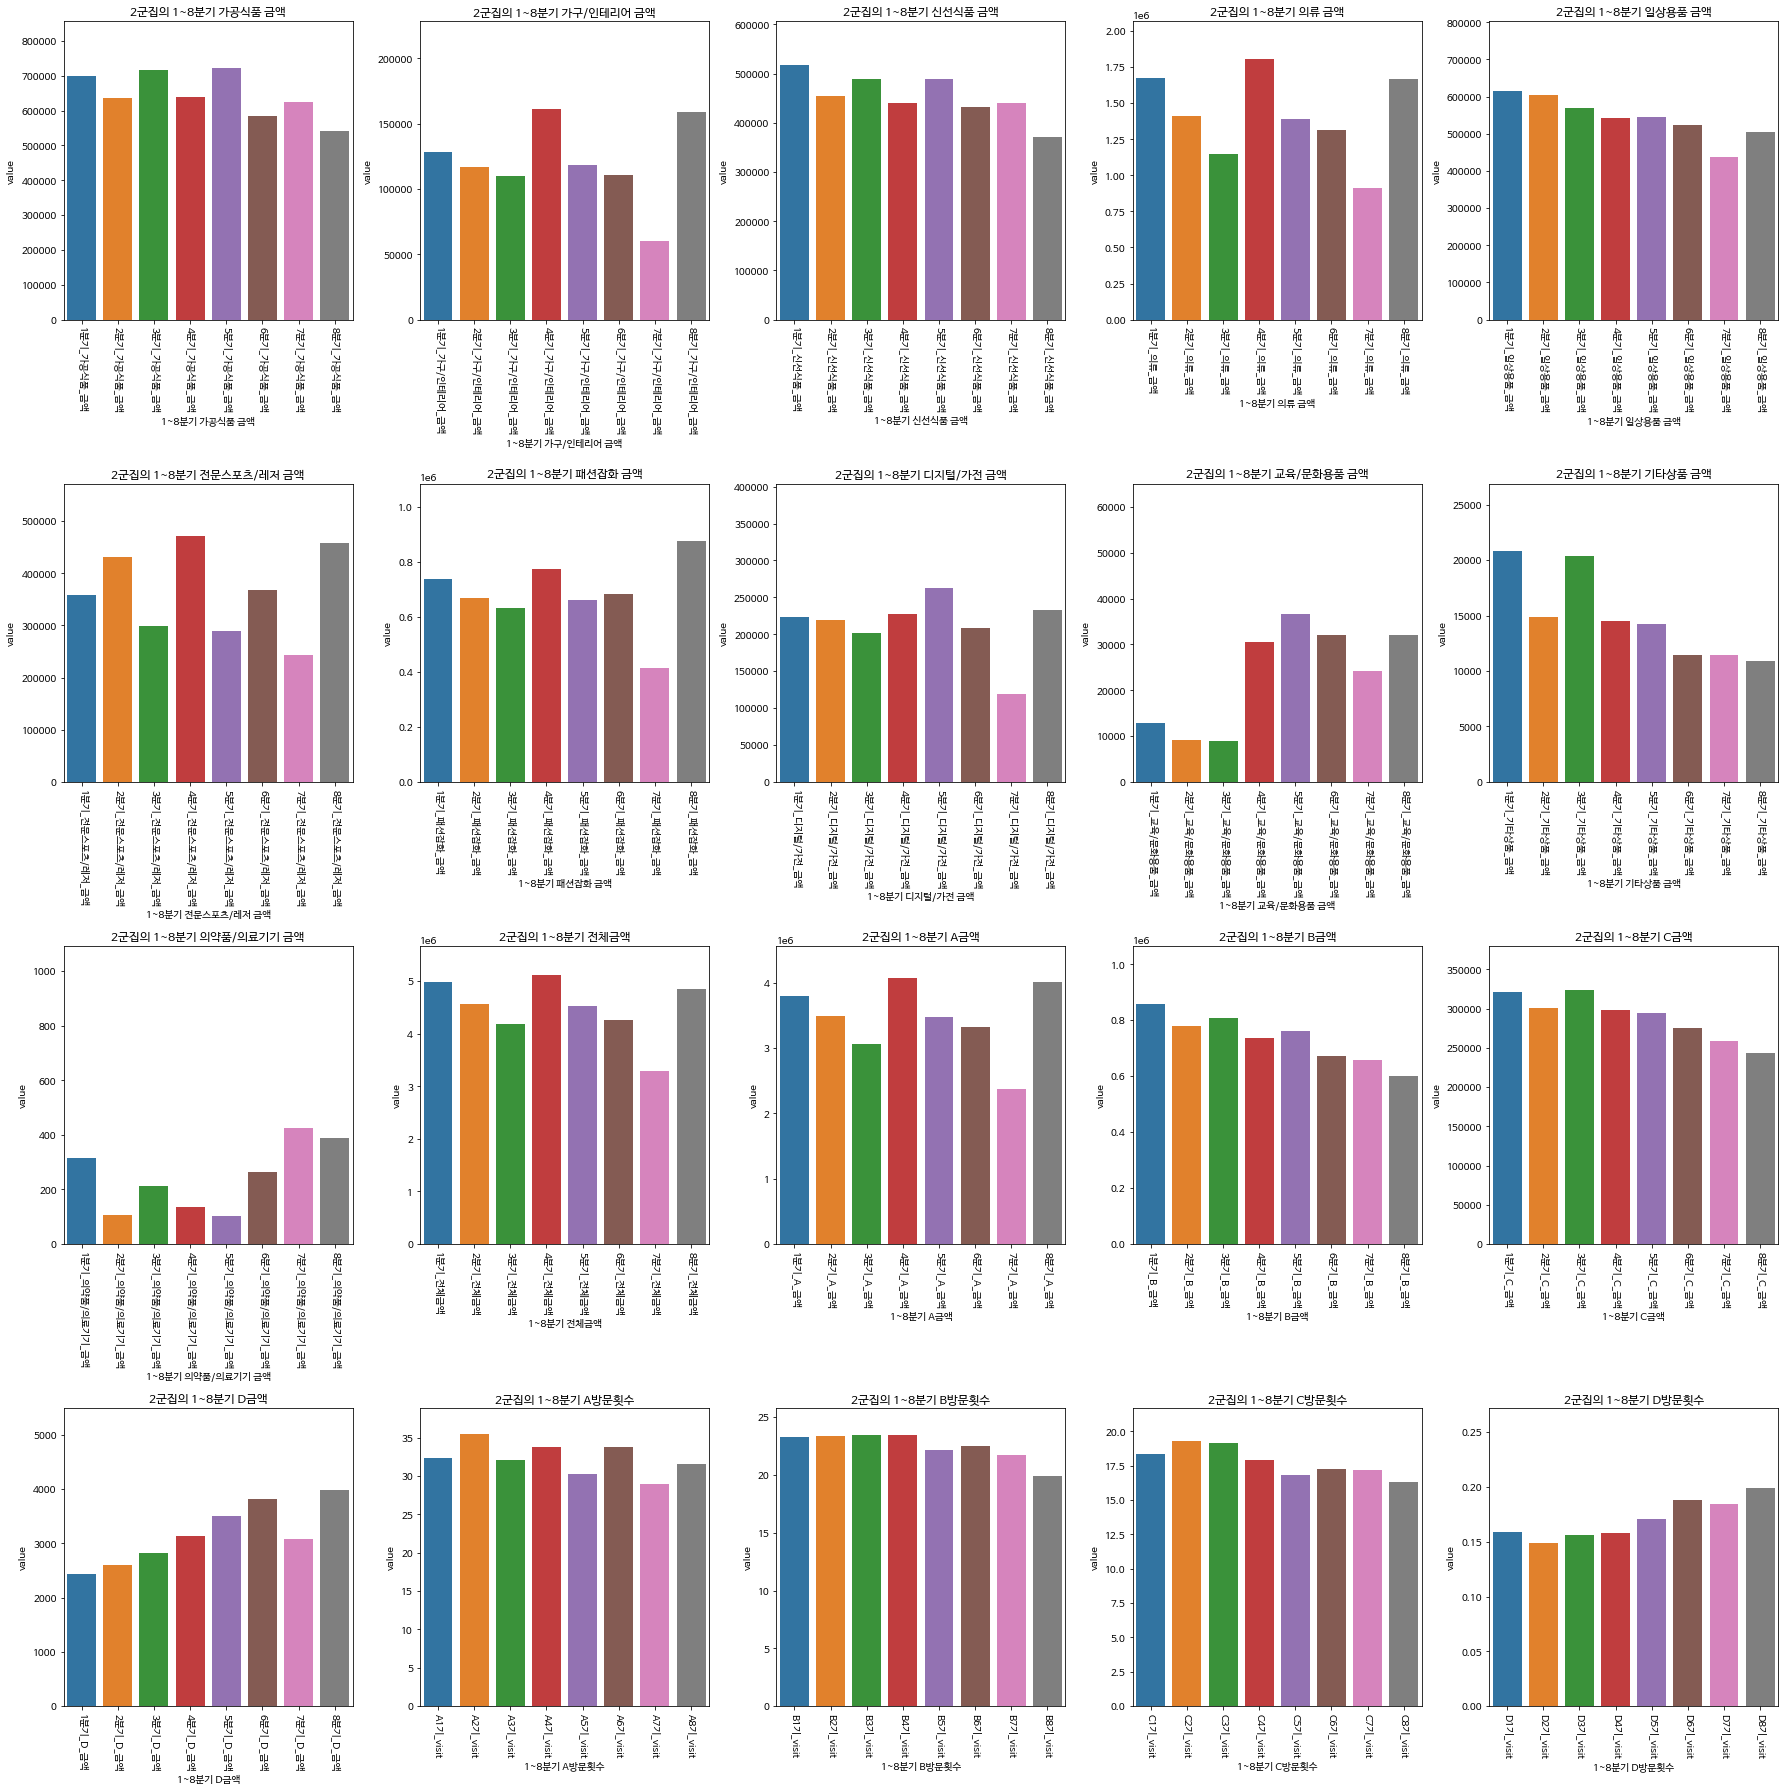

In [ ]:
col_lst = ['1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
'1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
'1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
'1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수']

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(25,25))

for i, col in enumerate(col_lst):
  plt.subplot(4, 5, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'2군집의 {col}')
  
  sns.barplot(data = pd.melt(frame=a2.iloc[:, (i*8)+1:(i*8)+9], var_name=f'{col}'), x=f'{col}', y='value', errwidth=0) 
  #plt.ylabel('count')
  
plt.savefig('2군집_칼럼별 특성 시각화.png')

### 3군집

In [ ]:
# 20개 칼럼
# '1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
# '1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
# '1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
# '1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수'

In [ ]:
a3 = a[a['1~7분기 성장률_군집번호'] == 3].reset_index().iloc[:, 1:]
a3[:1]

,1~7분기 성장률_군집번호,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,...,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,3,673470.0,443670.0,454960.0,445060.0,362310.0,510227.0,317100.0,592010.0,0.0,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.melt(frame=a3.iloc[:, 1:9], var_name='1~8분기별 가공식품 금액')
#pd.melt(frame=a1.iloc[:, 9:17], var_name='1~8분기별 가공식품 금액')

,1~8분기별 가공식품 금액,value
0,1분기_가공식품_금액,673470.0
1,1분기_가공식품_금액,923800.0
2,1분기_가공식품_금액,238170.0
3,1분기_가공식품_금액,516520.0
4,1분기_가공식품_금액,303800.0
...,...,...
20851,8분기_가공식품_금액,113590.0
20852,8분기_가공식품_금액,866980.0
20853,8분기_가공식품_금액,188600.0
20854,8분기_가공식품_금액,1197890.0


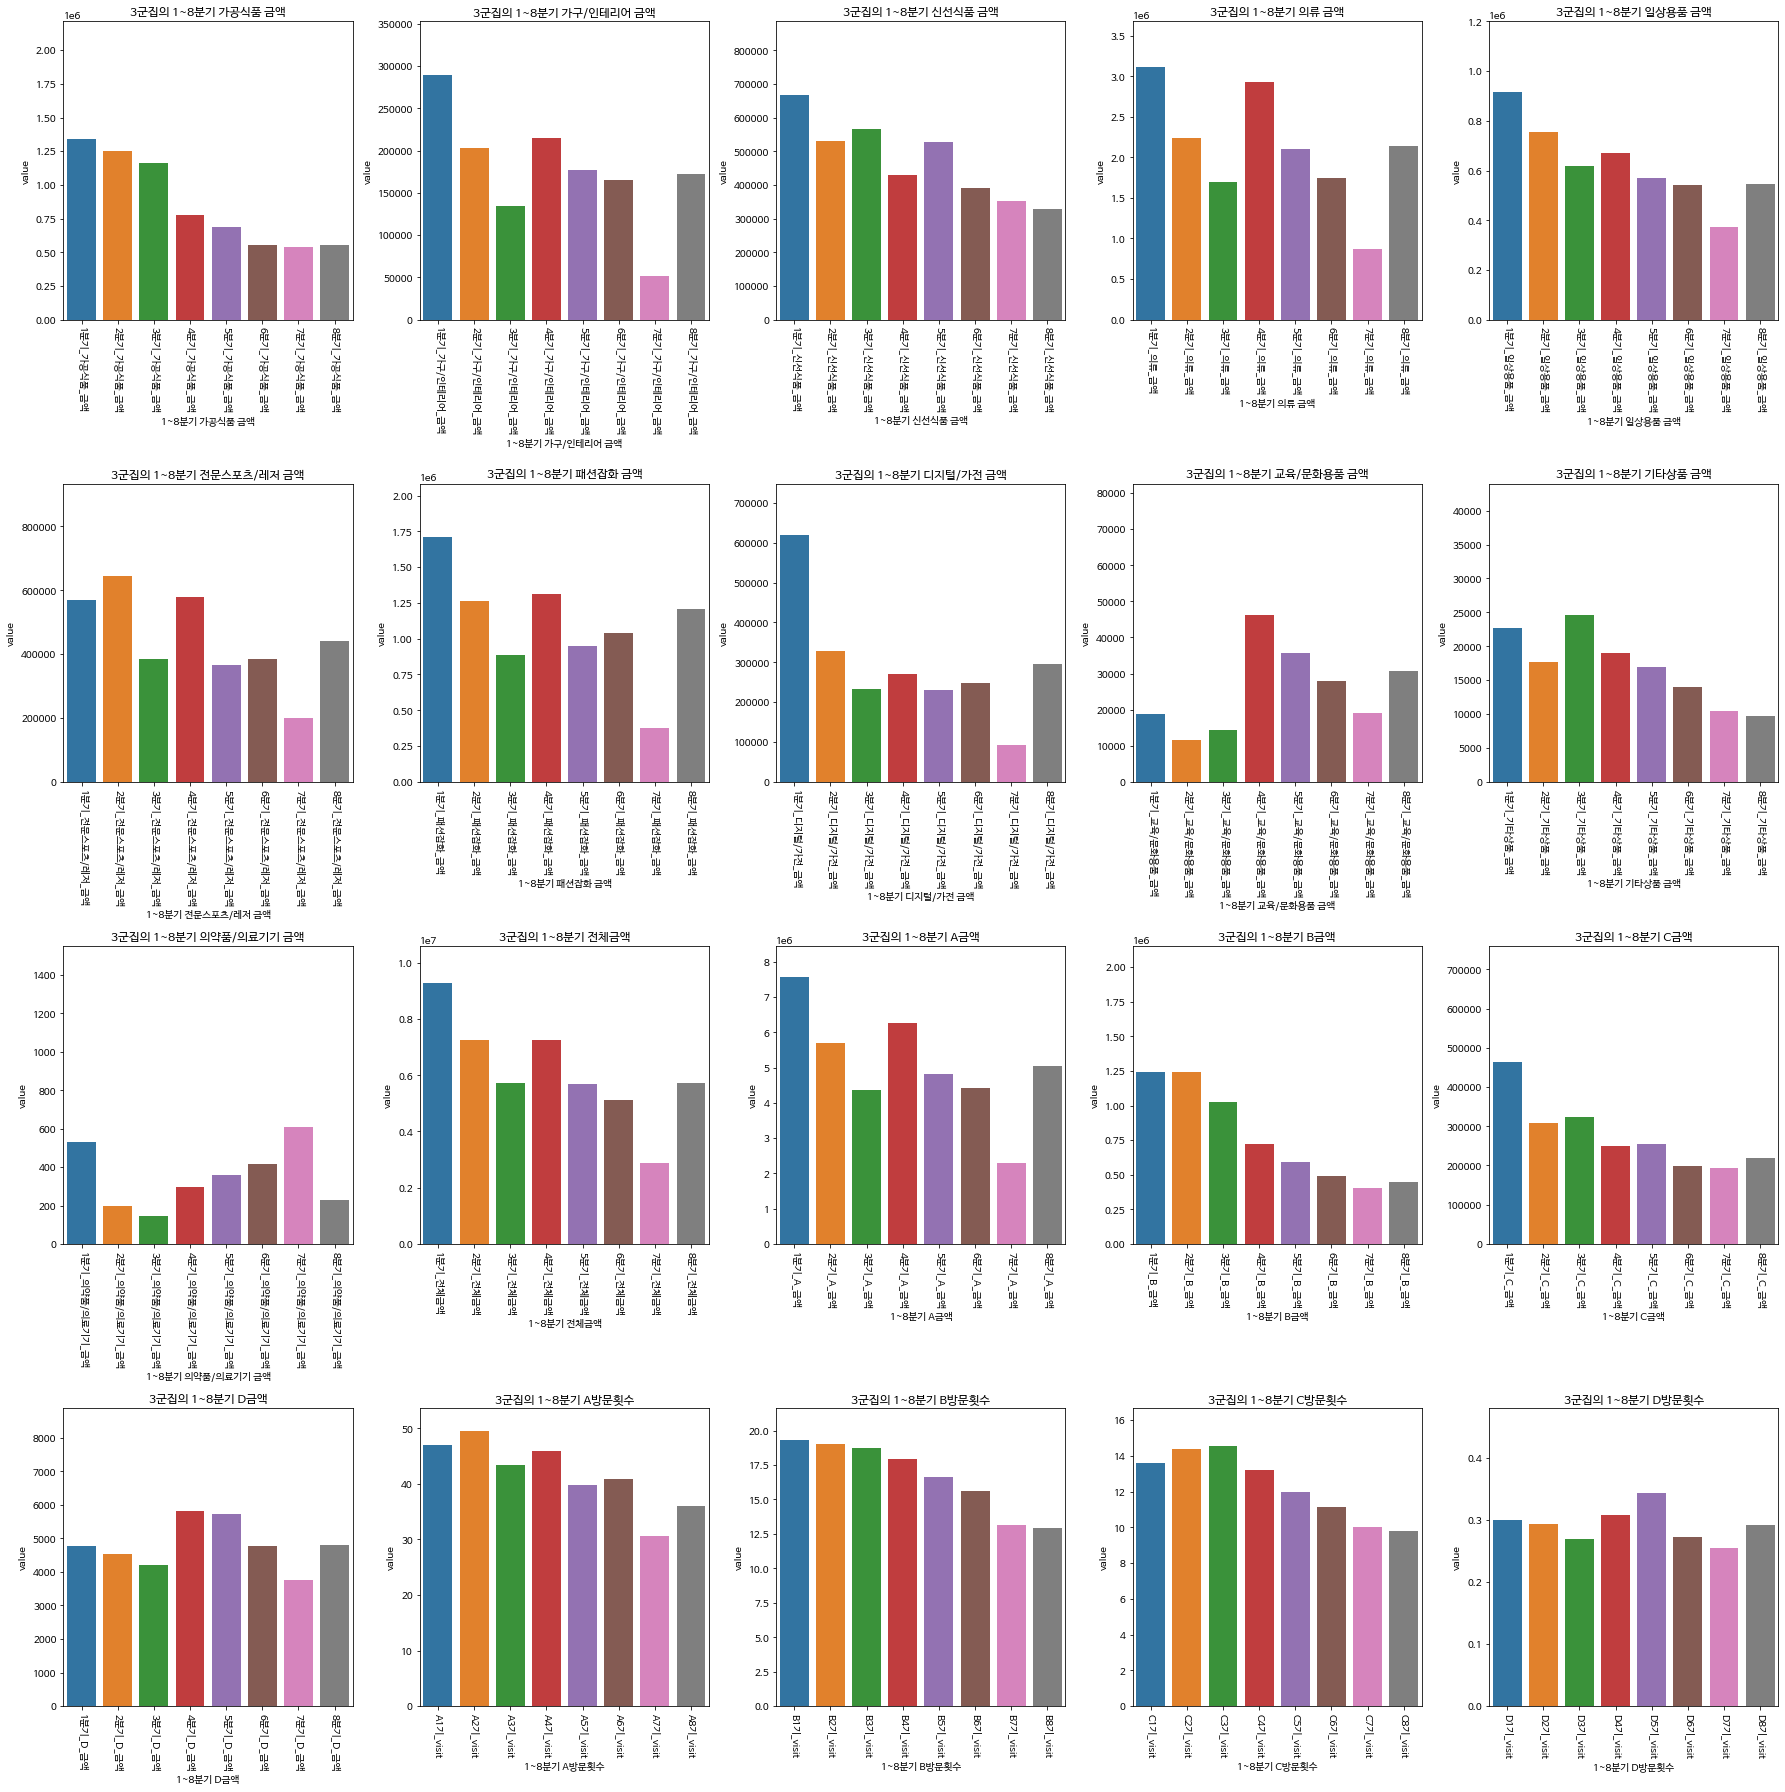

In [ ]:
col_lst = ['1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
'1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
'1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
'1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수']

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(25,25))

for i, col in enumerate(col_lst):
  plt.subplot(4, 5, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'3군집의 {col}')
  
  sns.barplot(data = pd.melt(frame=a3.iloc[:, (i*8)+1:(i*8)+9], var_name=f'{col}'), x=f'{col}', y='value', errwidth=0) 
  #plt.ylabel('count')
  
plt.savefig('3군집_칼럼별 특성 시각화.png')

### 4군집

In [ ]:
# 20개 칼럼
# '1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
# '1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
# '1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
# '1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수'

In [ ]:
a4 = a[a['1~7분기 성장률_군집번호'] == 4].reset_index().iloc[:, 1:]
a4[:1]

,1~7분기 성장률_군집번호,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,...,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,4,1294020.0,1049220.0,762800.0,325900.0,990800.0,710340.0,0.0,1528290.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0


In [ ]:
pd.melt(frame=a4.iloc[:, 1:9], var_name='1~8분기별 가공식품 금액')
#pd.melt(frame=a1.iloc[:, 9:17], var_name='1~8분기별 가공식품 금액')

,1~8분기별 가공식품 금액,value
0,1분기_가공식품_금액,1294020.0
1,1분기_가공식품_금액,74990.0
2,1분기_가공식품_금액,386100.0
3,1분기_가공식품_금액,22500.0
4,1분기_가공식품_금액,41716.0
...,...,...
387,8분기_가공식품_금액,0.0
388,8분기_가공식품_금액,0.0
389,8분기_가공식품_금액,0.0
390,8분기_가공식품_금액,0.0


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s

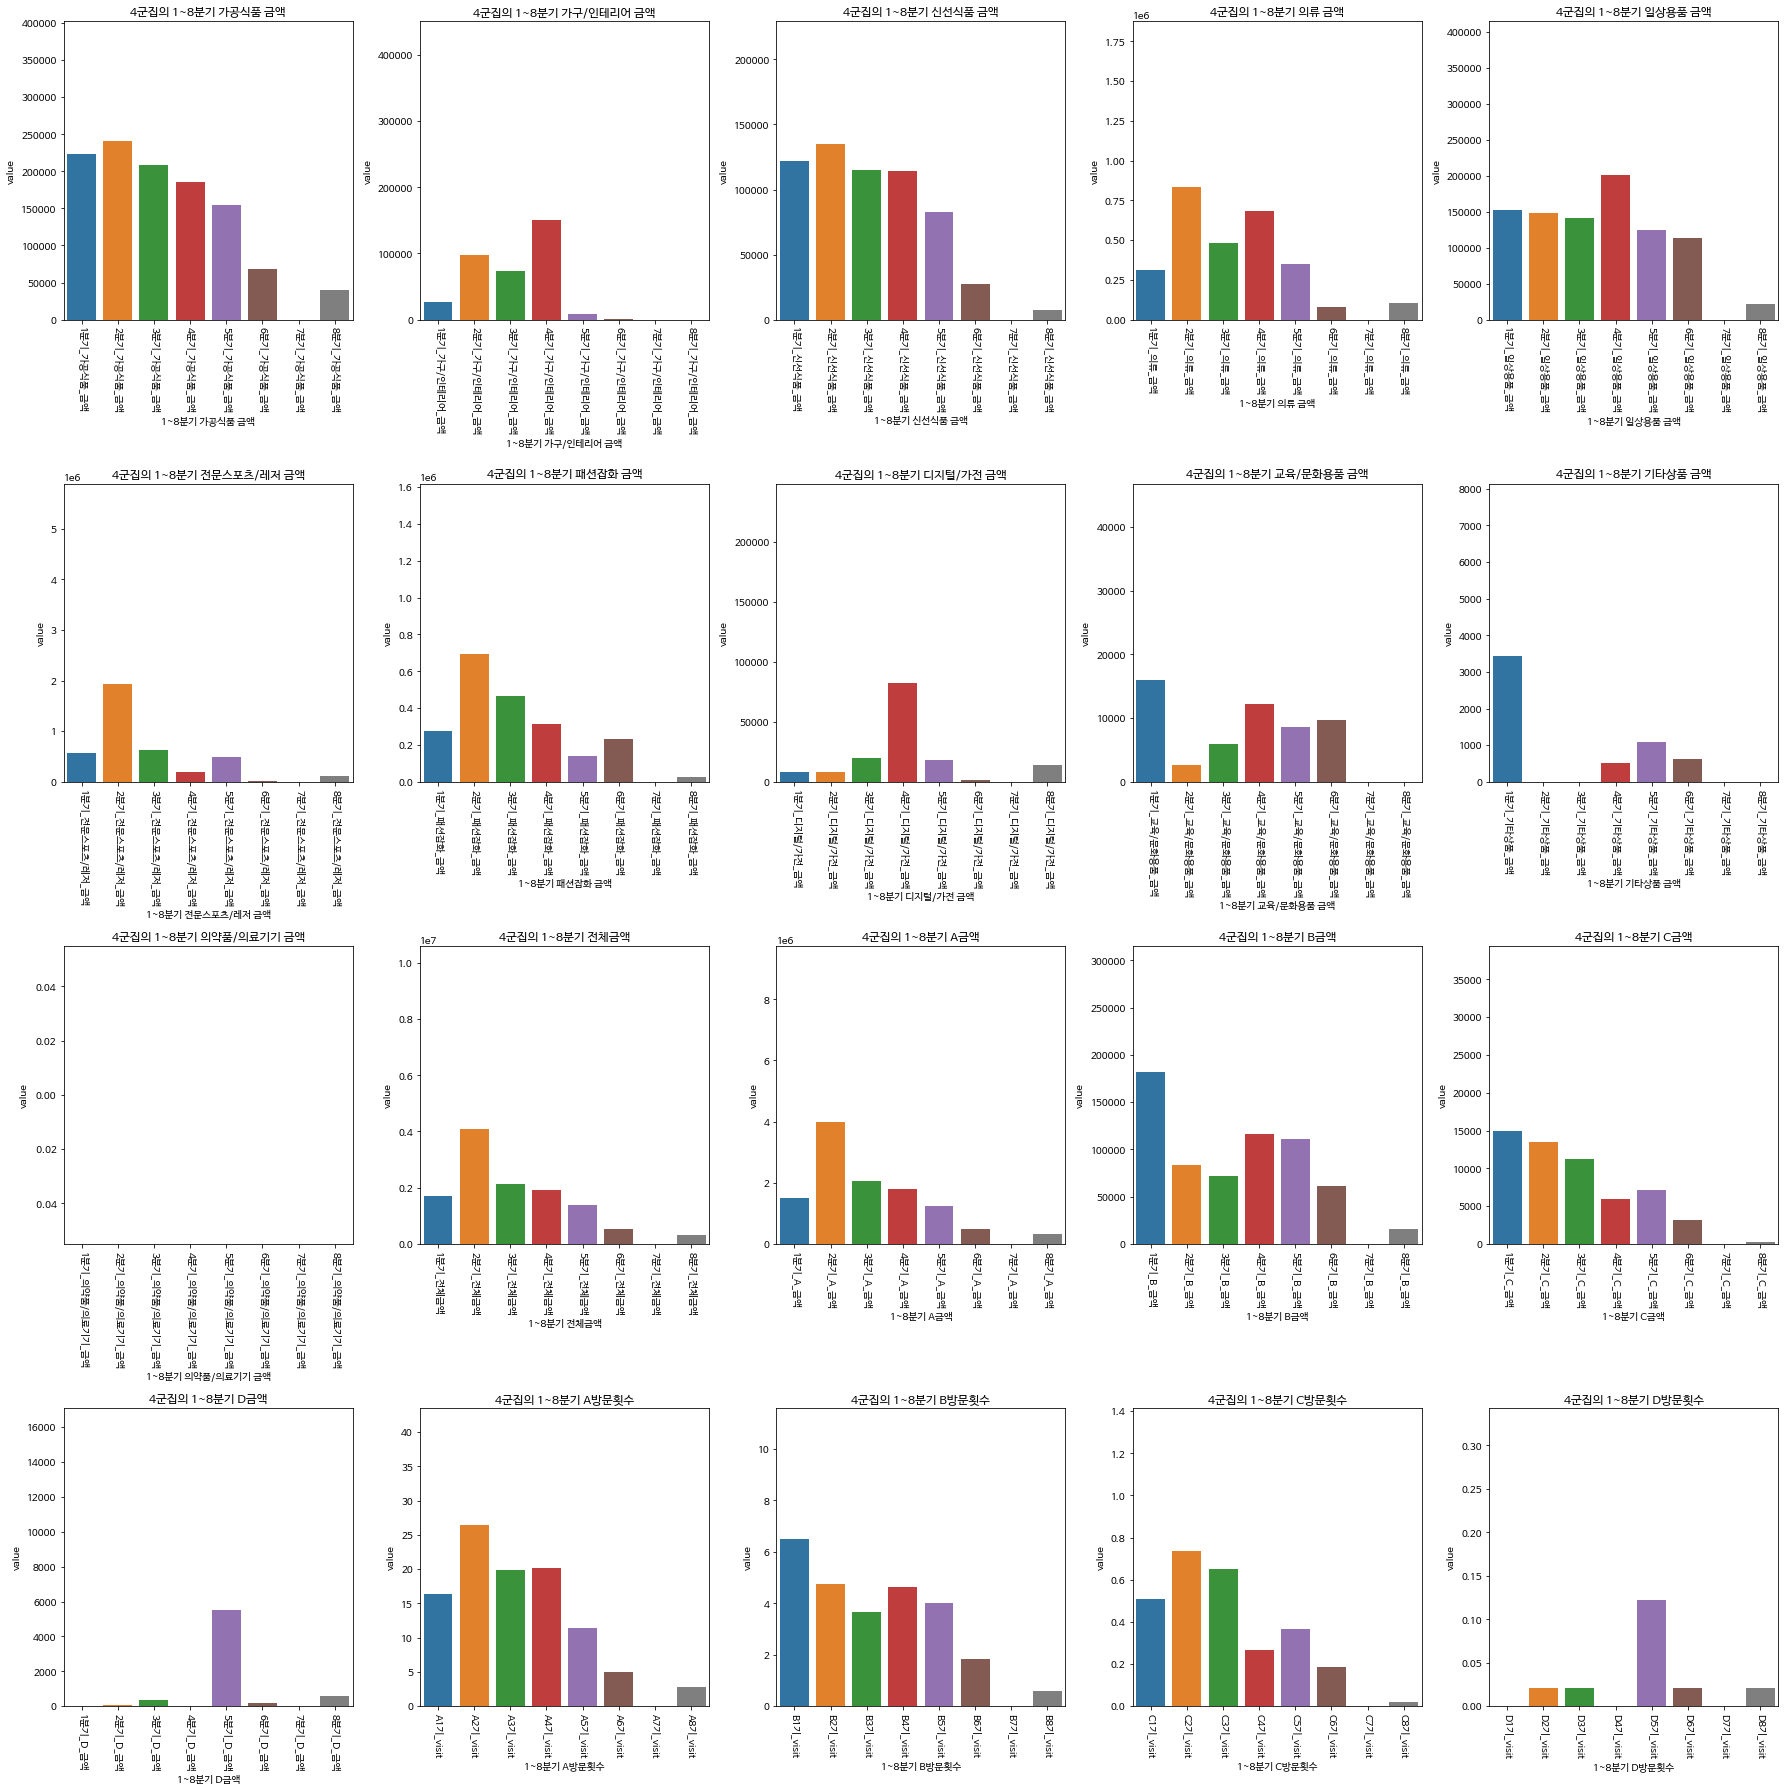

In [ ]:
col_lst = ['1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
'1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
'1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
'1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수']

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(25,25))

for i, col in enumerate(col_lst):
  plt.subplot(4, 5, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'4군집의 {col}')
  
  sns.barplot(data = pd.melt(frame=a4.iloc[:, (i*8)+1:(i*8)+9], var_name=f'{col}'), x=f'{col}', y='value', errwidth=0) 
  #plt.ylabel('count')
  
plt.savefig('4군집_칼럼별 특성 시각화.png')

## 상품카테고리별로 그룹화하여 특성 분석

In [ ]:
# '고객번호', '1~7분기 성장률', '1~7분기 성장률_군집번호', '성별', '연령대', '고객정보', '거주지역',
# '1~8분기 가공식품 금액', '1~8분기 가구/인테리어 금액', '1~8분기 신선식품 금액', '1~8분기 의류 금액', '1~8분기 일상용품 금액',
# '1~8분기 전문스포츠/레저 금액', '1~8분기 패션잡화 금액', '1~8분기 디지털/가전 금액', '1~8분기 교육/문화용품 금액', '1~8분기 기타상품 금액',
# '1~8분기 의약품/의료기기 금액', '1~8분기 전체금액', '1~8분기 A금액', '1~8분기 B금액', '1~8분기 C금액', '1~8분기 D금액', 
# '1~8분기 A방문횟수', '1~8분기 B방문횟수', '1~8분기 C방문횟수', '1~8분기 D방문횟수'
total_8846_df.columns.tolist()

In [ ]:
pd.set_option('display.max_columns', None)
a = total_8846_df.drop(columns=['고객번호', '1~7분기 성장률', '성별', '연령대', '고객정보', '거주지역'])
a[:1]

,1~7분기 성장률_군집번호,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,2분기_가구/인테리어_금액,3분기_가구/인테리어_금액,4분기_가구/인테리어_금액,5분기_가구/인테리어_금액,6분기_가구/인테리어_금액,7분기_가구/인테리어_금액,8분기_가구/인테리어_금액,1분기_신선식품_금액,2분기_신선식품_금액,3분기_신선식품_금액,4분기_신선식품_금액,5분기_신선식품_금액,6분기_신선식품_금액,7분기_신선식품_금액,8분기_신선식품_금액,1분기_의류_금액,2분기_의류_금액,3분기_의류_금액,4분기_의류_금액,5분기_의류_금액,6분기_의류_금액,7분기_의류_금액,8분기_의류_금액,1분기_일상용품_금액,2분기_일상용품_금액,3분기_일상용품_금액,4분기_일상용품_금액,5분기_일상용품_금액,6분기_일상용품_금액,7분기_일상용품_금액,8분기_일상용품_금액,1분기_전문스포츠/레저_금액,2분기_전문스포츠/레저_금액,3분기_전문스포츠/레저_금액,4분기_전문스포츠/레저_금액,5분기_전문스포츠/레저_금액,6분기_전문스포츠/레저_금액,7분기_전문스포츠/레저_금액,8분기_전문스포츠/레저_금액,1분기_패션잡화_금액,2분기_패션잡화_금액,3분기_패션잡화_금액,4분기_패션잡화_금액,5분기_패션잡화_금액,6분기_패션잡화_금액,7분기_패션잡화_금액,8분기_패션잡화_금액,1분기_디지털/가전_금액,2분기_디지털/가전_금액,3분기_디지털/가전_금액,4분기_디지털/가전_금액,5분기_디지털/가전_금액,6분기_디지털/가전_금액,7분기_디지털/가전_금액,8분기_디지털/가전_금액,1분기_교육/문화용품_금액,2분기_교육/문화용품_금액,3분기_교육/문화용품_금액,4분기_교육/문화용품_금액,5분기_교육/문화용품_금액,6분기_교육/문화용품_금액,7분기_교육/문화용품_금액,8분기_교육/문화용품_금액,1분기_기타상품_금액,2분기_기타상품_금액,3분기_기타상품_금액,4분기_기타상품_금액,5분기_기타상품_금액,6분기_기타상품_금액,7분기_기타상품_금액,8분기_기타상품_금액,1분기_의약품/의료기기_금액,2분기_의약품/의료기기_금액,3분기_의약품/의료기기_금액,4분기_의약품/의료기기_금액,5분기_의약품/의료기기_금액,6분기_의약품/의료기기_금액,7분기_의약품/의료기기_금액,8분기_의약품/의료기기_금액,1분기_전체금액,2분기_전체금액,3분기_전체금액,4분기_전체금액,5분기_전체금액,6분기_전체금액,7분기_전체금액,8분기_전체금액,1분기_A_금액,2분기_A_금액,3분기_A_금액,4분기_A_금액,5분기_A_금액,6분기_A_금액,7분기_A_금액,8분기_A_금액,1분기_B_금액,2분기_B_금액,3분기_B_금액,4분기_B_금액,5분기_B_금액,6분기_B_금액,7분기_B_금액,8분기_B_금액,1분기_C_금액,2분기_C_금액,3분기_C_금액,4분기_C_금액,5분기_C_금액,6분기_C_금액,7분기_C_금액,8분기_C_금액,1분기_D_금액,2분기_D_금액,3분기_D_금액,4분기_D_금액,5분기_D_금액,6분기_D_금액,7분기_D_금액,8분기_D_금액,A1기_visit,A2기_visit,A3기_visit,A4기_visit,A5기_visit,A6기_visit,A7기_visit,A8기_visit,B1기_visit,B2기_visit,B3기_visit,B4기_visit,B5기_visit,B6기_visit,B7기_visit,B8기_visit,C1기_visit,C2기_visit,C3기_visit,C4기_visit,C5기_visit,C6기_visit,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,0.0,63840.0,4706400.0,85500.0,491750.0,0.0,137750.0,422590.0,721735.0,274550.0,1027142.0,671145.0,544710.0,129000.0,237838.0,4464210.0,4445160.0,5754150.0,5051050.0,4541040.0,6353090.0,4256810.0,3493160.0,1644620.0,564650.0,3390310.0,1325290.0,875710.0,248150.0,0.0,782560.0,706800.0,1436400.0,0.0,0.0,509730.0,90250.0,234650.0,150000.0,361490.0,1355370.0,380550.0,1254030.0,1252160.0,258200.0,886050.0,158000.0,0.0,0.0,9900.0,9052200.0,291000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,9119790.0,10583420.0,10722160.0,22618140.0,9007070.0,8375680.0,7692890.0,5108000.0,21800.0,0.0,4700.0,371440.0,189636.0,18500.0,111500.0,73400.0,0.0,200345.0,54690.0,345182.0,106279.0,201200.0,2190.0,114538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,78.0,95.0,111.0,105.0,68.0,61.0,43.0,1.0,0.0,1.0,3.0,3.0,1.0,6.0,4.0,0.0,4.0,4.0,5.0,3.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 군집별 1~8분기 가공식품 금액
pd.melt(frame=a.iloc[:, :9], id_vars='1~7분기 성장률_군집번호', var_name='1~8분기별 가공식품 금액')

,1~7분기 성장률_군집번호,1~8분기별 가공식품 금액,value
0,1,1분기_가공식품_금액,1364230.0
1,1,1분기_가공식품_금액,995980.0
2,4,1분기_가공식품_금액,1294020.0
3,3,1분기_가공식품_금액,673470.0
4,1,1분기_가공식품_금액,604510.0
...,...,...,...
70763,0,8분기_가공식품_금액,579360.0
70764,2,8분기_가공식품_금액,113900.0
70765,2,8분기_가공식품_금액,76350.0
70766,3,8분기_가공식품_금액,319730.0


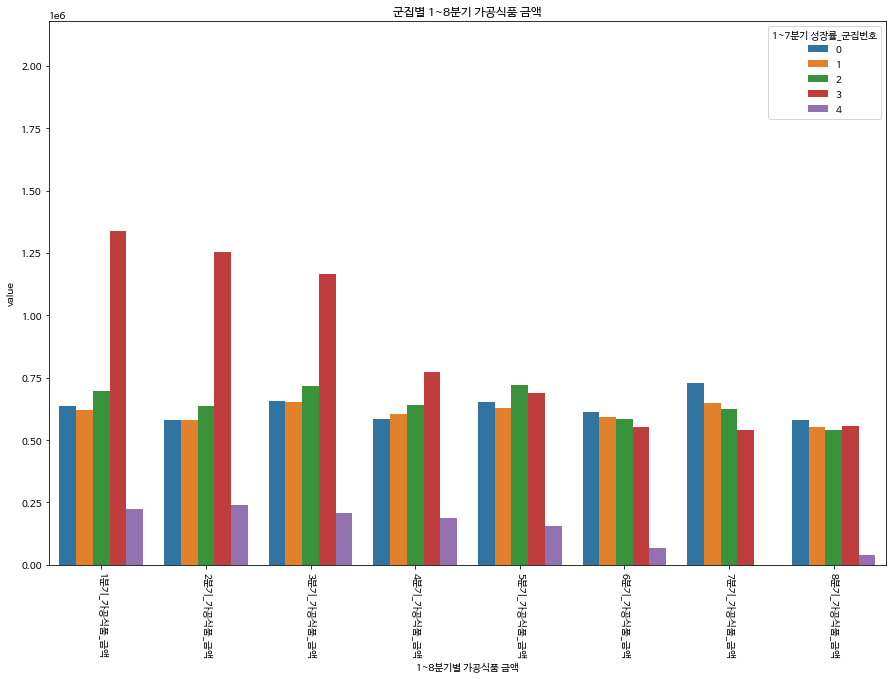

In [ ]:
# 군집별 1~8분기 가공식품 금액
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(15,10))
plt.xticks(rotation=-90)
plt.title('군집별 1~8분기 가공식품 금액')

sns.barplot(data=pd.melt(frame=a.iloc[:, :9], id_vars='1~7분기 성장률_군집번호', var_name='1~8분기별 가공식품 금액'),
            x='1~8분기별 가공식품 금액', y='value', hue='1~7분기 성장률_군집번호', errwidth=0)

In [ ]:
a[:1]

,1~7분기 성장률_군집번호,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,2분기_가구/인테리어_금액,3분기_가구/인테리어_금액,4분기_가구/인테리어_금액,5분기_가구/인테리어_금액,6분기_가구/인테리어_금액,7분기_가구/인테리어_금액,8분기_가구/인테리어_금액,1분기_신선식품_금액,2분기_신선식품_금액,3분기_신선식품_금액,4분기_신선식품_금액,5분기_신선식품_금액,6분기_신선식품_금액,7분기_신선식품_금액,8분기_신선식품_금액,1분기_의류_금액,2분기_의류_금액,3분기_의류_금액,4분기_의류_금액,5분기_의류_금액,6분기_의류_금액,7분기_의류_금액,8분기_의류_금액,1분기_일상용품_금액,2분기_일상용품_금액,3분기_일상용품_금액,4분기_일상용품_금액,5분기_일상용품_금액,6분기_일상용품_금액,7분기_일상용품_금액,8분기_일상용품_금액,1분기_전문스포츠/레저_금액,2분기_전문스포츠/레저_금액,3분기_전문스포츠/레저_금액,4분기_전문스포츠/레저_금액,5분기_전문스포츠/레저_금액,6분기_전문스포츠/레저_금액,7분기_전문스포츠/레저_금액,8분기_전문스포츠/레저_금액,1분기_패션잡화_금액,2분기_패션잡화_금액,3분기_패션잡화_금액,4분기_패션잡화_금액,5분기_패션잡화_금액,6분기_패션잡화_금액,7분기_패션잡화_금액,8분기_패션잡화_금액,1분기_디지털/가전_금액,2분기_디지털/가전_금액,3분기_디지털/가전_금액,4분기_디지털/가전_금액,5분기_디지털/가전_금액,6분기_디지털/가전_금액,7분기_디지털/가전_금액,8분기_디지털/가전_금액,1분기_교육/문화용품_금액,2분기_교육/문화용품_금액,3분기_교육/문화용품_금액,4분기_교육/문화용품_금액,5분기_교육/문화용품_금액,6분기_교육/문화용품_금액,7분기_교육/문화용품_금액,8분기_교육/문화용품_금액,1분기_기타상품_금액,2분기_기타상품_금액,3분기_기타상품_금액,4분기_기타상품_금액,5분기_기타상품_금액,6분기_기타상품_금액,7분기_기타상품_금액,8분기_기타상품_금액,1분기_의약품/의료기기_금액,2분기_의약품/의료기기_금액,3분기_의약품/의료기기_금액,4분기_의약품/의료기기_금액,5분기_의약품/의료기기_금액,6분기_의약품/의료기기_금액,7분기_의약품/의료기기_금액,8분기_의약품/의료기기_금액,1분기_전체금액,2분기_전체금액,3분기_전체금액,4분기_전체금액,5분기_전체금액,6분기_전체금액,7분기_전체금액,8분기_전체금액,1분기_A_금액,2분기_A_금액,3분기_A_금액,4분기_A_금액,5분기_A_금액,6분기_A_금액,7분기_A_금액,8분기_A_금액,1분기_B_금액,2분기_B_금액,3분기_B_금액,4분기_B_금액,5분기_B_금액,6분기_B_금액,7분기_B_금액,8분기_B_금액,1분기_C_금액,2분기_C_금액,3분기_C_금액,4분기_C_금액,5분기_C_금액,6분기_C_금액,7분기_C_금액,8분기_C_금액,1분기_D_금액,2분기_D_금액,3분기_D_금액,4분기_D_금액,5분기_D_금액,6분기_D_금액,7분기_D_금액,8분기_D_금액,A1기_visit,A2기_visit,A3기_visit,A4기_visit,A5기_visit,A6기_visit,A7기_visit,A8기_visit,B1기_visit,B2기_visit,B3기_visit,B4기_visit,B5기_visit,B6기_visit,B7기_visit,B8기_visit,C1기_visit,C2기_visit,C3기_visit,C4기_visit,C5기_visit,C6기_visit,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,0.0,63840.0,4706400.0,85500.0,491750.0,0.0,137750.0,422590.0,721735.0,274550.0,1027142.0,671145.0,544710.0,129000.0,237838.0,4464210.0,4445160.0,5754150.0,5051050.0,4541040.0,6353090.0,4256810.0,3493160.0,1644620.0,564650.0,3390310.0,1325290.0,875710.0,248150.0,0.0,782560.0,706800.0,1436400.0,0.0,0.0,509730.0,90250.0,234650.0,150000.0,361490.0,1355370.0,380550.0,1254030.0,1252160.0,258200.0,886050.0,158000.0,0.0,0.0,9900.0,9052200.0,291000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,9119790.0,10583420.0,10722160.0,22618140.0,9007070.0,8375680.0,7692890.0,5108000.0,21800.0,0.0,4700.0,371440.0,189636.0,18500.0,111500.0,73400.0,0.0,200345.0,54690.0,345182.0,106279.0,201200.0,2190.0,114538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,78.0,95.0,111.0,105.0,68.0,61.0,43.0,1.0,0.0,1.0,3.0,3.0,1.0,6.0,4.0,0.0,4.0,4.0,5.0,3.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
가구인테리어 = a.loc[:, ['1~7분기 성장률_군집번호', '1분기_가구/인테리어_금액', '2분기_가구/인테리어_금액', '3분기_가구/인테리어_금액', '4분기_가구/인테리어_금액',
          '5분기_가구/인테리어_금액', '6분기_가구/인테리어_금액', '7분기_가구/인테리어_금액', '8분기_가구/인테리어_금액']]
가구인테리어

,1~7분기 성장률_군집번호,1분기_가구/인테리어_금액,2분기_가구/인테리어_금액,3분기_가구/인테리어_금액,4분기_가구/인테리어_금액,5분기_가구/인테리어_금액,6분기_가구/인테리어_금액,7분기_가구/인테리어_금액,8분기_가구/인테리어_금액
0,1,177650.0,0.0,63840.0,4706400.0,85500.0,491750.0,0.0,137750.0
1,1,474900.0,55800.0,0.0,39000.0,78120.0,0.0,290910.0,0.0
2,4,0.0,0.0,212300.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,106500.0,750000.0,15500.0,0.0,98000.0,64600.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,78000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8841,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8842,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8843,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8844,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 군집별 1~8분기 가구/인테리어 금액
pd.melt(frame=가구인테리어, id_vars='1~7분기 성장률_군집번호', var_name='1~8분기별 가구/인테리어 금액')

,1~7분기 성장률_군집번호,1~8분기별 가구/인테리어 금액,value
0,1,1분기_가구/인테리어_금액,177650.0
1,1,1분기_가구/인테리어_금액,474900.0
2,4,1분기_가구/인테리어_금액,0.0
3,3,1분기_가구/인테리어_금액,0.0
4,1,1분기_가구/인테리어_금액,0.0
...,...,...,...
70763,0,8분기_가구/인테리어_금액,0.0
70764,2,8분기_가구/인테리어_금액,0.0
70765,2,8분기_가구/인테리어_금액,0.0
70766,3,8분기_가구/인테리어_금액,0.0


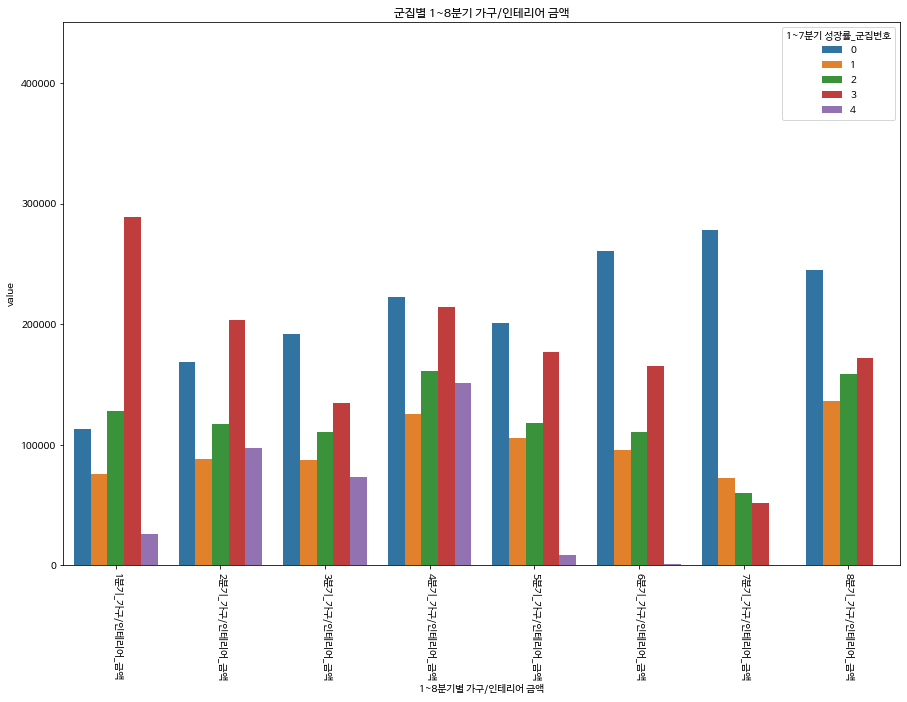

In [ ]:
# 군집별 1~8분기 가구/인테리어 금액
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(15,10))
plt.xticks(rotation=-90)
plt.title('군집별 1~8분기 가구/인테리어 금액')

sns.barplot(data=pd.melt(frame=가구인테리어, id_vars='1~7분기 성장률_군집번호', var_name='1~8분기별 가구/인테리어 금액'),
            x='1~8분기별 가구/인테리어 금액', y='value', hue='1~7분기 성장률_군집번호', errwidth=0)

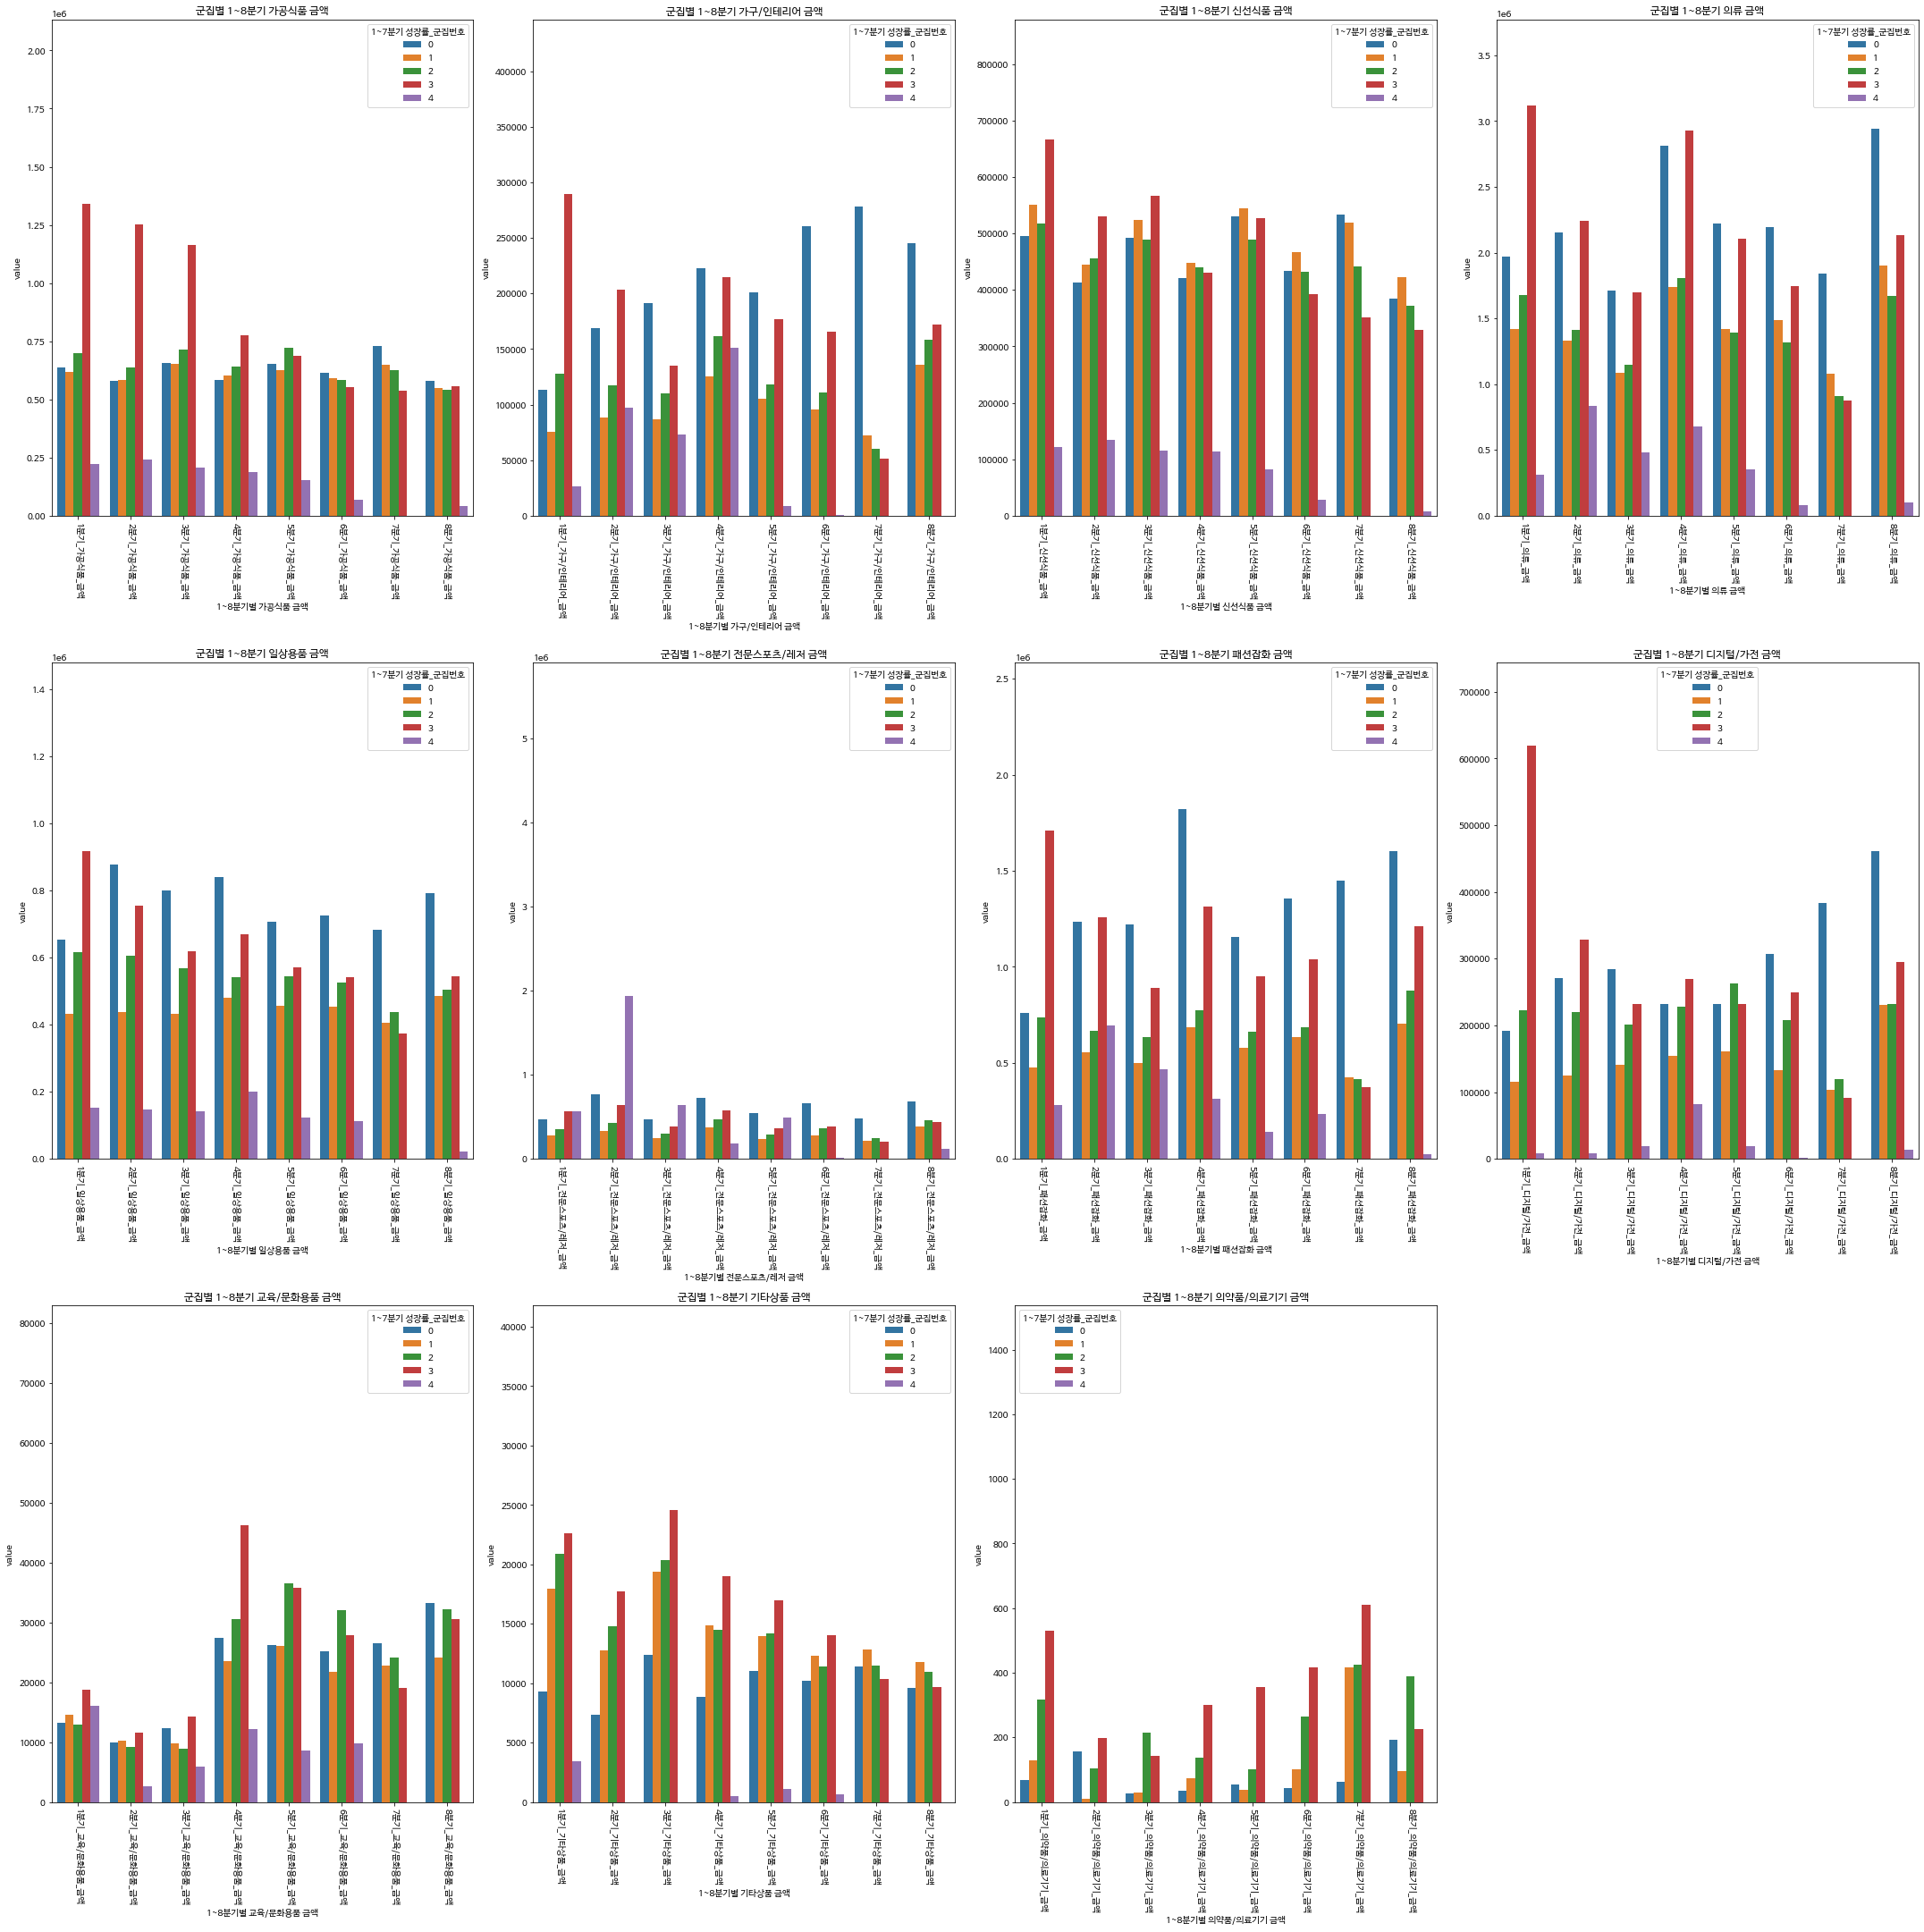

In [ ]:
prod_lst = ['가공식품', '가구/인테리어', '신선식품', '의류', '일상용품', '전문스포츠/레저', '패션잡화', '디지털/가전', '교육/문화용품', '기타상품', '의약품/의료기기']

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(30,30))

for i, prod in enumerate(prod_lst):
  plt.subplot(3, 4, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'군집별 1~8분기 {prod} 금액')

  df = a.loc[:, ['1~7분기 성장률_군집번호', f'1분기_{prod}_금액', f'2분기_{prod}_금액', f'3분기_{prod}_금액', f'4분기_{prod}_금액',
          f'5분기_{prod}_금액', f'6분기_{prod}_금액', f'7분기_{prod}_금액', f'8분기_{prod}_금액']]
  
  sns.barplot(data = pd.melt(frame=df, id_vars='1~7분기 성장률_군집번호', var_name=f'1~8분기별 {prod} 금액'),
              x=f'1~8분기별 {prod} 금액', y='value', hue='1~7분기 성장률_군집번호', errwidth=0)
  #plt.ylabel('count')
  
plt.savefig('군집별_상품카테고리별 특성 시각화.png')

## 구매금액별로 그룹화하여 특성 분석

In [ ]:
a[:1]

,1~7분기 성장률_군집번호,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,2분기_가구/인테리어_금액,3분기_가구/인테리어_금액,4분기_가구/인테리어_금액,5분기_가구/인테리어_금액,6분기_가구/인테리어_금액,7분기_가구/인테리어_금액,8분기_가구/인테리어_금액,1분기_신선식품_금액,2분기_신선식품_금액,3분기_신선식품_금액,4분기_신선식품_금액,5분기_신선식품_금액,6분기_신선식품_금액,7분기_신선식품_금액,8분기_신선식품_금액,1분기_의류_금액,2분기_의류_금액,3분기_의류_금액,4분기_의류_금액,5분기_의류_금액,6분기_의류_금액,7분기_의류_금액,8분기_의류_금액,1분기_일상용품_금액,2분기_일상용품_금액,3분기_일상용품_금액,4분기_일상용품_금액,5분기_일상용품_금액,6분기_일상용품_금액,7분기_일상용품_금액,8분기_일상용품_금액,1분기_전문스포츠/레저_금액,2분기_전문스포츠/레저_금액,3분기_전문스포츠/레저_금액,4분기_전문스포츠/레저_금액,5분기_전문스포츠/레저_금액,6분기_전문스포츠/레저_금액,7분기_전문스포츠/레저_금액,8분기_전문스포츠/레저_금액,1분기_패션잡화_금액,2분기_패션잡화_금액,3분기_패션잡화_금액,4분기_패션잡화_금액,5분기_패션잡화_금액,6분기_패션잡화_금액,7분기_패션잡화_금액,8분기_패션잡화_금액,1분기_디지털/가전_금액,2분기_디지털/가전_금액,3분기_디지털/가전_금액,4분기_디지털/가전_금액,5분기_디지털/가전_금액,6분기_디지털/가전_금액,7분기_디지털/가전_금액,8분기_디지털/가전_금액,1분기_교육/문화용품_금액,2분기_교육/문화용품_금액,3분기_교육/문화용품_금액,4분기_교육/문화용품_금액,5분기_교육/문화용품_금액,6분기_교육/문화용품_금액,7분기_교육/문화용품_금액,8분기_교육/문화용품_금액,1분기_기타상품_금액,2분기_기타상품_금액,3분기_기타상품_금액,4분기_기타상품_금액,5분기_기타상품_금액,6분기_기타상품_금액,7분기_기타상품_금액,8분기_기타상품_금액,1분기_의약품/의료기기_금액,2분기_의약품/의료기기_금액,3분기_의약품/의료기기_금액,4분기_의약품/의료기기_금액,5분기_의약품/의료기기_금액,6분기_의약품/의료기기_금액,7분기_의약품/의료기기_금액,8분기_의약품/의료기기_금액,1분기_전체금액,2분기_전체금액,3분기_전체금액,4분기_전체금액,5분기_전체금액,6분기_전체금액,7분기_전체금액,8분기_전체금액,1분기_A_금액,2분기_A_금액,3분기_A_금액,4분기_A_금액,5분기_A_금액,6분기_A_금액,7분기_A_금액,8분기_A_금액,1분기_B_금액,2분기_B_금액,3분기_B_금액,4분기_B_금액,5분기_B_금액,6분기_B_금액,7분기_B_금액,8분기_B_금액,1분기_C_금액,2분기_C_금액,3분기_C_금액,4분기_C_금액,5분기_C_금액,6분기_C_금액,7분기_C_금액,8분기_C_금액,1분기_D_금액,2분기_D_금액,3분기_D_금액,4분기_D_금액,5분기_D_금액,6분기_D_금액,7분기_D_금액,8분기_D_금액,A1기_visit,A2기_visit,A3기_visit,A4기_visit,A5기_visit,A6기_visit,A7기_visit,A8기_visit,B1기_visit,B2기_visit,B3기_visit,B4기_visit,B5기_visit,B6기_visit,B7기_visit,B8기_visit,C1기_visit,C2기_visit,C3기_visit,C4기_visit,C5기_visit,C6기_visit,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,0.0,63840.0,4706400.0,85500.0,491750.0,0.0,137750.0,422590.0,721735.0,274550.0,1027142.0,671145.0,544710.0,129000.0,237838.0,4464210.0,4445160.0,5754150.0,5051050.0,4541040.0,6353090.0,4256810.0,3493160.0,1644620.0,564650.0,3390310.0,1325290.0,875710.0,248150.0,0.0,782560.0,706800.0,1436400.0,0.0,0.0,509730.0,90250.0,234650.0,150000.0,361490.0,1355370.0,380550.0,1254030.0,1252160.0,258200.0,886050.0,158000.0,0.0,0.0,9900.0,9052200.0,291000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,9119790.0,10583420.0,10722160.0,22618140.0,9007070.0,8375680.0,7692890.0,5108000.0,21800.0,0.0,4700.0,371440.0,189636.0,18500.0,111500.0,73400.0,0.0,200345.0,54690.0,345182.0,106279.0,201200.0,2190.0,114538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,78.0,95.0,111.0,105.0,68.0,61.0,43.0,1.0,0.0,1.0,3.0,3.0,1.0,6.0,4.0,0.0,4.0,4.0,5.0,3.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


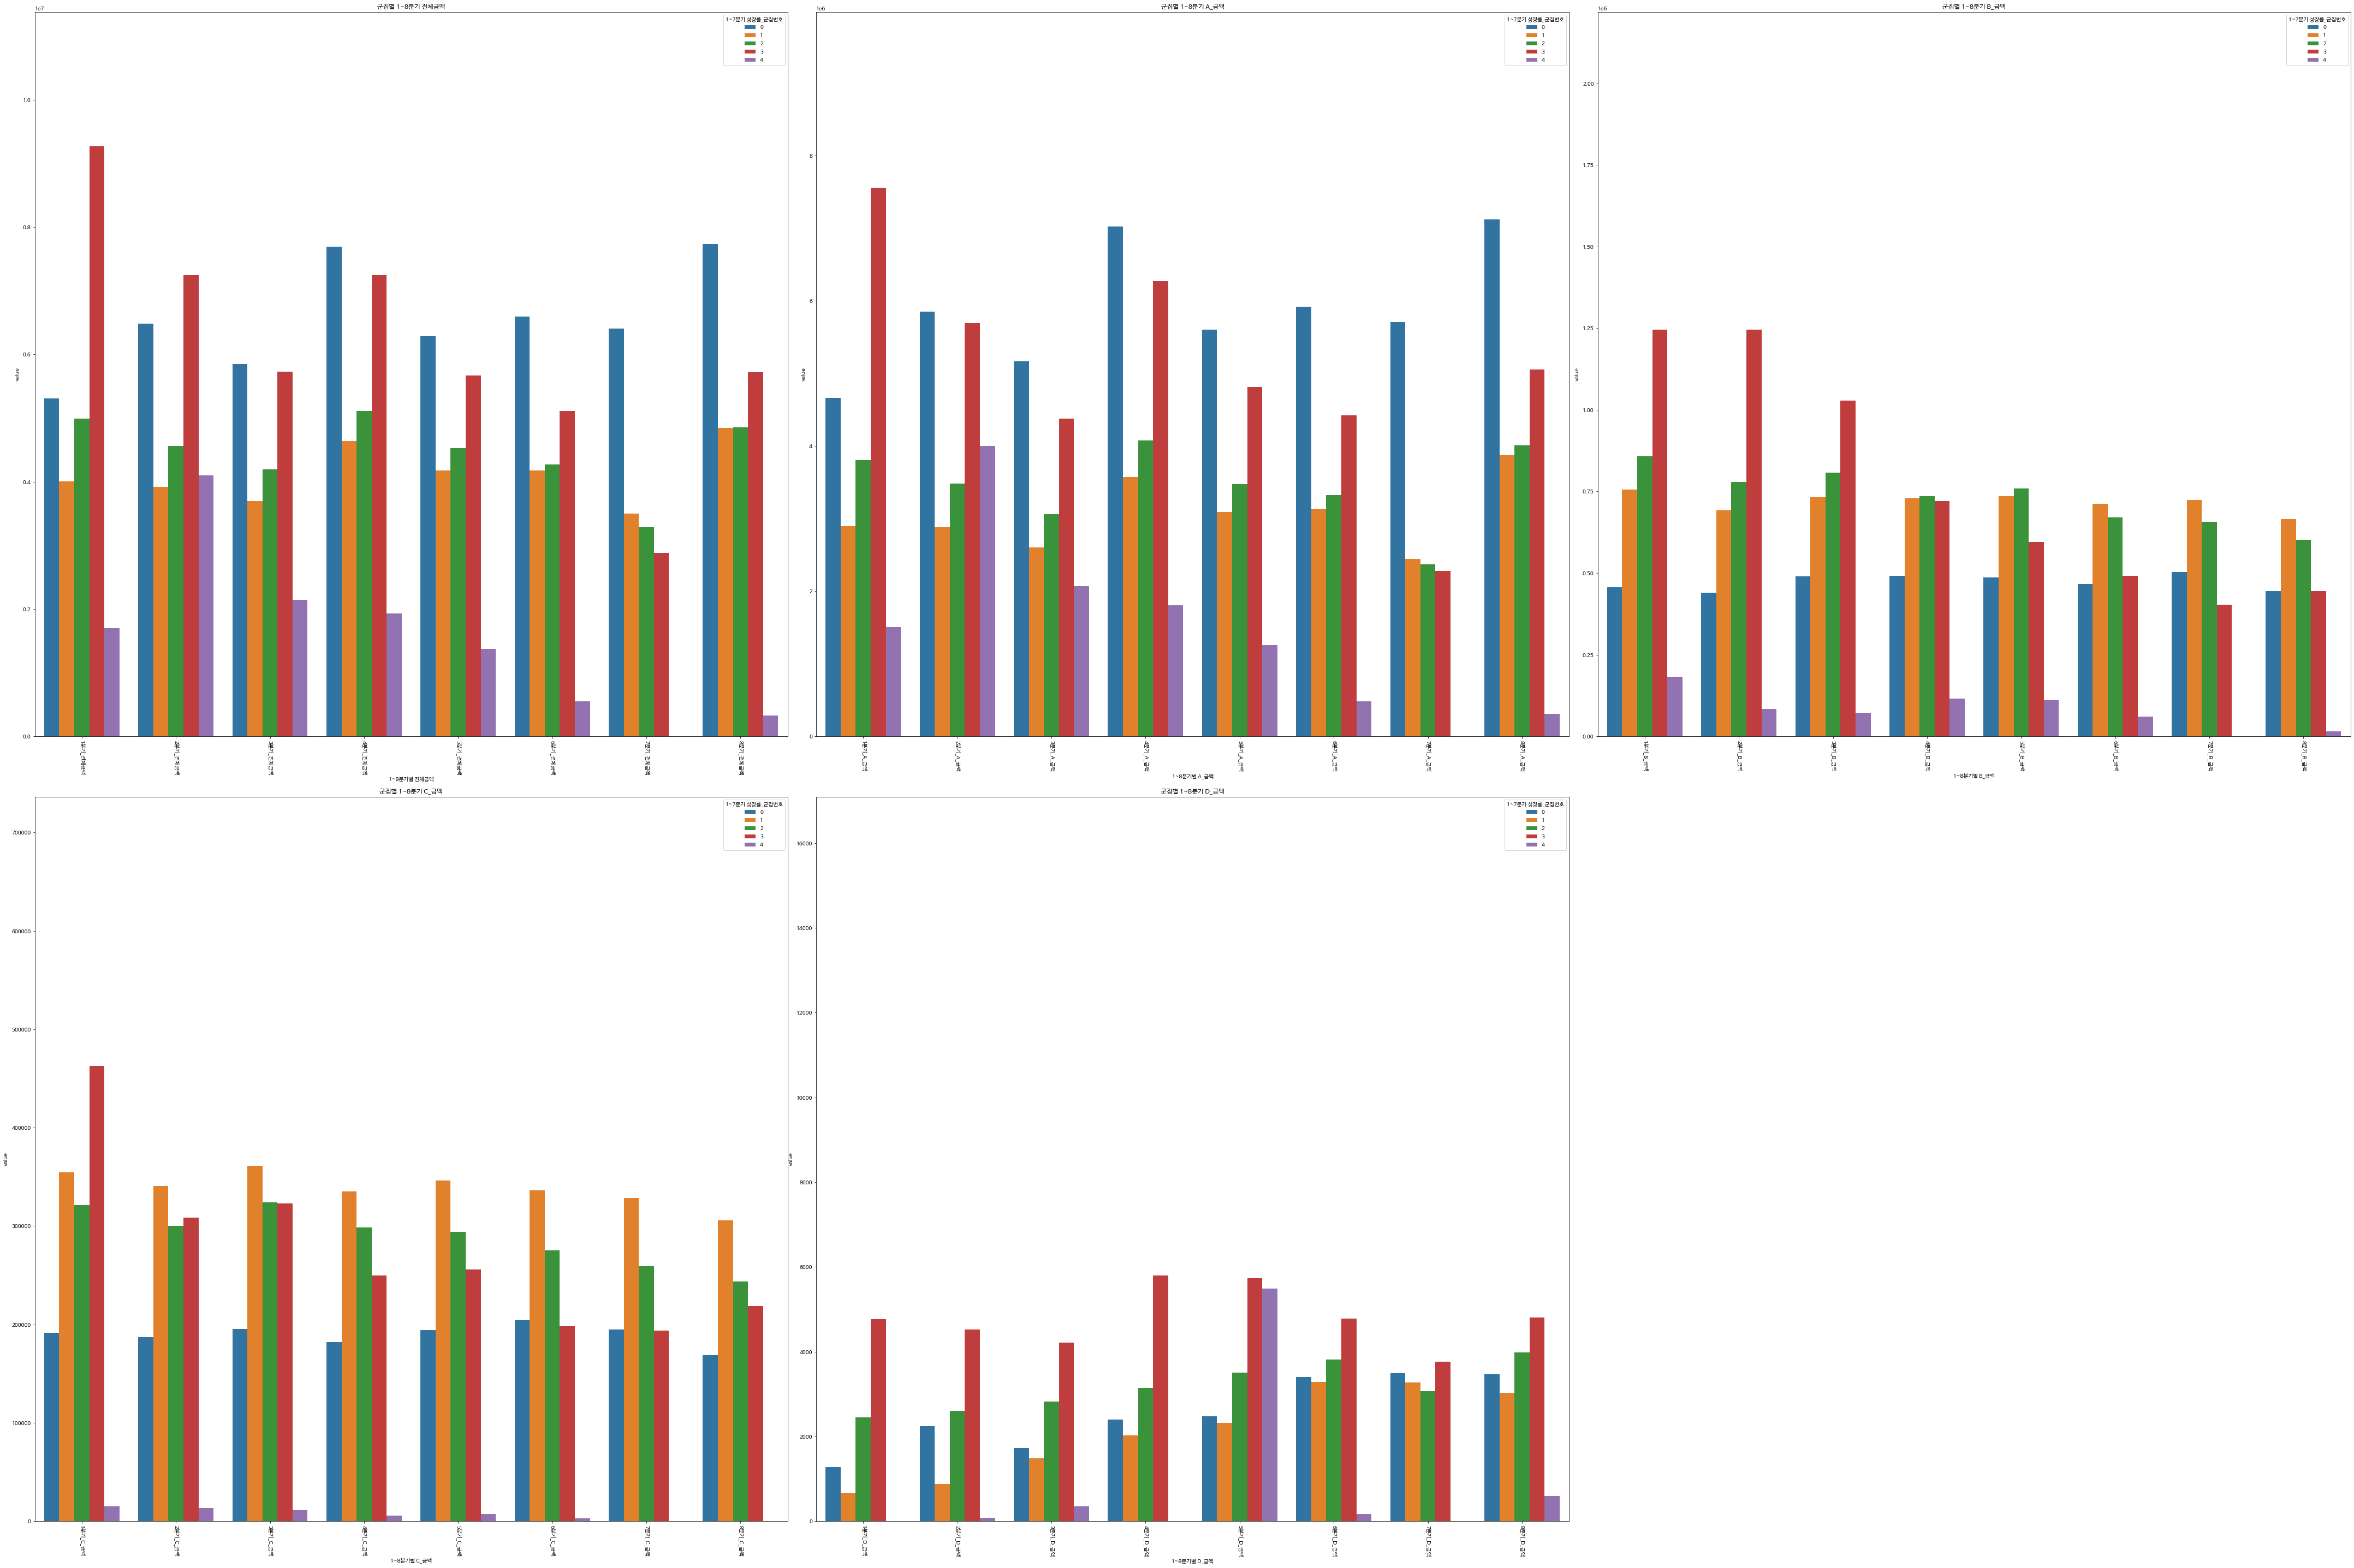

In [7]:
col_lst = ['전체금액', 'A_금액', 'B_금액', 'C_금액', 'D_금액']

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(60,40))

for i, col in enumerate(col_lst):
  plt.subplot(2, 3, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'군집별 1~8분기 {col}')

  df = a.loc[:, ['1~7분기 성장률_군집번호', f'1분기_{col}', f'2분기_{col}', f'3분기_{col}', f'4분기_{col}',
                 f'5분기_{col}', f'6분기_{col}', f'7분기_{col}', f'8분기_{col}']]
  
  sns.barplot(data = pd.melt(frame=df, id_vars='1~7분기 성장률_군집번호', var_name=f'1~8분기별 {col}'),
              x=f'1~8분기별 {col}', y='value', hue='1~7분기 성장률_군집번호', errwidth=0)
  #plt.ylabel('count')
  
plt.savefig('군집별_구매금액별 특성 시각화.png')

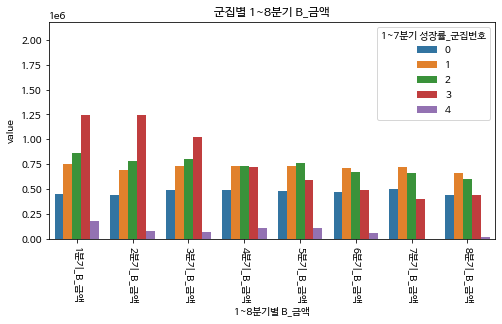

In [15]:
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(8,4))
plt.xticks(rotation=-90)
plt.title('군집별 1~8분기 B_금액')

df = a.loc[:, ['1~7분기 성장률_군집번호', '1분기_B_금액', '2분기_B_금액', '3분기_B_금액', '4분기_B_금액',
               '5분기_B_금액', '6분기_B_금액', '7분기_B_금액', '8분기_B_금액']]
  
sns.barplot(data = pd.melt(frame=df, id_vars='1~7분기 성장률_군집번호', var_name='1~8분기별 B_금액'),
            x='1~8분기별 B_금액', y='value', hue='1~7분기 성장률_군집번호', errwidth=0)
  #plt.ylabel('count')
  
plt.savefig('군집별_B제휴사 구매금액별 특성 시각화.png')

## 방문횟수별로 그룹화하여 특성 분석

In [ ]:
a[:1]

,1~7분기 성장률_군집번호,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,2분기_가구/인테리어_금액,3분기_가구/인테리어_금액,4분기_가구/인테리어_금액,5분기_가구/인테리어_금액,6분기_가구/인테리어_금액,7분기_가구/인테리어_금액,8분기_가구/인테리어_금액,1분기_신선식품_금액,2분기_신선식품_금액,3분기_신선식품_금액,4분기_신선식품_금액,5분기_신선식품_금액,6분기_신선식품_금액,7분기_신선식품_금액,8분기_신선식품_금액,1분기_의류_금액,2분기_의류_금액,3분기_의류_금액,4분기_의류_금액,5분기_의류_금액,6분기_의류_금액,7분기_의류_금액,8분기_의류_금액,1분기_일상용품_금액,2분기_일상용품_금액,3분기_일상용품_금액,4분기_일상용품_금액,5분기_일상용품_금액,6분기_일상용품_금액,7분기_일상용품_금액,8분기_일상용품_금액,1분기_전문스포츠/레저_금액,2분기_전문스포츠/레저_금액,3분기_전문스포츠/레저_금액,4분기_전문스포츠/레저_금액,5분기_전문스포츠/레저_금액,6분기_전문스포츠/레저_금액,7분기_전문스포츠/레저_금액,8분기_전문스포츠/레저_금액,1분기_패션잡화_금액,2분기_패션잡화_금액,3분기_패션잡화_금액,4분기_패션잡화_금액,5분기_패션잡화_금액,6분기_패션잡화_금액,7분기_패션잡화_금액,8분기_패션잡화_금액,1분기_디지털/가전_금액,2분기_디지털/가전_금액,3분기_디지털/가전_금액,4분기_디지털/가전_금액,5분기_디지털/가전_금액,6분기_디지털/가전_금액,7분기_디지털/가전_금액,8분기_디지털/가전_금액,1분기_교육/문화용품_금액,2분기_교육/문화용품_금액,3분기_교육/문화용품_금액,4분기_교육/문화용품_금액,5분기_교육/문화용품_금액,6분기_교육/문화용품_금액,7분기_교육/문화용품_금액,8분기_교육/문화용품_금액,1분기_기타상품_금액,2분기_기타상품_금액,3분기_기타상품_금액,4분기_기타상품_금액,5분기_기타상품_금액,6분기_기타상품_금액,7분기_기타상품_금액,8분기_기타상품_금액,1분기_의약품/의료기기_금액,2분기_의약품/의료기기_금액,3분기_의약품/의료기기_금액,4분기_의약품/의료기기_금액,5분기_의약품/의료기기_금액,6분기_의약품/의료기기_금액,7분기_의약품/의료기기_금액,8분기_의약품/의료기기_금액,1분기_전체금액,2분기_전체금액,3분기_전체금액,4분기_전체금액,5분기_전체금액,6분기_전체금액,7분기_전체금액,8분기_전체금액,1분기_A_금액,2분기_A_금액,3분기_A_금액,4분기_A_금액,5분기_A_금액,6분기_A_금액,7분기_A_금액,8분기_A_금액,1분기_B_금액,2분기_B_금액,3분기_B_금액,4분기_B_금액,5분기_B_금액,6분기_B_금액,7분기_B_금액,8분기_B_금액,1분기_C_금액,2분기_C_금액,3분기_C_금액,4분기_C_금액,5분기_C_금액,6분기_C_금액,7분기_C_금액,8분기_C_금액,1분기_D_금액,2분기_D_금액,3분기_D_금액,4분기_D_금액,5분기_D_금액,6분기_D_금액,7분기_D_금액,8분기_D_금액,A1기_visit,A2기_visit,A3기_visit,A4기_visit,A5기_visit,A6기_visit,A7기_visit,A8기_visit,B1기_visit,B2기_visit,B3기_visit,B4기_visit,B5기_visit,B6기_visit,B7기_visit,B8기_visit,C1기_visit,C2기_visit,C3기_visit,C4기_visit,C5기_visit,C6기_visit,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,0.0,63840.0,4706400.0,85500.0,491750.0,0.0,137750.0,422590.0,721735.0,274550.0,1027142.0,671145.0,544710.0,129000.0,237838.0,4464210.0,4445160.0,5754150.0,5051050.0,4541040.0,6353090.0,4256810.0,3493160.0,1644620.0,564650.0,3390310.0,1325290.0,875710.0,248150.0,0.0,782560.0,706800.0,1436400.0,0.0,0.0,509730.0,90250.0,234650.0,150000.0,361490.0,1355370.0,380550.0,1254030.0,1252160.0,258200.0,886050.0,158000.0,0.0,0.0,9900.0,9052200.0,291000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,9119790.0,10583420.0,10722160.0,22618140.0,9007070.0,8375680.0,7692890.0,5108000.0,21800.0,0.0,4700.0,371440.0,189636.0,18500.0,111500.0,73400.0,0.0,200345.0,54690.0,345182.0,106279.0,201200.0,2190.0,114538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,78.0,95.0,111.0,105.0,68.0,61.0,43.0,1.0,0.0,1.0,3.0,3.0,1.0,6.0,4.0,0.0,4.0,4.0,5.0,3.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


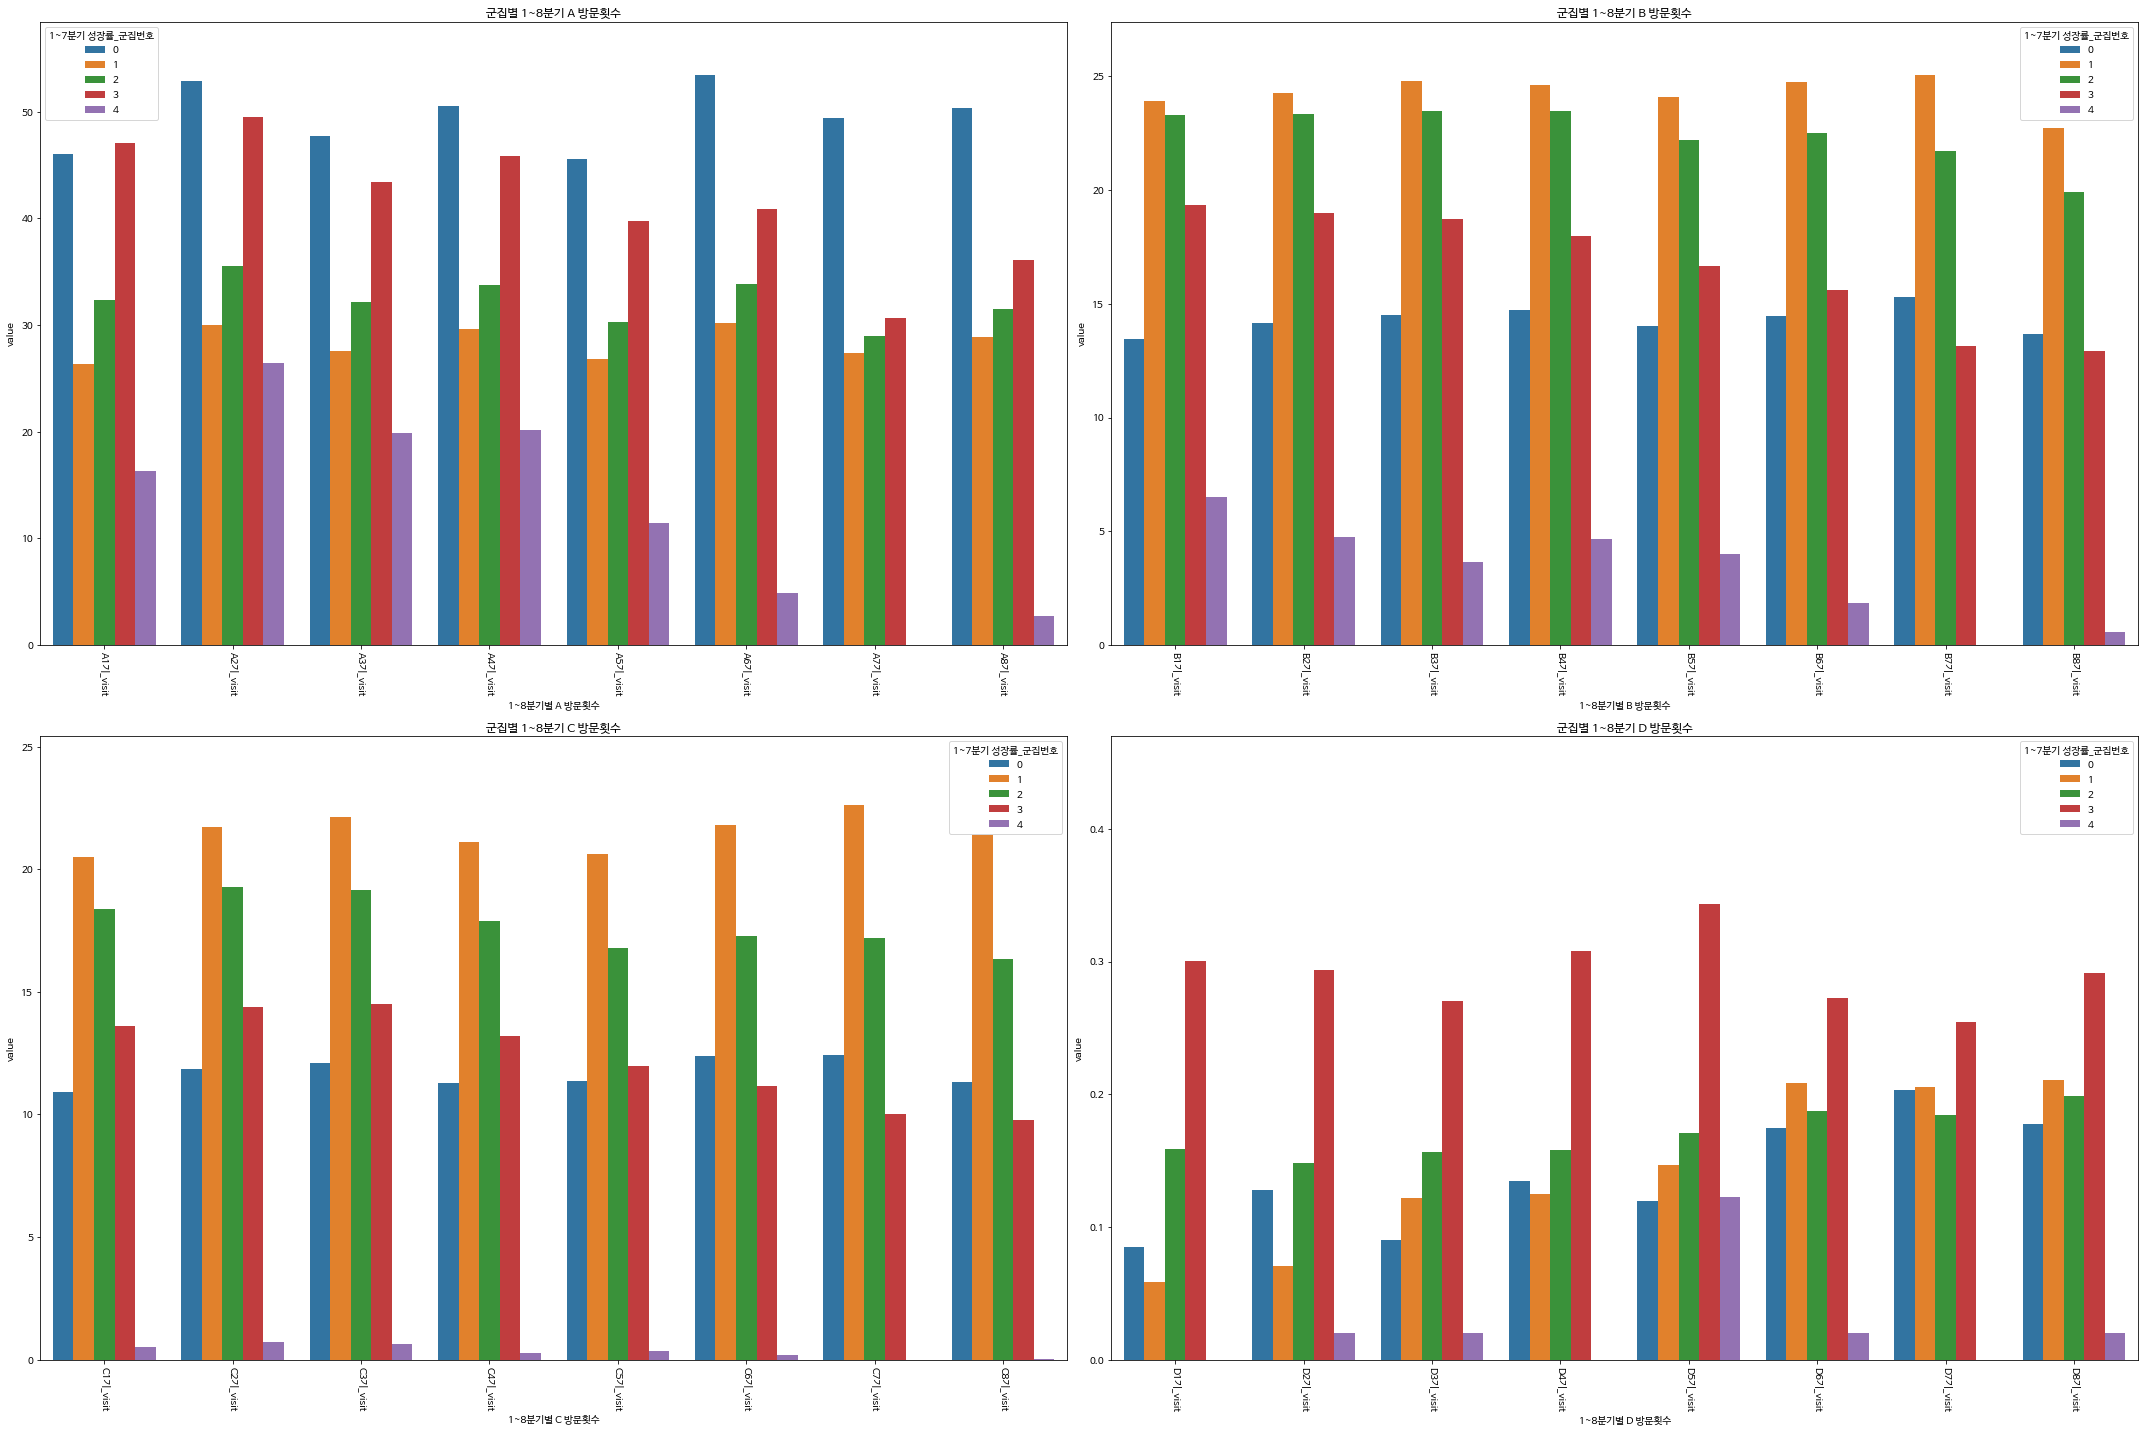

In [ ]:
col_lst = ['A', 'B', 'C', 'D']

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(30,20))

for i, col in enumerate(col_lst):
  plt.subplot(2, 2, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'군집별 1~8분기 {col} 방문횟수')

  df = a.loc[:, ['1~7분기 성장률_군집번호', f'{col}1기_visit', f'{col}2기_visit', f'{col}3기_visit', f'{col}4기_visit',
                 f'{col}5기_visit', f'{col}6기_visit', f'{col}7기_visit', f'{col}8기_visit']]
  
  sns.barplot(data = pd.melt(frame=df, id_vars='1~7분기 성장률_군집번호', var_name=f'1~8분기별 {col} 방문횟수'),
              x=f'1~8분기별 {col} 방문횟수', y='value', hue='1~7분기 성장률_군집번호', errwidth=0)
  #plt.ylabel('count')
  
plt.savefig('군집별_방문횟수별 특성 시각화.png')

## 군집별 고객의 성별, 연령 등 고객정보 확인

### 0군집

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None)
total_8846_df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/모든고객_합본(원본값)+8846명성장률군집번호.csv').iloc[:, 1:]
total_8846_df

,고객번호,1~7분기 성장률,1~7분기 성장률_군집번호,성별,연령대,고객정보,거주지역,1분기_가공식품_금액,2분기_가공식품_금액,3분기_가공식품_금액,4분기_가공식품_금액,5분기_가공식품_금액,6분기_가공식품_금액,7분기_가공식품_금액,8분기_가공식품_금액,1분기_가구/인테리어_금액,2분기_가구/인테리어_금액,3분기_가구/인테리어_금액,4분기_가구/인테리어_금액,5분기_가구/인테리어_금액,6분기_가구/인테리어_금액,7분기_가구/인테리어_금액,8분기_가구/인테리어_금액,1분기_신선식품_금액,2분기_신선식품_금액,3분기_신선식품_금액,4분기_신선식품_금액,5분기_신선식품_금액,6분기_신선식품_금액,7분기_신선식품_금액,8분기_신선식품_금액,1분기_의류_금액,2분기_의류_금액,3분기_의류_금액,4분기_의류_금액,5분기_의류_금액,6분기_의류_금액,7분기_의류_금액,8분기_의류_금액,1분기_일상용품_금액,2분기_일상용품_금액,3분기_일상용품_금액,4분기_일상용품_금액,5분기_일상용품_금액,6분기_일상용품_금액,7분기_일상용품_금액,8분기_일상용품_금액,1분기_전문스포츠/레저_금액,2분기_전문스포츠/레저_금액,3분기_전문스포츠/레저_금액,4분기_전문스포츠/레저_금액,5분기_전문스포츠/레저_금액,6분기_전문스포츠/레저_금액,7분기_전문스포츠/레저_금액,8분기_전문스포츠/레저_금액,1분기_패션잡화_금액,2분기_패션잡화_금액,3분기_패션잡화_금액,4분기_패션잡화_금액,5분기_패션잡화_금액,6분기_패션잡화_금액,7분기_패션잡화_금액,8분기_패션잡화_금액,1분기_디지털/가전_금액,2분기_디지털/가전_금액,3분기_디지털/가전_금액,4분기_디지털/가전_금액,5분기_디지털/가전_금액,6분기_디지털/가전_금액,7분기_디지털/가전_금액,8분기_디지털/가전_금액,1분기_교육/문화용품_금액,2분기_교육/문화용품_금액,3분기_교육/문화용품_금액,4분기_교육/문화용품_금액,5분기_교육/문화용품_금액,6분기_교육/문화용품_금액,7분기_교육/문화용품_금액,8분기_교육/문화용품_금액,1분기_기타상품_금액,2분기_기타상품_금액,3분기_기타상품_금액,4분기_기타상품_금액,5분기_기타상품_금액,6분기_기타상품_금액,7분기_기타상품_금액,8분기_기타상품_금액,1분기_의약품/의료기기_금액,2분기_의약품/의료기기_금액,3분기_의약품/의료기기_금액,4분기_의약품/의료기기_금액,5분기_의약품/의료기기_금액,6분기_의약품/의료기기_금액,7분기_의약품/의료기기_금액,8분기_의약품/의료기기_금액,1분기_전체금액,2분기_전체금액,3분기_전체금액,4분기_전체금액,5분기_전체금액,6분기_전체금액,7분기_전체금액,8분기_전체금액,1분기_A_금액,2분기_A_금액,3분기_A_금액,4분기_A_금액,5분기_A_금액,6분기_A_금액,7분기_A_금액,8분기_A_금액,1분기_B_금액,2분기_B_금액,3분기_B_금액,4분기_B_금액,5분기_B_금액,6분기_B_금액,7분기_B_금액,8분기_B_금액,1분기_C_금액,2분기_C_금액,3분기_C_금액,4분기_C_금액,5분기_C_금액,6분기_C_금액,7분기_C_금액,8분기_C_금액,1분기_D_금액,2분기_D_금액,3분기_D_금액,4분기_D_금액,5분기_D_금액,6분기_D_금액,7분기_D_금액,8분기_D_금액,A1기_visit,A2기_visit,A3기_visit,A4기_visit,A5기_visit,A6기_visit,A7기_visit,A8기_visit,B1기_visit,B2기_visit,B3기_visit,B4기_visit,B5기_visit,B6기_visit,B7기_visit,B8기_visit,C1기_visit,C2기_visit,C3기_visit,C4기_visit,C5기_visit,C6기_visit,C7기_visit,C8기_visit,D1기_visit,D2기_visit,D3기_visit,D4기_visit,D5기_visit,D6기_visit,D7기_visit,D8기_visit
0,1,-14.603696,1,M,60세이상,60세이상 남성,서울특별시 강남구,1364230.0,2260450.0,908250.0,918650.0,1076700.0,609230.0,500070.0,336630.0,177650.0,0.0,63840.0,4706400.0,85500.0,491750.0,0.0,137750.0,422590.0,721735.0,274550.0,1027142.0,671145.0,544710.0,129000.0,237838.0,4464210.0,4445160.0,5754150.0,5051050.0,4541040.0,6353090.0,4256810.0,3493160.0,1644620.0,564650.0,3390310.0,1325290.0,875710.0,248150.0,0.0,782560.0,706800.0,1436400.0,0.0,0.0,509730.0,90250.0,234650.0,150000.0,361490.0,1355370.0,380550.0,1254030.0,1252160.0,258200.0,886050.0,158000.0,0.0,0.0,9900.0,9052200.0,291000.0,0.0,1800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,9119790.0,10583420.0,10722160.0,22618140.0,9007070.0,8375680.0,7692890.0,5108000.0,21800.0,0.0,4700.0,371440.0,189636.0,18500.0,111500.0,73400.0,0.0,200345.0,54690.0,345182.0,106279.0,201200.0,2190.0,114538.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,78.0,95.0,111.0,105.0,68.0,61.0,43.0,1.0,0.0,1.0,3.0,3.0,1.0,6.0,4.0,0.0,4.0,4.0,5.0,3.0,5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-1.988676,1,M,60세이상,60세이상 남성,경기도 김포시,995980.0,772050.0,742510.0,612340.0,493040.0,183820.0,495880.0,670120.0,474900.0,55800.0,0.0,39000.0,78120.0,0.0,290910.0,0.0,1911260.0,1674740.0,1101590.0,1223330.0,1410190.0,756680.0,858310.0,1062020.0,1615870.0,1855430.0,3920090.0,2196660.0,6926120.0,1590400.0,3668100.0,5380760.0,6303810.0,2388610.0,5763670.0,1873000.0,3922140.0,5818800.0,3294140.0,4050030.0,2194330.0,1755430.0,2265960.0,441610.0,1780190.0,642630.0,1171420.0,534840.0,332320.0,571000.0,359360.0,692280.0,1990680.0,317800.0,682190.0,303450.0,295000.0,1126700.0,688000.0,2700.0,1881000.0,0.0,3381650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,14092970.0,10199760.0,14841180.0,7034470.0,18386680.0,9099970.0,13798600.0,12001220.0,30500.0,0.0,0.0,46450.0,94800.0,37700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
# 0군집 고객의 고객기본정보
data0 = total_8846_df[total_8846_df['1~7분기 성장률_군집번호'] == 0].iloc[:, :7]
data0

,고객번호,1~7분기 성장률,1~7분기 성장률_군집번호,성별,연령대,고객정보,거주지역
10,19,5.695659,0,F,60세이상,60세이상 여성,경기도 김포시
13,27,3.717159,0,M,60세이상,60세이상 남성,서울특별시 강남구
20,48,25.425312,0,F,60세이상,60세이상 여성,인천광역시 계양구
43,98,5.157528,0,F,60세이상,60세이상 여성,서울특별시 광진구
46,103,5.937716,0,F,60세이상,60세이상 여성,서울특별시 동대문구
...,...,...,...,...,...,...,...
8791,19142,2.088071,0,M,50세~54세,50대 남성,경기도 김포시
8795,19152,23.520000,0,F,45세~49세,40대 여성,부산광역시 기장군
8823,19260,30.105866,0,F,35세~39세,30대 여성,부산광역시 기장군
8827,19267,20.630535,0,F,45세~49세,40대 여성,경기도 김포시


In [ ]:
data0['성별'].value_counts()

F    807
M    171
Name: 성별, dtype: int64

In [ ]:
data0['고객정보'].value_counts()

40대 여성      309
50대 여성      212
30대 여성      190
40대 남성       69
60세이상 여성     67
30대 남성       44
50대 남성       43
20대 여성       27
60세이상 남성     11
20대 남성        4
10대 여성        2
Name: 고객정보, dtype: int64

In [ ]:
data0['거주지역'].value_counts()

경기도 김포시         275
부산광역시 기장군       115
서울특별시 송파구        84
인천광역시 계양구        51
서울특별시 강남구        49
경상남도 함양군         46
서울특별시 노원구        43
광주광역시 북구         28
전라북도 군산시         24
서울특별시 광진구        23
서울특별시 동대문구       21
대전광역시 유성구        17
서울특별시 도봉구        16
울산광역시 동구         16
대구광역시 동구         15
서울특별시 성동구        14
서울특별시 성북구        12
경상북도 영주시         10
정보없음              9
충청북도 단양군          9
서울특별시 영등포구        9
서울특별시 서초구         9
서울특별시 서대문구        8
서울특별시 중랑구         7
전라남도 영광군          7
서울특별시 용산구         7
서울특별시 동작구         7
서울특별시 강북구         6
서울특별시 강서구         5
강원도 철원군           5
서울특별시 관악구         5
서울특별시 마포구         4
서울특별시 금천구         3
충청남도 천안시 동남구      3
서울특별시 종로구         3
서울특별시 중구          3
서울특별시 양천구         2
세종특별자치시           2
서울특별시 강동구         2
서울특별시 은평구         2
제주특별자치도 제주시       1
서울특별시 구로구         1
Name: 거주지역, dtype: int64

In [ ]:
data0.groupby(['고객정보', '거주지역'])[['거주지역']].count().rename(columns={'거주지역' : 'count'}).reset_index().sort_values(by='count', ascending=False)[:20]

,고객정보,거주지역,count
96,40대 여성,경기도 김포시,90
151,50대 여성,경기도 김포시,62
37,30대 여성,경기도 김포시,47
102,40대 여성,부산광역시 기장군,35
43,30대 여성,부산광역시 기장군,32
156,50대 여성,부산광역시 기장군,26
118,40대 여성,서울특별시 송파구,23
189,60세이상 여성,경기도 김포시,22
97,40대 여성,경상남도 함양군,21
170,50대 여성,서울특별시 송파구,20


### 1군집

In [ ]:
# 1군집 고객의 고객기본정보
data1 = total_8846_df[total_8846_df['1~7분기 성장률_군집번호'] == 1].iloc[:, :7]
data1

,고객번호,1~7분기 성장률,1~7분기 성장률_군집번호,성별,연령대,고객정보,거주지역
0,1,-14.603696,1,M,60세이상,60세이상 남성,서울특별시 강남구
1,2,-1.988676,1,M,60세이상,60세이상 남성,경기도 김포시
4,10,-14.583000,1,F,60세이상,60세이상 여성,서울특별시 동대문구
8,17,-21.575171,1,M,60세이상,60세이상 남성,서울특별시 용산구
14,29,-14.413536,1,M,60세이상,60세이상 남성,인천광역시 계양구
...,...,...,...,...,...,...,...
8826,19266,-17.803261,1,M,40세~44세,40대 남성,서울특별시 노원구
8829,19276,-15.294709,1,F,55세~59세,50대 여성,충청남도 천안시 동남구
8834,19293,-10.743247,1,F,45세~49세,40대 여성,경기도 김포시
8838,19303,-6.519560,1,M,25세~29세,20대 남성,충청남도 천안시 동남구


In [ ]:
data1['성별'].value_counts()

F    2157
M     449
Name: 성별, dtype: int64

In [ ]:
data1['고객정보'].value_counts()

40대 여성      927
50대 여성      615
30대 여성      424
40대 남성      182
60세이상 여성    132
30대 남성      126
50대 남성       94
20대 여성       59
60세이상 남성     32
20대 남성       14
10대 남성        1
Name: 고객정보, dtype: int64

In [ ]:
data1['거주지역'].value_counts()

경기도 김포시         787
부산광역시 기장군       289
서울특별시 송파구       188
인천광역시 계양구       157
경상남도 함양군        116
서울특별시 노원구       113
광주광역시 북구        103
전라북도 군산시         78
서울특별시 강남구        66
충청북도 단양군         51
서울특별시 광진구        50
서울특별시 동대문구       47
대전광역시 유성구        46
경상북도 영주시         46
대구광역시 동구         46
전라남도 영광군         42
서울특별시 성동구        39
충청남도 천안시 동남구     37
서울특별시 도봉구        33
울산광역시 동구         27
서울특별시 강북구        23
강원도 철원군          21
정보없음             20
서울특별시 강서구        17
서울특별시 마포구        16
서울특별시 성북구        16
서울특별시 영등포구       14
서울특별시 은평구        13
서울특별시 동작구        12
서울특별시 서대문구       12
서울특별시 용산구        11
서울특별시 서초구        10
서울특별시 중랑구         9
서울특별시 강동구         9
서울특별시 구로구         8
서울특별시 관악구         8
서울특별시 중구          7
서울특별시 종로구         6
서울특별시 양천구         5
세종특별자치시           4
서울특별시 금천구         3
제주특별자치도 제주시       1
Name: 거주지역, dtype: int64

In [ ]:
data1.groupby(['고객정보', '거주지역'])[['거주지역']].count().rename(columns={'거주지역' : 'count'}).reset_index().sort_values(by='count', ascending=False)[:10]

,고객정보,거주지역,count
126,40대 여성,경기도 김포시,294
191,50대 여성,경기도 김포시,194
56,30대 여성,경기도 김포시,121
132,40대 여성,부산광역시 기장군,105
150,40대 여성,서울특별시 송파구,71
197,50대 여성,부산광역시 기장군,63
62,30대 여성,부산광역시 기장군,61
94,40대 남성,경기도 김포시,49
127,40대 여성,경상남도 함양군,45
215,50대 여성,서울특별시 송파구,44


### 2군집

In [ ]:
# 2군집 고객의 고객기본정보
data2 = total_8846_df[total_8846_df['1~7분기 성장률_군집번호'] == 2].iloc[:, :7]
data2

,고객번호,1~7분기 성장률,1~7분기 성장률_군집번호,성별,연령대,고객정보,거주지역
6,14,-25.817527,2,F,60세이상,60세이상 여성,서울특별시 용산구
11,20,-27.593533,2,M,60세이상,60세이상 남성,서울특별시 은평구
12,26,-45.198444,2,F,60세이상,60세이상 여성,부산광역시 기장군
17,45,-27.894654,2,F,60세이상,60세이상 여성,경기도 김포시
24,53,-31.267783,2,M,60세이상,60세이상 남성,서울특별시 서초구
...,...,...,...,...,...,...,...
8831,19286,-45.212064,2,F,35세~39세,30대 여성,경기도 김포시
8840,19310,-31.086545,2,F,25세~29세,20대 여성,서울특별시 강동구
8842,19325,-43.465600,2,F,45세~49세,40대 여성,부산광역시 기장군
8843,19327,-45.179191,2,M,50세~54세,50대 남성,서울특별시 은평구


In [ ]:
data2['성별'].value_counts()

F    2144
M     462
Name: 성별, dtype: int64

In [ ]:
data2['고객정보'].value_counts()

40대 여성      929
50대 여성      582
30대 여성      434
40대 남성      168
60세이상 여성    143
30대 남성      123
50대 남성      119
20대 여성       55
60세이상 남성     29
20대 남성       22
10대 여성        1
10대 남성        1
Name: 고객정보, dtype: int64

In [ ]:
data2['거주지역'].value_counts()

경기도 김포시         789
부산광역시 기장군       234
서울특별시 송파구       209
서울특별시 노원구       140
인천광역시 계양구       137
경상남도 함양군        126
광주광역시 북구         87
서울특별시 강남구        78
전라북도 군산시         68
서울특별시 동대문구       51
경상북도 영주시         50
충청북도 단양군         49
대전광역시 유성구        48
대구광역시 동구         43
전라남도 영광군         43
서울특별시 광진구        37
울산광역시 동구         35
서울특별시 강북구        33
강원도 철원군          33
충청남도 천안시 동남구     32
서울특별시 성동구        31
서울특별시 도봉구        25
서울특별시 성북구        22
서울특별시 영등포구       17
서울특별시 용산구        16
서울특별시 서대문구       16
서울특별시 마포구        15
서울특별시 서초구        15
서울특별시 강서구        15
서울특별시 관악구        14
정보없음             13
서울특별시 강동구        12
서울특별시 은평구        12
서울특별시 동작구        11
서울특별시 구로구        11
서울특별시 중구          9
서울특별시 중랑구         7
서울특별시 양천구         7
서울특별시 종로구         6
세종특별자치시           5
서울특별시 금천구         3
제주특별자치도 제주시       2
Name: 거주지역, dtype: int64

In [ ]:
data2.groupby(['고객정보', '거주지역'])[['거주지역']].count().rename(columns={'거주지역' : 'count'}).reset_index().sort_values(by='count', ascending=False)[:10]

,고객정보,거주지역,count
137,40대 여성,경기도 김포시,287
205,50대 여성,경기도 김포시,195
67,30대 여성,경기도 김포시,133
143,40대 여성,부산광역시 기장군,87
161,40대 여성,서울특별시 송파구,70
228,50대 여성,서울특별시 송파구,58
152,40대 여성,서울특별시 노원구,53
138,40대 여성,경상남도 함양군,52
73,30대 여성,부산광역시 기장군,47
106,40대 남성,경기도 김포시,46


# 0114군집.csv

### 군집별, 중분류명별 특성 시각화 (0군집)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/features/feature 재생성/0114군집.csv').iloc[:, 1:]
df[:3]

,Unnamed: 0.1,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,분기,1~7분기 성장률_군집번호
0,0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014_1분기,1.0
1,1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014_3분기,1.0
2,2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014_1분기,1.0


In [ ]:
df = df.iloc[:, 1:]
df[:3]

,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,분기,1~7분기 성장률_군집번호
0,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014_1분기,1.0
1,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014_3분기,1.0
2,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014_1분기,1.0


In [ ]:
df['1~7분기 성장률_군집번호'].value_counts()

1.0    4238195
2.0    3849075
3.0    3112951
0.0    1266762
4.0      10440
Name: 1~7분기 성장률_군집번호, dtype: int64

In [ ]:
df0 = df[df['1~7분기 성장률_군집번호']==0.0].groupby(['분기', '중분류명'], as_index=False)[['구매금액']].sum()
df0

,분기,중분류명,구매금액
0,2014_1분기,생활잡화,23310
1,2014_1분기,가공식품,347650296
2,2014_1분기,가구,51793940
3,2014_1분기,건강,66700
4,2014_1분기,건강식품,113836520
...,...,...,...
439,2015_4분기,통신/컴퓨터,53470480
440,2015_4분기,트래디셔널,204601410
441,2015_4분기,피혁잡화,97354290
442,2015_4분기,행사,9983378


In [ ]:
len(df0['중분류명'].unique())

60

Text(0.5, 1.0, '0군집의 분기별 생활잡화 구매금액')

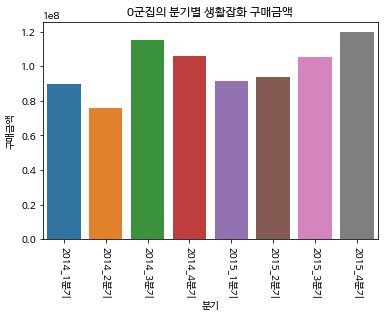

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=-90)
sns.barplot(data=df0[df0['중분류명'] == '생활잡화'], x='분기', y='구매금액')
plt.title('0군집의 분기별 생활잡화 구매금액')

In [ ]:
prod_lst = df0['중분류명'].unique().tolist()
prod_lst

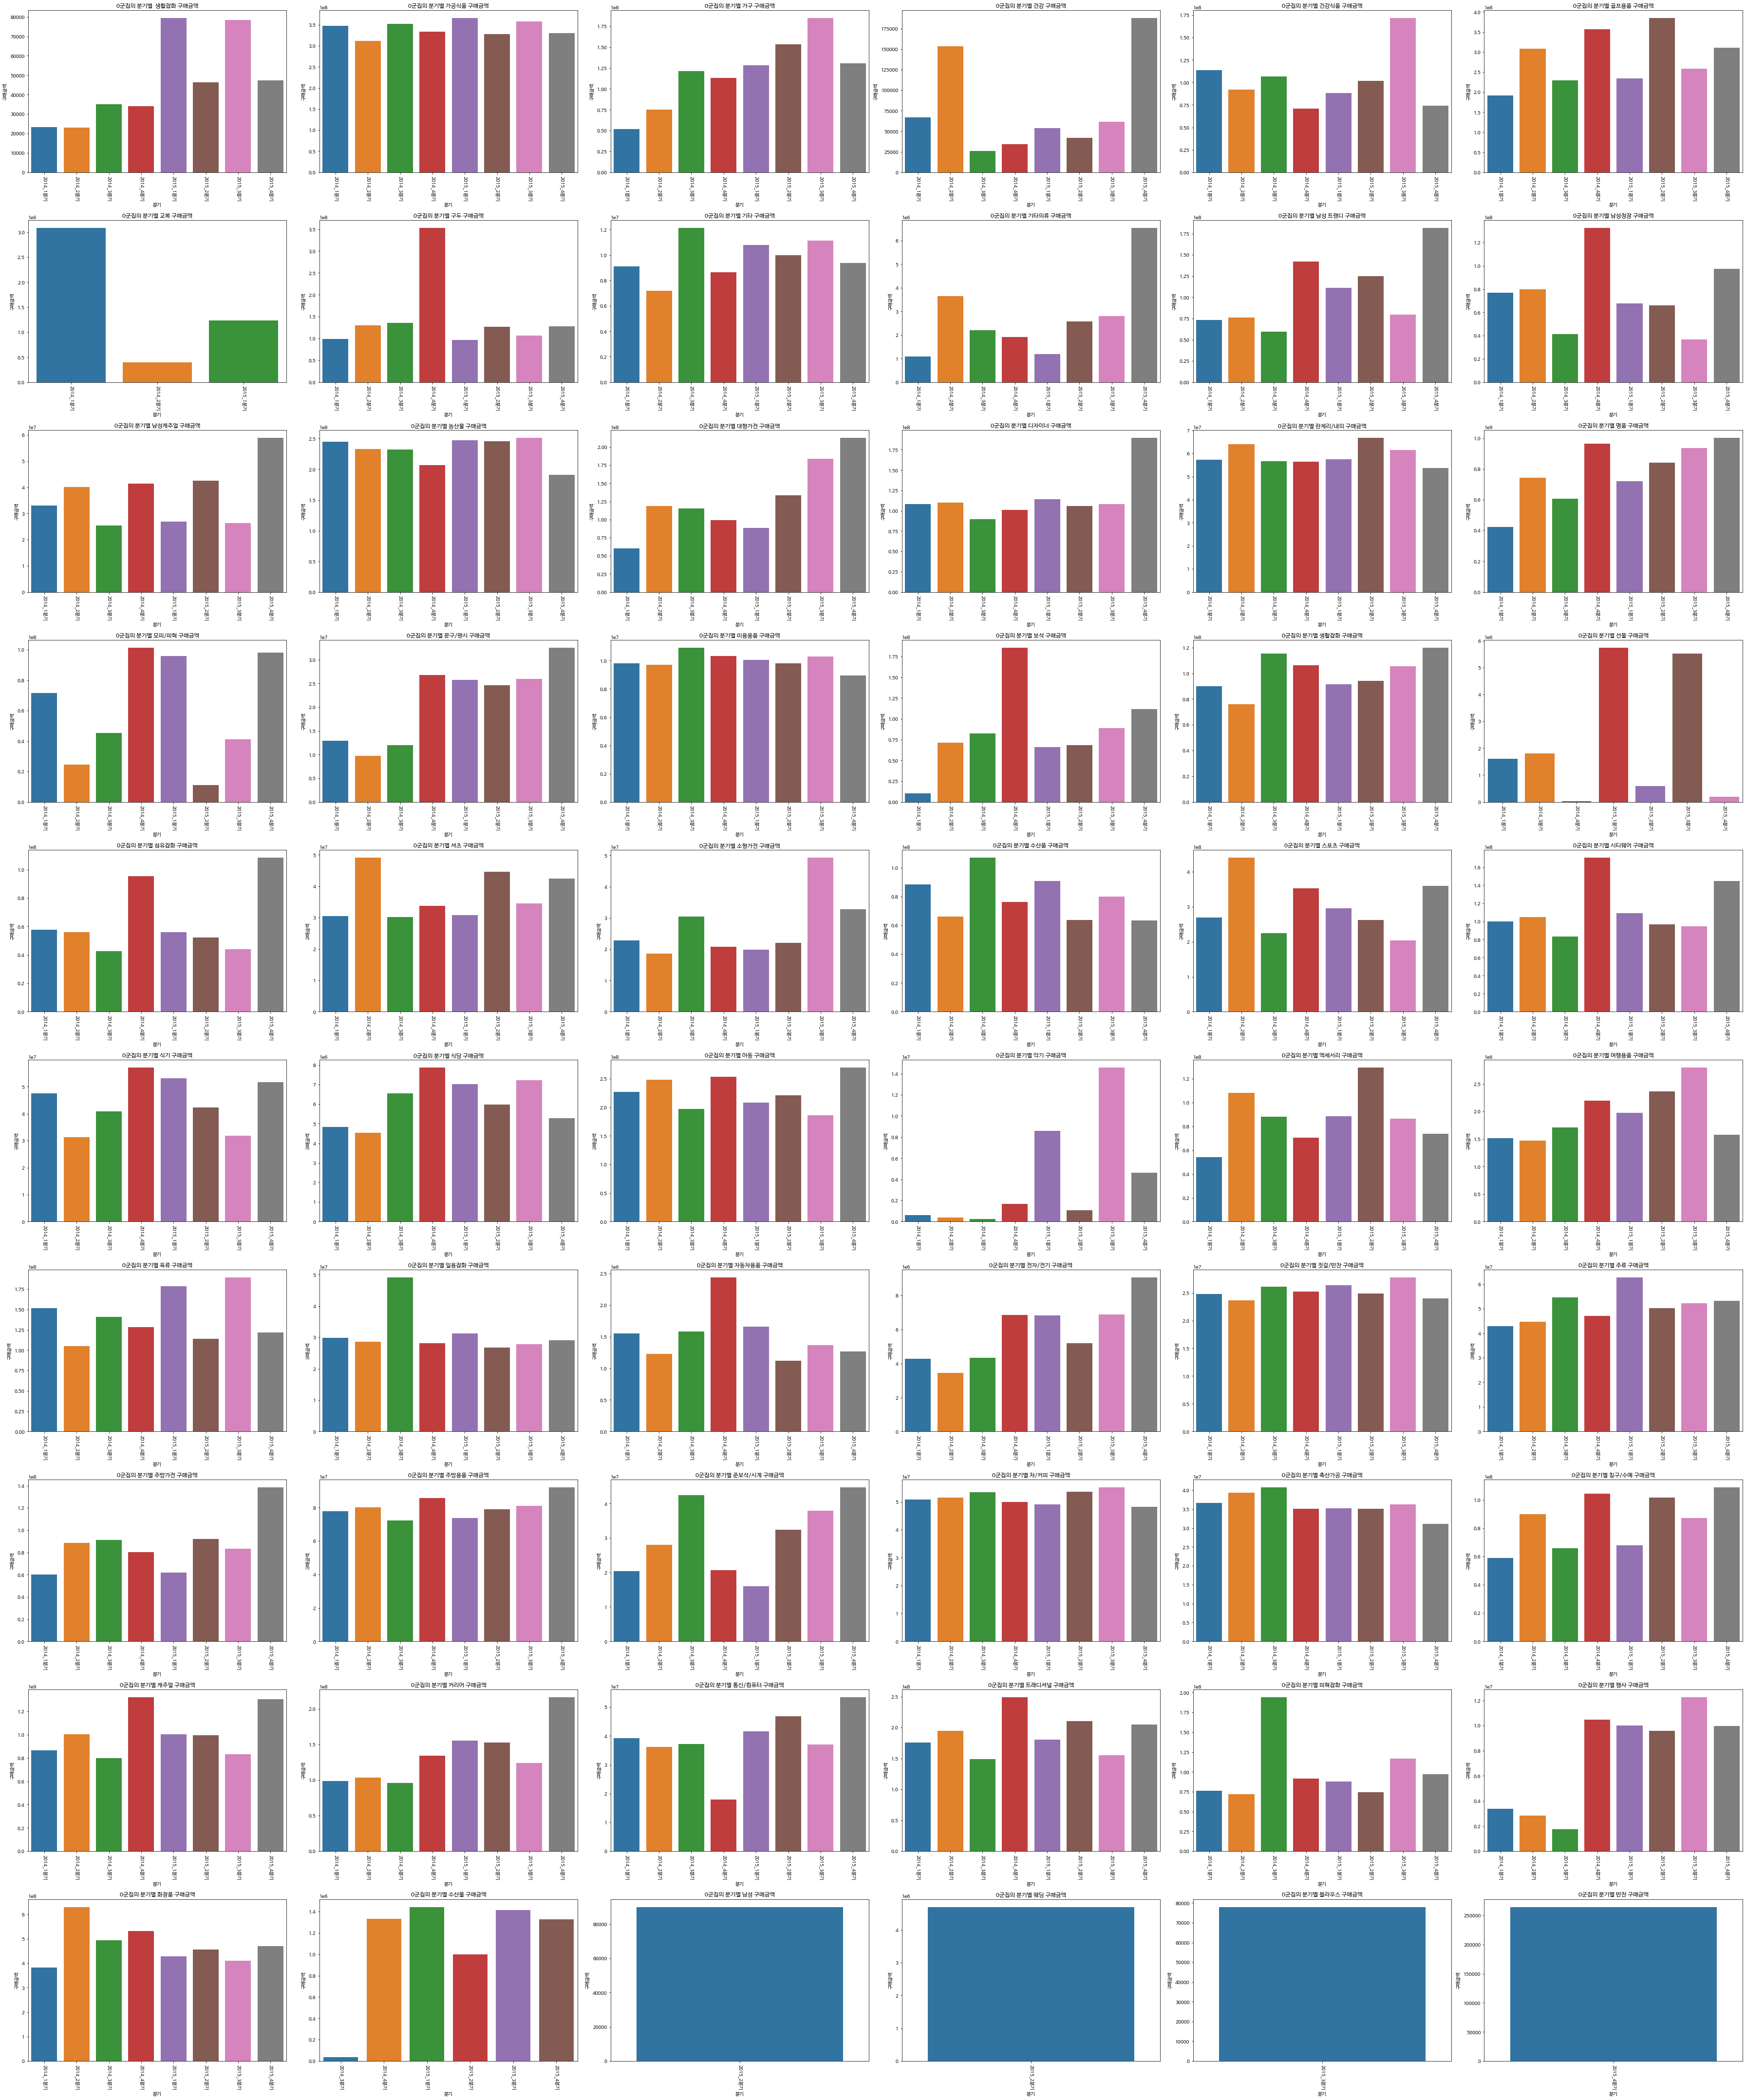

In [ ]:
prod_lst = df0['중분류명'].unique().tolist()

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(50,60))

for i, prod in enumerate(prod_lst):
  plt.subplot(10, 6, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'0군집의 분기별 {prod} 구매금액')

  df0 = df[df['1~7분기 성장률_군집번호']==0.0].groupby(['분기', '중분류명'], as_index=False)[['구매금액']].sum()
  sns.barplot(data=df0[df0['중분류명'] == f'{prod}'], x='분기', y='구매금액')
  #plt.ylabel('count')
  
plt.savefig('0군집의 분기별 중분류명 구매금액.png')

### 군집별, 중분류명별 특성 시각화 (1군집)

In [ ]:
df1 = df[df['1~7분기 성장률_군집번호']==1.0].groupby(['분기', '중분류명'], as_index=False)[['구매금액']].sum()
len(df1['중분류명'].unique())

60

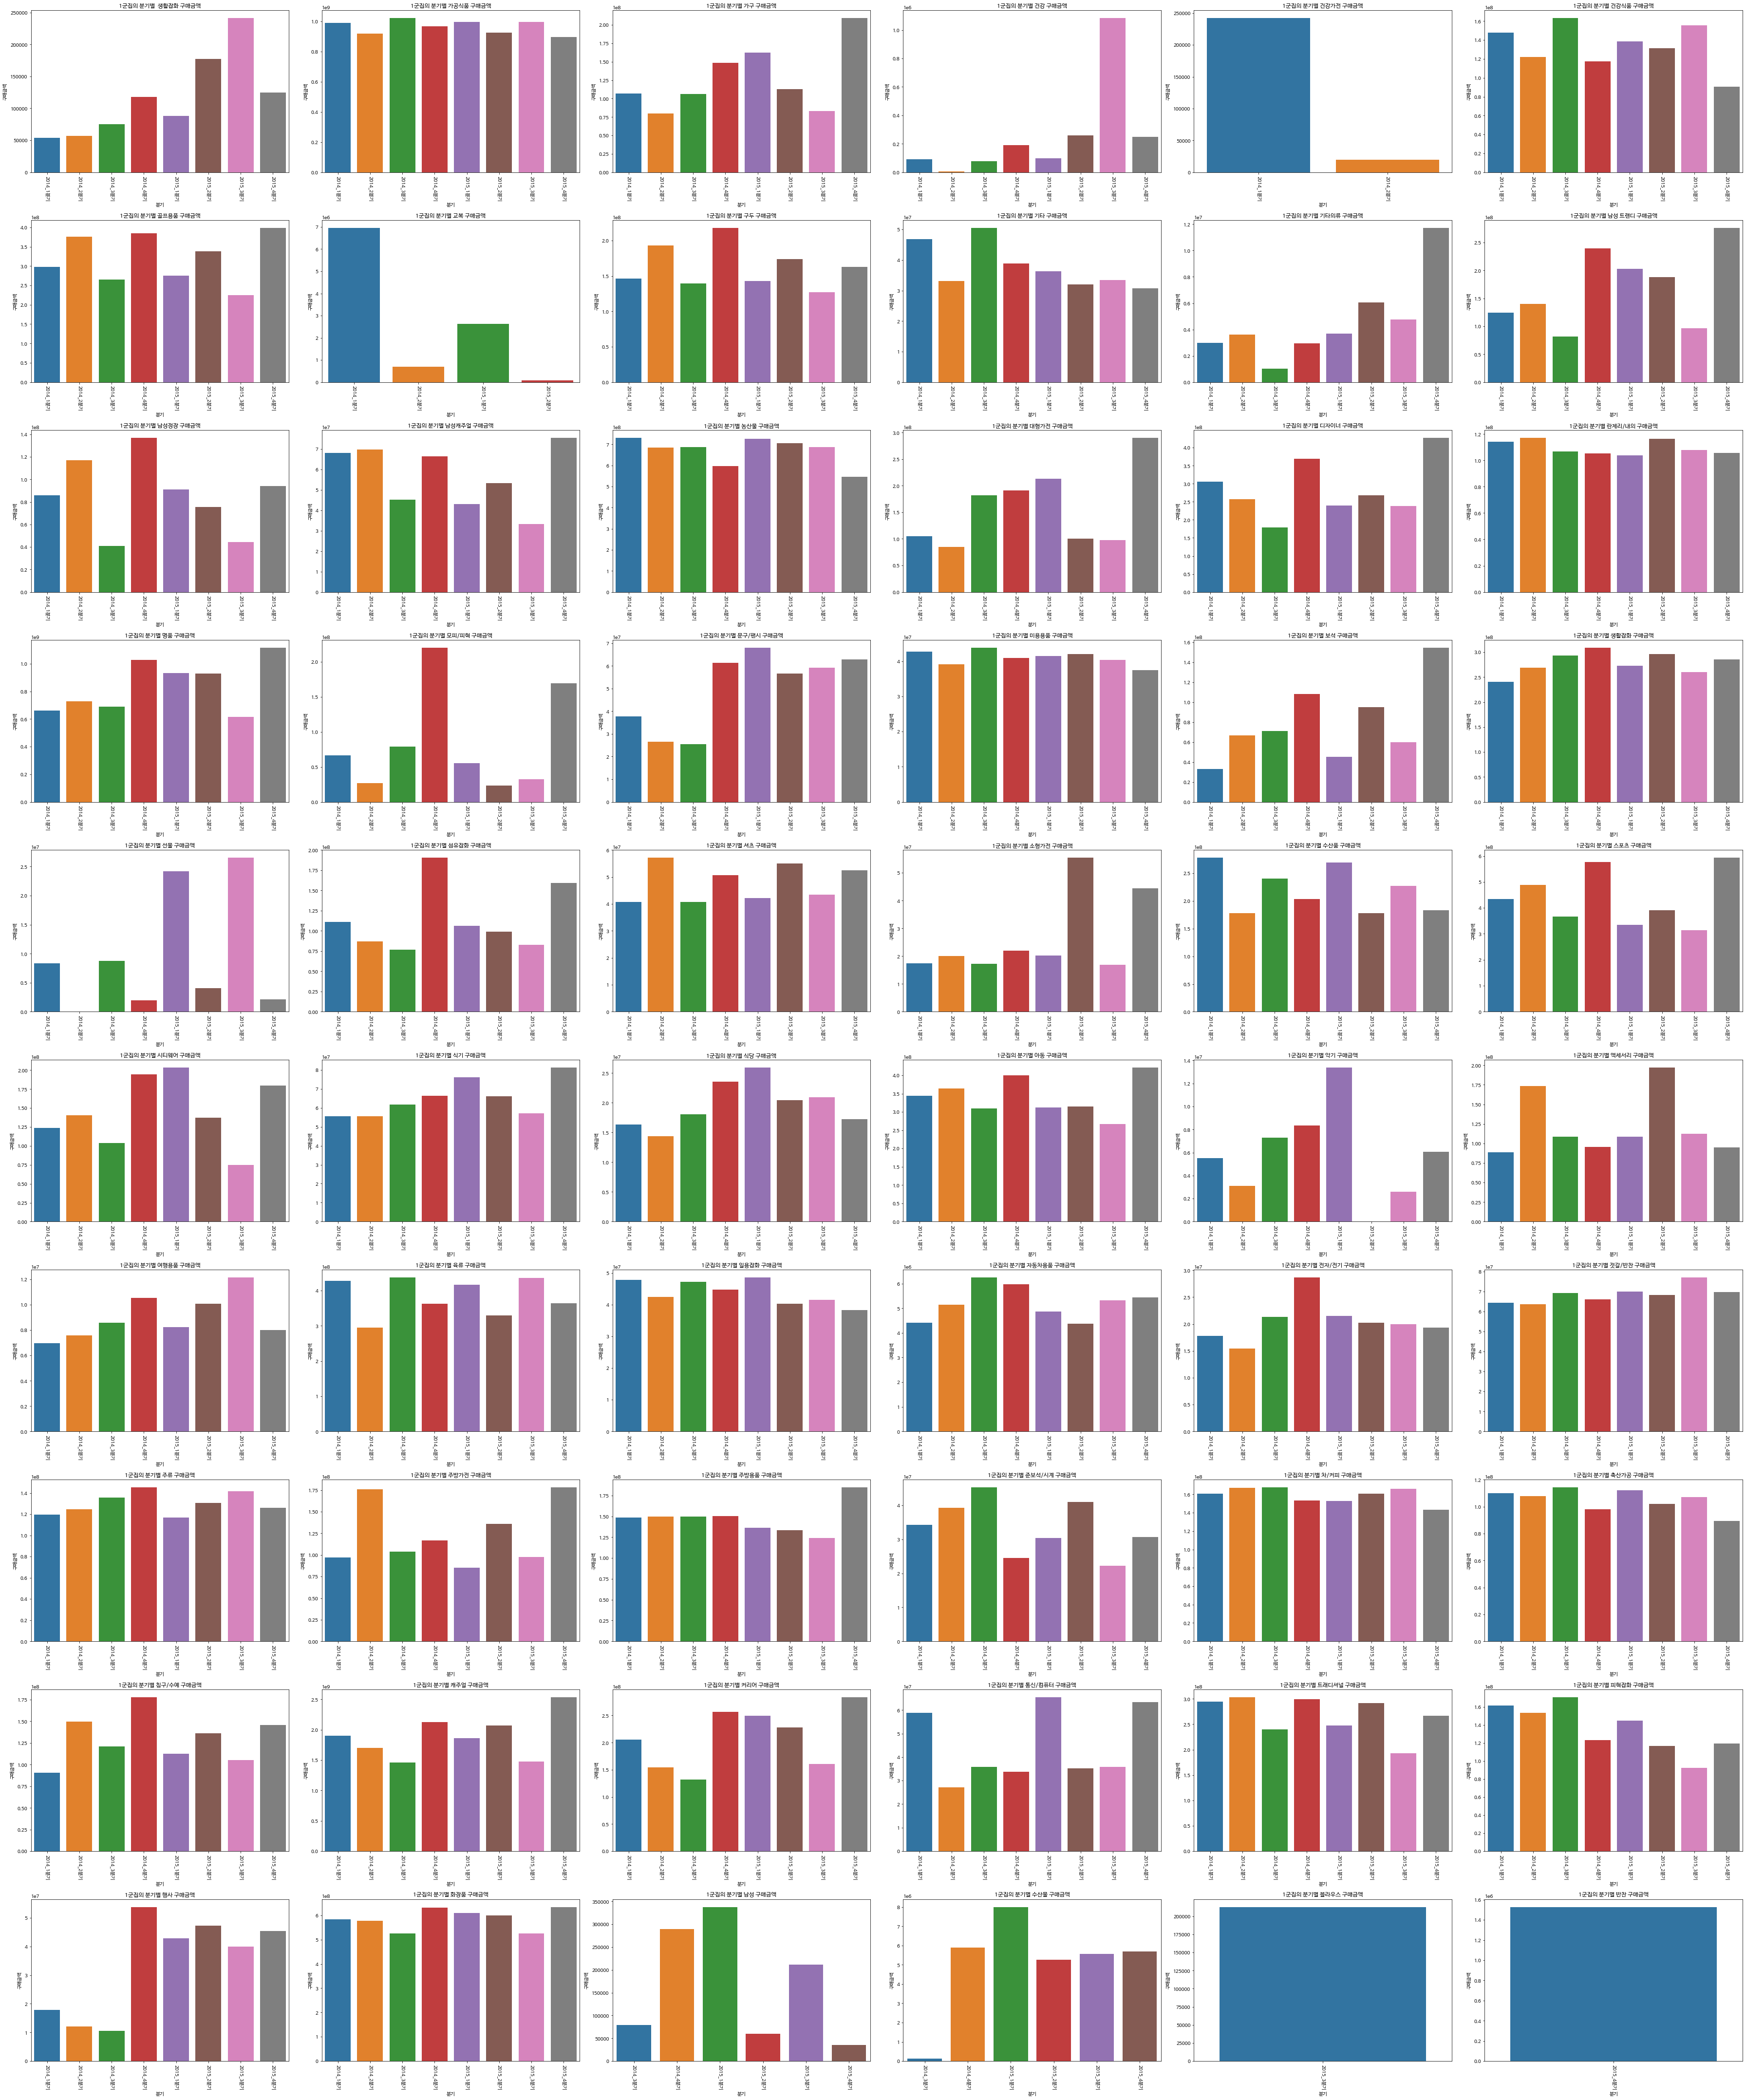

In [ ]:
df1 = df[df['1~7분기 성장률_군집번호']==1.0].groupby(['분기', '중분류명'], as_index=False)[['구매금액']].sum()
prod_lst = df1['중분류명'].unique().tolist()

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(50,60))

for i, prod in enumerate(prod_lst):
  plt.subplot(10, 6, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'1군집의 분기별 {prod} 구매금액')

  sns.barplot(data=df1[df1['중분류명'] == f'{prod}'], x='분기', y='구매금액')
  #plt.ylabel('count')
  
plt.savefig('1군집의 분기별 중분류명 구매금액.png')

### 군집별, 분기별 구매상품 특성 시각화

In [ ]:
df[:3]

,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,분기,1~7분기 성장률_군집번호
0,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014_1분기,1.0
1,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014_3분기,1.0
2,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014_1분기,1.0


In [ ]:
df['1~7분기 성장률_군집번호'].value_counts()

1.0    4238195
2.0    3849075
3.0    3112951
0.0    1266762
4.0      10440
Name: 1~7분기 성장률_군집번호, dtype: int64

In [ ]:
len(df['중분류명'].unique())

62

In [ ]:
df_g = df.groupby(['1~7분기 성장률_군집번호', '분기', '중분류명'], as_index=False)[['구매금액']].sum()
df_g

,1~7분기 성장률_군집번호,분기,중분류명,구매금액
0,0.0,2014_1분기,생활잡화,23310
1,0.0,2014_1분기,가공식품,347650296
2,0.0,2014_1분기,가구,51793940
3,0.0,2014_1분기,건강,66700
4,0.0,2014_1분기,건강식품,113836520
...,...,...,...,...
2085,4.0,2015_4분기,차/커피,126540
2086,4.0,2015_4분기,축산가공,389640
2087,4.0,2015_4분기,캐주얼,609050
2088,4.0,2015_4분기,행사,81900


Text(0.5, 1.0, '분기별 생활잡화 구매금액')

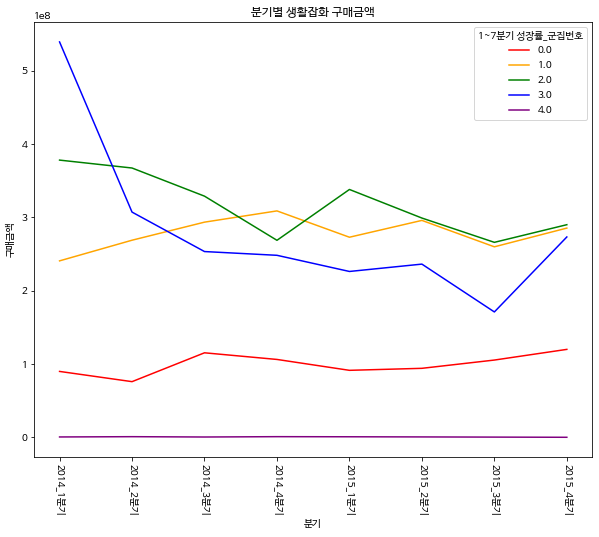

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,8))
plt.xticks(rotation=-90)
sns.lineplot(data=df_g[df_g['중분류명'] == '생활잡화'], x='분기', y='구매금액', hue='1~7분기 성장률_군집번호',
             palette=['red', 'orange', 'green', 'blue', 'purple'])
plt.title('분기별 생활잡화 구매금액')

In [ ]:
df_g['1~7분기 성장률_군집번호'].value_counts()

1.0    452
2.0    452
3.0    452
0.0    444
4.0    290
Name: 1~7분기 성장률_군집번호, dtype: int64

In [ ]:
df_g[df_g['중분류명'] == '건강']['1~7분기 성장률_군집번호'].value_counts()

0.0    8
1.0    8
2.0    8
3.0    8
Name: 1~7분기 성장률_군집번호, dtype: int64

In [ ]:
df_g = df.groupby(['1~7분기 성장률_군집번호', '분기', '중분류명'], as_index=False)[['구매금액']].sum()
prod_lst = df_g['중분류명'].unique().tolist()

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(60, 88))

for i, prod in enumerate(prod_lst):
  plt.subplot(11, 6, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'각 군집의 분기별 {prod} 구매금액')
  
  try:
    sns.lineplot(data=df_g[df_g['중분류명'] == f'{prod}'], x='분기', y='구매금액', hue='1~7분기 성장률_군집번호',
                 palette=['red', 'orange', 'green', 'blue', 'purple'])
  except:
    pass
  #plt.ylabel('count')
  
plt.savefig('각군집의 분기별 중분류명 구매금액.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_g[df_g['중분류명'] == '건강가전']['1~7분기 성장률_군집번호'].value_counts()

2.0    3
1.0    2
3.0    2
Name: 1~7분기 성장률_군집번호, dtype: int64

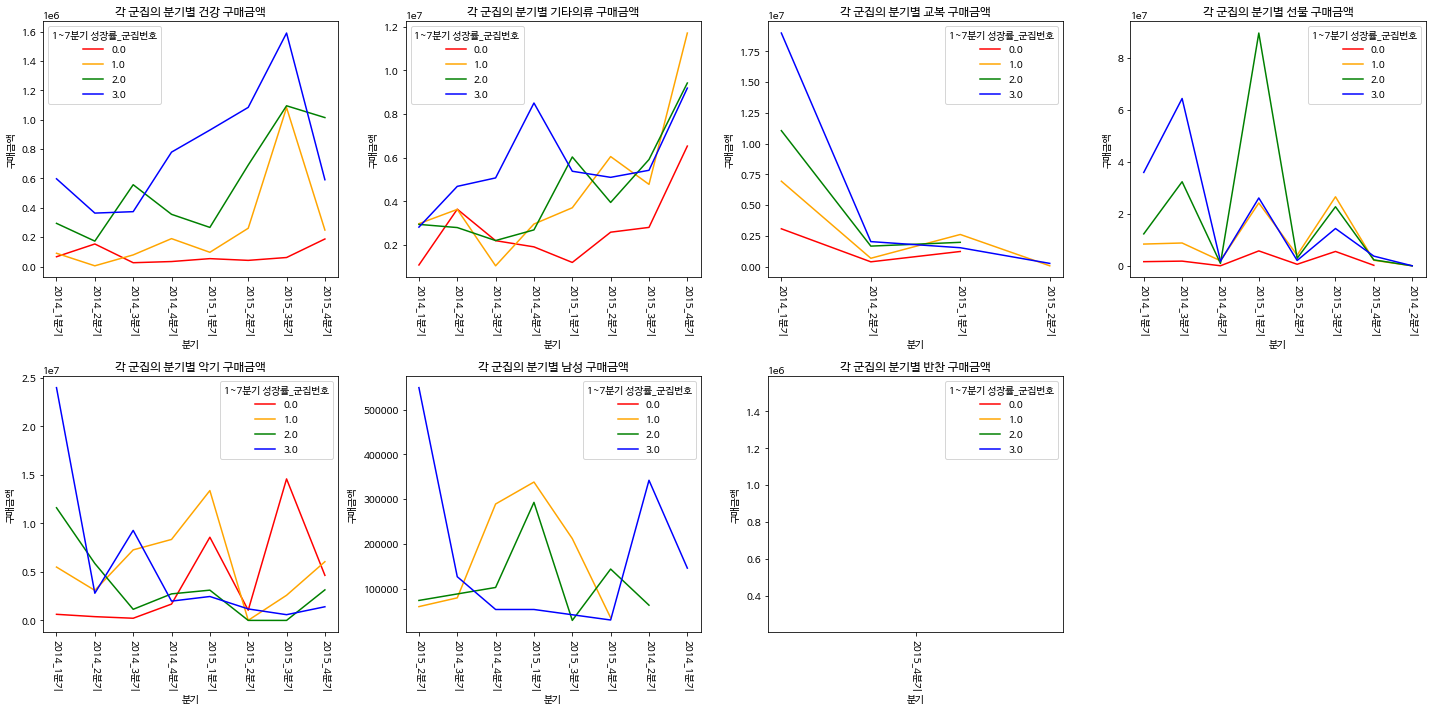

In [ ]:
# 재시각화 : 건강(0123), 기타의류, 교복, 선물, 악기, 남성, 반찬
df_g = df.groupby(['1~7분기 성장률_군집번호', '분기', '중분류명'], as_index=False)[['구매금액']].sum()
prod_lst = ['건강', '기타의류', '교복', '선물', '악기', '남성', '반찬']

plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20, 10))

for i, prod in enumerate(prod_lst):
  plt.subplot(2, 4, i+1)
  plt.tight_layout()
  plt.xticks(rotation=-90)
  plt.title(f'각 군집의 분기별 {prod} 구매금액')

  sns.lineplot(data=df_g[df_g['중분류명'] == f'{prod}'], x='분기', y='구매금액', hue='1~7분기 성장률_군집번호',
               palette=['red', 'orange', 'green', 'blue'])

  #plt.ylabel('count')
  
plt.savefig('각군집의 분기별 중분류명 구매금액(1).png')

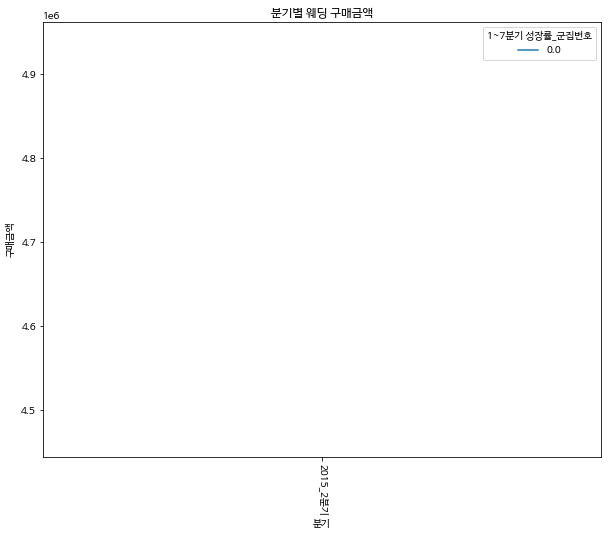

In [ ]:
# 재시각화 : 웨딩(0), 블라우스(012), 건강가전(123)
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,8))
plt.xticks(rotation=-90)
sns.lineplot(data=df_g[df_g['중분류명'] == '웨딩'], x='분기', y='구매금액', hue='1~7분기 성장률_군집번호')
plt.title('분기별 웨딩 구매금액')
plt.savefig('분기별 웨딩 구매금액.png')

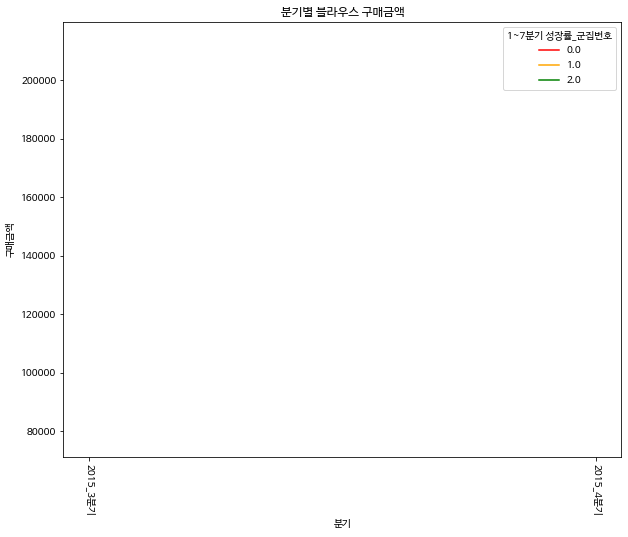

In [ ]:
# 재시각화 : 웨딩(0), 블라우스(012), 건강가전(123)
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,8))
plt.xticks(rotation=-90)
sns.lineplot(data=df_g[df_g['중분류명'] == '블라우스'], x='분기', y='구매금액', hue='1~7분기 성장률_군집번호',
             palette=['red', 'orange', 'green'])
plt.title('분기별 블라우스 구매금액')
plt.savefig('분기별 블라우스 구매금액.png')

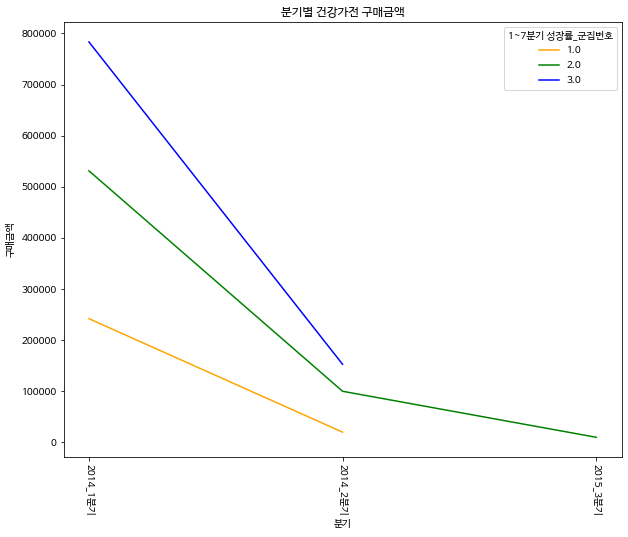

In [ ]:
# 재시각화 : 웨딩(0), 블라우스(012), 건강가전(123)
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,8))
plt.xticks(rotation=-90)
sns.lineplot(data=df_g[df_g['중분류명'] == '건강가전'], x='분기', y='구매금액', hue='1~7분기 성장률_군집번호',
             palette=['orange', 'green', 'blue'])
plt.title('분기별 건강가전 구매금액')
plt.savefig('분기별 건강가전 구매금액.png')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/features/feature 재생성/0114군집.csv').iloc[:, 1:]
df[:3]

,Unnamed: 0.1,고객번호,성별,연령대,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매일자,구매시간,구매금액,분기,1~7분기 성장률_군집번호
0,0,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,20140228,15,9500,2014_1분기,1.0
1,1,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,20140919,15,5000,2014_3분기,1.0
2,2,1,M,60세이상,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,20140130,11,19810,2014_1분기,1.0


# purchase9.csv

## 각 군집의 제휴사별 상품 매출 확인

In [ ]:
purchase9 = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 (221219 ~ 230116)/3조_2차폴더/purchase9.csv').iloc[:, 1:]
purchase9

,고객번호,고객정보,거주지역,제휴사,중분류명,소분류명,영수증번호,점포코드,구매시간,구매금액,연도,월,일,분기1,분기2,분기3,대분류명
0,1,60세이상 남성,서울특별시 강남구,A,일용잡화,위생세제,1456379,12,15,9500,2014,2,28,1,2014_1분기,1,일상용품
1,1,60세이상 남성,서울특별시 강남구,A,일용잡화,위생세제,2751160,12,15,5000,2014,9,19,3,2014_3분기,3,일상용품
2,1,60세이상 남성,서울특별시 강남구,A,일용잡화,위생세제,1307657,12,11,19810,2014,1,30,1,2014_1분기,1,일상용품
3,1,60세이상 남성,서울특별시 강남구,A,일용잡화,위생세제,3960475,12,12,1000,2015,3,27,1,2015_1분기,5,일상용품
4,1,60세이상 남성,서울특별시 강남구,A,일용잡화,위생세제,5602223,12,17,6800,2015,11,30,4,2015_4분기,8,일상용품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,19383,20대 여성,경상남도 함양군,D,화장품,아이섀도우,240249,31,23,7350,2015,12,4,4,2015_4분기,8,일상용품
28593026,19383,20대 여성,경상남도 함양군,D,화장품,메이크업세트,237806,30,19,500,2015,8,15,3,2015_3분기,7,일상용품
28593027,19383,20대 여성,경상남도 함양군,D,화장품,립글로즈/틴트,240283,31,23,8000,2015,12,6,4,2015_4분기,8,일상용품
28593028,19383,20대 여성,경상남도 함양군,D,화장품,립글로즈/틴트,240284,31,23,8000,2015,12,6,4,2015_4분기,8,일상용품


In [ ]:
df = purchase9.groupby(['제휴사', '분기3', '대분류명'], as_index=False)[['구매금액']].sum()
df

,제휴사,분기3,대분류명,구매금액
0,A,1,가공식품,4286839590
1,A,1,가구/인테리어,1761109340
2,A,1,교육/문화용품,85505870
3,A,1,디지털/가전,3174836680
4,A,1,신선식품,3506861980
...,...,...,...,...
273,D,8,디지털/가전,451480
274,D,8,의류,5010110
275,D,8,의약품/의료기기,6789500
276,D,8,일상용품,127525560


In [ ]:
# A 제휴사
plt.rc('font', family='NanumBarunGothic', size=15, weight="bold")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.figure(figsize=(30,20))
#plt.xticks(rotation=-90)
sns.lineplot(data=df[df['제휴사'] == 'A'], x='분기3', y='구매금액', hue='대분류명')

plt.title('A제휴사의 분기별 대분류명 구매금액')
plt.savefig('A제휴사의 분기별 대분류명 구매금액.png')

In [ ]:
# B 제휴사
plt.rc('font', family='NanumBarunGothic', size=15, weight="bold")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.figure(figsize=(30,20))
#plt.xticks(rotation=-90)
sns.lineplot(data=df[df['제휴사'] == 'B'], x='분기3', y='구매금액', hue='대분류명')

plt.title('B제휴사의 분기별 대분류명 구매금액')
plt.savefig('B제휴사의 분기별 대분류명 구매금액.png')

In [ ]:
# C 제휴사
plt.rc('font', family='NanumBarunGothic', size=15, weight="bold")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.figure(figsize=(30,20))
#plt.xticks(rotation=-90)
sns.lineplot(data=df[df['제휴사'] == 'C'], x='분기3', y='구매금액', hue='대분류명')

plt.title('C제휴사의 분기별 대분류명 구매금액')
plt.savefig('C제휴사의 분기별 대분류명 구매금액.png')

In [ ]:
# D 제휴사
plt.rc('font', family='NanumBarunGothic', size=15, weight="bold")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.figure(figsize=(30,20))
#plt.xticks(rotation=-90)
sns.lineplot(data=df[df['제휴사'] == 'D'], x='분기3', y='구매금액', hue='대분류명')

plt.title('D제휴사의 분기별 대분류명 구매금액')
plt.savefig('D제휴사의 분기별 대분류명 구매금액.png')

In [ ]:
purchase9[purchase9['중분류명'] == '문구/팬시']['소분류명'].value_counts()

서적          35404
액션피겨        18870
접착용품        17550
펜           13538
팬시용품        12311
            ...  
VCD/비디오         5
필기류             4
크리스마스용품         4
온라인오피스용품        2
온라인 서적          1
Name: 소분류명, Length: 79, dtype: int64